# Advanced Regression Assignment

## Aim of this case study

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house

Also, we need determine the optimal value of lambda for ridge and lasso regression.

We will work with available independent variables to understand how exactly the demands vary with different features so that management can manipulate the business strategy.

We will go through following steps to acheive our business goal:

#### Steps
1. Importing and Understanding Data
1. Hypothesis Testing
1. Data Preparation
1. Building the model 
    1. Automatic Selection using REF 
    1. Fine tune with Manual Selection
1. Residual Analysis
1. Making Predictions Using the Final Model of Liner Regression
1. Regularization
    1. Ridge Regression
    1. Lasso Regression
1. Model Evaluation
1. Conclusion

## 1. Importing and Understanding Data

Importing required libraries and loading csv data into data frame

In [202]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing train.csv 
house = pd.read_csv('train.csv',na_values='NAN')

Now we will check basic information of data such as shape, info, description etc

In [3]:
house.shape

(1460, 81)

In [4]:
house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font color='blue'>**Observation**</font> : There are missing values in 19 columns, which we have to look and correct or drop the columns

<font color='blue'>**Observation**</font> : We have a total of 81 columns and 1460 records and records are a mix of int64, float64 and object.

### 1.1 Data Cleaning
Now we need to analyze data and perform cleaning on it

Based on our observation of data and details given in data dictionary we can see that following variables are not required for our model building:
**'Id','Alley','PoolQC' and 'MiscFeature'** : More than 90% columns are null hence droping them

In [7]:
house.drop(['Id','Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [8]:
pd.set_option('display.max_rows', 100)

In [9]:
house.nunique().sort_values()

Street              2
Utilities           2
CentralAir          2
PavedDrive          3
HalfBath            3
BsmtHalfBath        3
GarageFinish        3
LandSlope           3
BsmtQual            4
BsmtCond            4
BsmtExposure        4
ExterQual           4
KitchenQual         4
BsmtFullBath        4
FullBath            4
MasVnrType          4
Fireplaces          4
KitchenAbvGr        4
Fence               4
LotShape            4
LandContour         4
HeatingQC           5
FireplaceQu         5
GarageCars          5
LotConfig           5
BldgType            5
Electrical          5
GarageQual          5
GarageCond          5
YrSold              5
MSZoning            5
ExterCond           5
Foundation          6
SaleCondition       6
BsmtFinType1        6
BsmtFinType2        6
GarageType          6
RoofStyle           6
Heating             6
Functional          7
PoolArea            8
Condition2          8
HouseStyle          8
BedroomAbvGr        8
RoofMatl            8
OverallCon

In [10]:
house.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [11]:
house[house.Street=='Grvl']

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
52            90       RM        110.0     8472   Grvl      IR2         Bnk   
335          190       RL          NaN   164660   Grvl      IR1         HLS   
582           90       RL         81.0    11841   Grvl      Reg         Lvl   
812           20  C (all)         66.0     8712   Grvl      Reg         Bnk   
1061          30  C (all)        120.0    18000   Grvl      Reg         Low   
1184          20       RL         50.0    35133   Grvl      Reg         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea Fence  \
52      AllPub    Corner       Mod  ...         0           0        0   NaN   
335     AllPub    Corner       Sev  ...         0           0        0   NaN   
582     AllPub    Inside       Gtl  ...         0           0        0   NaN   
812     AllPub    Inside       Mod  ...         0           0        0   NaN   
1061    AllPub    Inside       Gtl  ...         0           0        0   NaN   
1184    AllPub    Inside       Mod  ...         0         263        0   NaN   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
52         0       5    2010        WD         Normal    110000  
335      700       8    2008        WD         Normal    228950  
582        0       5    2007        WD         Normal    118500  
812       54       6    2010        WD         Alloca     55993  
1061     560       8    2008     ConLD         Normal     81000  
1184       0       5    2007        WD         Normal    186700  

[6 rows x 77 columns]

In [12]:
house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [13]:
house[house.Utilities=='NoSeWa']

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
944          20       RL          NaN    14375   Pave      IR1         Lvl   

    Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea Fence  \
944    NoSeWa   CulDSac       Gtl  ...         0         233        0   NaN   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
944       0       1    2009       COD        Abnorml    137500  

[1 rows x 77 columns]

In [14]:
house.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [15]:
house.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [16]:
house.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [17]:
house.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [18]:
house.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [19]:
house.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

<font color='blue'>**Observation**</font> : **Street and Utilities** : will not have any impact of the model hence dropping them

In [20]:
house.drop(['Street','Utilities'],axis=1,inplace=True)

In [21]:
pd.set_option('display.max_rows', 10)

In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### 1.1 Treating Missing Value
Now we need to treat missing values

In [23]:
house[house['LotFrontage'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
7             60       RL          NaN    10382      IR1         Lvl   
12            20       RL          NaN    12968      IR2         Lvl   
14            20       RL          NaN    10920      IR1         Lvl   
16            20       RL          NaN    11241      IR1         Lvl   
24            20       RL          NaN     8246      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1429          20       RL          NaN    12546      IR1         Lvl   
1431         120       RL          NaN     4928      IR1         Lvl   
1441         120       RM          NaN     4426      Reg         Lvl   
1443          30       RL          NaN     8854      Reg         Lvl   
1446          20       RL          NaN    26142      IR1         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... 3SsnPorch ScreenPorch  \
7       Corner       Gtl       NWAmes       PosN  ...         0           0   
12      Inside       Gtl       Sawyer       Norm  ...         0         176   
14      Corner       Gtl        NAmes       Norm  ...         0           0   
16     CulDSac       Gtl        NAmes       Norm  ...         0           0   
24      Inside       Gtl       Sawyer       Norm  ...         0           0   
...        ...       ...          ...        ...  ...       ...         ...   
1429    Corner       Gtl       NWAmes       Norm  ...         0           0   
1431    Inside       Gtl      NPkVill       Norm  ...         0           0   
1441    Inside       Gtl      CollgCr       Norm  ...         0           0   
1443    Inside       Gtl      BrkSide       Norm  ...         0          40   
1446   CulDSac       Gtl      Mitchel       Norm  ...         0           0   

     PoolArea  Fence  MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
7           0    NaN      350      11    2009       WD        Normal    200000  
12          0    NaN        0       9    2008       WD        Normal    144000  
14          0   GdWo        0       5    2008       WD        Normal    157000  
16          0    NaN      700       3    2010       WD        Normal    149000  
24          0  MnPrv        0       5    2010       WD        Normal    154000  
...       ...    ...      ...     ...     ...      ...           ...       ...  
1429        0    NaN        0       4    2007       WD        Normal    182900  
1431        0    NaN        0      10    2009       WD        Normal    143750  
1441        0    NaN        0       5    2008       WD        Normal    149300  
1443        0    NaN        0       5    2009       WD        Normal    121000  
1446        0    NaN        0       4    2010       WD        Normal    157900  

[259 rows x 75 columns]

In [24]:
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<font color='blue'>**Observation**</font> : Replacing missing values with median value (69)

In [25]:
house.LotFrontage = house.LotFrontage.fillna(house.LotFrontage.median())

In [26]:
house[house['MasVnrType'].isna()].MasVnrType

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [27]:
house.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [28]:
house.MasVnrArea.value_counts(dropna=False)

0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64

<font color='blue'>**Observation**</font> : Only 8 are Nan values for MasVnrType and MasVnrArea we will replace it with None and 0.0 respectively

In [29]:
house.MasVnrType = house.MasVnrType.fillna('None')
house.MasVnrArea = house.MasVnrArea.fillna(0.0)

In [30]:
house[house['BsmtQual'].isna()].BsmtQual.value_counts(dropna=False)

NaN    37
Name: BsmtQual, dtype: int64

<font color='blue'>**Observation**</font> : Here, after checking the file and data dictionary we cab see that value 'No Basement' which is represented by 'NA' is wrongly interpreted as NaN. We will change 'NA' to 'NB' to correctly represent No Basement. And it is applicable to 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2'.

In [31]:
house.BsmtQual = house.BsmtQual.fillna('NB')
house.BsmtCond = house.BsmtCond.fillna('NB')
house.BsmtExposure = house.BsmtExposure.fillna('NB')
house.BsmtFinType1 = house.BsmtFinType1.fillna('NB')
house.BsmtFinType2 = house.BsmtFinType2.fillna('NB')

In [32]:
house.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

<font color='blue'>**Observation**</font> : Will replace NA value with SBrkr for 'Electrical'

In [33]:
house.Electrical = house.Electrical.fillna('SBrkr')

In [34]:
house.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [35]:
house.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

<font color='blue'>**Observation**</font> : Based on dictionary and counts of FireplaceQu and Fireplaces we can conclude that NA for FireplaceQu is there because there are no fire place. Hence we will replace FireplaceQu NA with NF

In [36]:
house.FireplaceQu = house.FireplaceQu.fillna('NF')

In [37]:
house.GarageType.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [38]:
house.GarageYrBlt.value_counts(dropna=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [39]:
house.GarageFinish.value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [40]:
house.GarageArea.value_counts(dropna=False)

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

In [41]:
house.GarageCars.value_counts(dropna=False)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [42]:
house.GarageQual.value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [43]:
house.GarageCond.value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

<font color='blue'>**Observation**</font> : Based on 'GarageType', 'GarageCond', 'GarageQual', 'GarageCars', 'GarageArea', 'GarageFinish' and 'GarageYrBlt' we can see that NA does not represent missing value but it represent no garage since garage cars and garage area is present we will considere then as no garage is present for NA values and will replace it with NG and for 'GarageYrBlt' we will replace it with 0.0 to represent lowest value

In [44]:
house.GarageType = house.GarageType.fillna('NG')
house.GarageCond = house.GarageCond.fillna('NG')
house.GarageQual = house.GarageQual.fillna('NG')
house.GarageYrBlt = house.GarageYrBlt.fillna(0.0)
house.GarageFinish = house.GarageFinish.fillna('NG')

In [45]:
house.Fence.value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

<font color='blue'>**Observation**</font> : Here we will replace NaN with No fence ('NF') as per dictionary

In [46]:
house.Fence = house.Fence.fillna('NF')

In [47]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

<font color='blue'>**Observation**</font> : All fields and rows are now fixed, we could have done this in better and smarter way but this is how you learn. I discovered better way of fixing these values to considere NA values as legit values as follows

In [48]:
# Importing train.csv 
house_smart = pd.read_csv('train.csv', keep_default_na=False, na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', ''])

In [49]:
house_smart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

<font color='blue'>**Observation**</font> : Here I have just dropped two values from default consideration NaN. ('NA' and 'None' which could have been identified from dictionary observation and this long process of replacing all fields would have been avoided)

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
house

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1455     2Story            6            5       1999          2000     Gable   
1456     1Story            6            6       1978          1988     Gable   
1457     2Story            7            9       1941          2006     Gable   
1458     1Story            5            6       1950          1996       Hip   
1459     1Story            5            6       1965          1965     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       None         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1455  CompShg     VinylSd     VinylSd       None         0.0        TA   
1456  CompShg     Plywood     Plywood      Stone       119.0        TA   
1457  CompShg     CemntBd     CmentBd       None         0.0        Ex   
1458  CompShg     MetalSd     MetalSd       None         0.0        TA   
1459  CompShg     HdBoard     HdBoard       None         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av     

<font color='blue'>**Observation**</font> : We will convert numerical values of categorical columns to string values to help us in encoding down the line <br>
These columns need these changes  : MSSubClass, OverallQual and OverallCond



In [52]:
house.MSSubClass = house.MSSubClass.astype('string')
house.OverallQual = house.OverallQual.astype('string')
house.OverallCond = house.OverallCond.astype('string')

In [53]:
house.MSSubClass = house.MSSubClass.apply(lambda x : x.replace(x,x+'MSSubClass'))
house.OverallQual = house.OverallQual.apply(lambda x : x.replace(x,x+'OverallQual'))
house.OverallCond = house.OverallCond.apply(lambda x : x.replace(x,x+'OverallCond'))

In [54]:
house[['MSSubClass','OverallQual','OverallCond']]

MSSubClass   OverallQual   OverallCond
0     60MSSubClass  7OverallQual  5OverallCond
1     20MSSubClass  6OverallQual  8OverallCond
2     60MSSubClass  7OverallQual  5OverallCond
3     70MSSubClass  7OverallQual  5OverallCond
4     60MSSubClass  8OverallQual  5OverallCond
...            ...           ...           ...
1455  60MSSubClass  6OverallQual  5OverallCond
1456  20MSSubClass  6OverallQual  6OverallCond
1457  70MSSubClass  7OverallQual  9OverallCond
1458  20MSSubClass  5OverallQual  6OverallCond
1459  20MSSubClass  5OverallQual  6OverallCond

[1460 rows x 3 columns]

## 2. Hypothesis Testing

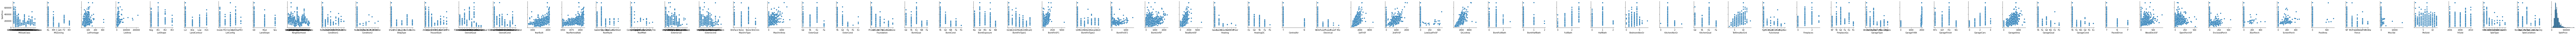

In [55]:
sns.pairplot(y_vars='SalePrice',x_vars=house.columns,data=house)

There is some correlation between SalePrice and LotFrontage, LotArea, LandSlope, OverallQual, YearBuilt, Bsmt Areas, Living areas, GarageArea and many more.

<font color='blue'>**Observation**</font> : Hence we can conclude that liner regression model can be applied to this data set

## 3. Data Preparation
Now we will prepare data for making data useful for RFE and Regularization

<font color='blue'>**Observation**</font> : We can figure out which columns are categorical or Numeric based on its data type and data readme sheet

In [56]:
categorical_columns = house.select_dtypes(include=['object']).columns.to_list()
numerical_columns = house.select_dtypes(exclude=['object']).columns.to_list()
print(categorical_columns)
print(numerical_columns)



['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVa

In [57]:
house[categorical_columns]

MSSubClass MSZoning LotShape LandContour LotConfig LandSlope  \
0     60MSSubClass       RL      Reg         Lvl    Inside       Gtl   
1     20MSSubClass       RL      Reg         Lvl       FR2       Gtl   
2     60MSSubClass       RL      IR1         Lvl    Inside       Gtl   
3     70MSSubClass       RL      IR1         Lvl    Corner       Gtl   
4     60MSSubClass       RL      IR1         Lvl       FR2       Gtl   
...            ...      ...      ...         ...       ...       ...   
1455  60MSSubClass       RL      Reg         Lvl    Inside       Gtl   
1456  20MSSubClass       RL      Reg         Lvl    Inside       Gtl   
1457  70MSSubClass       RL      Reg         Lvl    Inside       Gtl   
1458  20MSSubClass       RL      Reg         Lvl    Inside       Gtl   
1459  20MSSubClass       RL      Reg         Lvl    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle   OverallQual  \
0         CollgCr       Norm       Norm     1Fam     2Story  7OverallQual   
1         Veenker      Feedr       Norm     1Fam     1Story  6OverallQual   
2         CollgCr       Norm       Norm     1Fam     2Story  7OverallQual   
3         Crawfor       Norm       Norm     1Fam     2Story  7OverallQual   
4         NoRidge       Norm       Norm     1Fam     2Story  8OverallQual   
...           ...        ...        ...      ...        ...           ...   
1455      Gilbert       Norm       Norm     1Fam     2Story  6OverallQual   
1456       NWAmes       Norm       Norm     1Fam     1Story  6OverallQual   
1457      Crawfor       Norm       Norm     1Fam     2Story  7OverallQual   
1458        NAmes       Norm       Norm     1Fam     1Story  5OverallQual   
1459      Edwards       Norm       Norm     1Fam     1Story  5OverallQual   

       OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0     5OverallCond     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1     8OverallCond     Gable  CompShg     MetalSd     MetalSd       None   
2     5OverallCond     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3     5OverallCond     Gable  CompShg     Wd Sdng     Wd Shng       None   
4     5OverallCond     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455  5OverallCond     Gable  CompShg     VinylSd     VinylSd       None   
1456  6OverallCond     Gable  CompShg     Plywood     Plywood      Stone   
1457  9OverallCond     Gable  CompShg     CemntBd     CmentBd       None   
1458  6OverallCond       Hip  CompShg     MetalSd     MetalSd       None   
1459  6OverallCond     Gable  CompShg     HdBoard     HdBoard       None   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd        TA      PConc       Gd       TA           Av   
...        ...       ...        ...      ...      ...          ...   
1455        TA        TA      PConc       Gd       TA           No   
1456        TA        TA     CBlock       Gd       TA           No   
1457        Ex        Gd      Stone       TA       Gd           No   
1458        TA        TA     CBlock       TA       TA           Mn   
1459        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0             GLQ          Unf    GasA        Ex          Y      SBrkr   
1             ALQ          Unf    GasA        Ex          Y      SBrkr   
2             GLQ          Unf    GasA        Ex          Y      SBrkr   
3             ALQ          Unf    GasA        Gd          Y      SBrkr   
4             GLQ          Unf    GasA        Ex          Y      SBrkr   
...           ...   

In [58]:
house[numerical_columns]

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       2003          2003       196.0         706   
1            80.0     9600       1976          1976         0.0         978   
2            68.0    11250       2001          2002       162.0         486   
3            60.0     9550       1915          1970         0.0         216   
4            84.0    14260       2000          2000       350.0         655   
...           ...      ...        ...           ...         ...         ...   
1455         62.0     7917       1999          2000         0.0           0   
1456         85.0    13175       1978          1988       119.0         790   
1457         66.0     9042       1941          2006         0.0         275   
1458         68.0     9717       1950          1996         0.0          49   
1459         75.0     9937       1965          1965         0.0         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0              0        150          856       856       854             0   
1              0        284         1262      1262         0             0   
2              0        434          920       920       866             0   
3              0        540          756       961       756             0   
4              0        490         1145      1145      1053             0   
...          ...        ...          ...       ...       ...           ...   
1455           0        953          953       953       694             0   
1456         163        589         1542      2073         0             0   
1457           0        877         1152      1188      1152             0   
1458        1029          0         1078      1078         0             0   
1459         290        136         1256      1256         0             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0          1710             1             0         2         1             3   
1          1262             0             1         2         0             3   
2          1786             1             0         2         1             3   
3          1717             1             0         1         0             3   
4          2198             1             0         2         1             4   
...         ...           ...           ...       ...       ...           ...   
1455       1647             0             0         2         1             3   
1456       2073             1             0         2         0             3   
1457       2340             0             0         2         0             4   
1458       1078             1             0         1         0             2   
1459       1256             1             0         1         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0                1             8           0       2003.0           2   
1                1             6           1       1976.0           2   
2                1             6           1       2001.0           2   
3                1             7           1       1998.0           3   
4                1             9           1       2000.0           3   
...            ...           ...         ...          ...         ...   
1455             1             7           1       1999.0           2   
1456             1             7           2       1978.0           2   
1457             1             9           2       1941.0           1   
1458             1             5           0       1950.0           1   
1459             1             6           0       1965.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0 

### 3.1 Data Cleaning - Outlier Processing

#### Numeric variables treatment

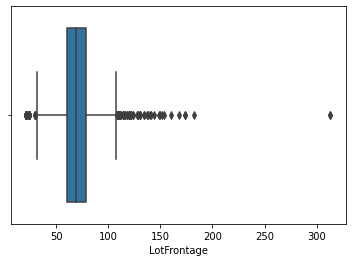

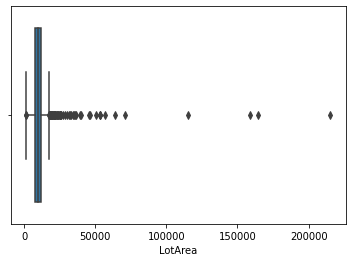

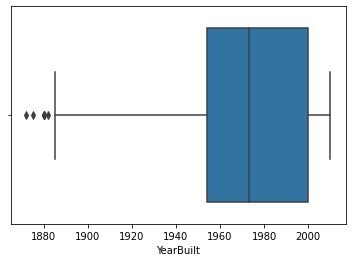

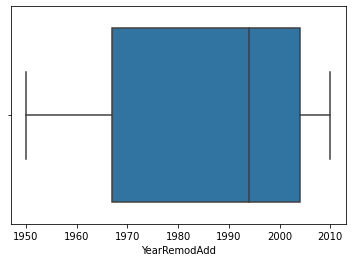

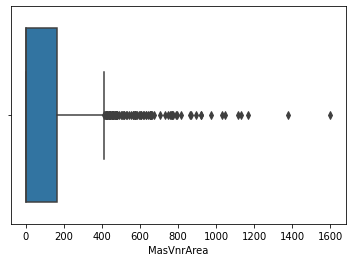

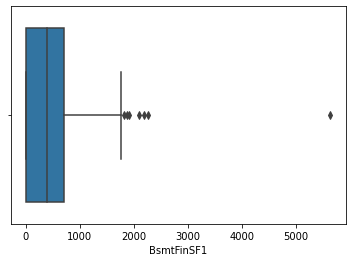

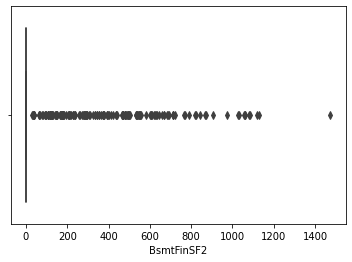

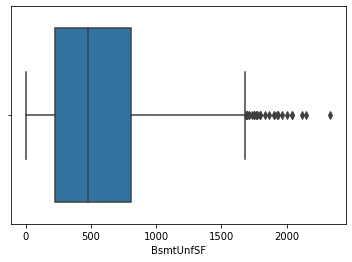

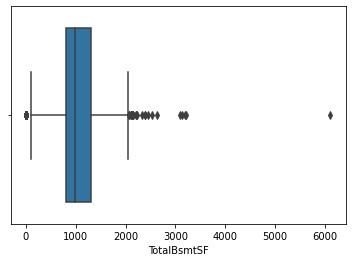

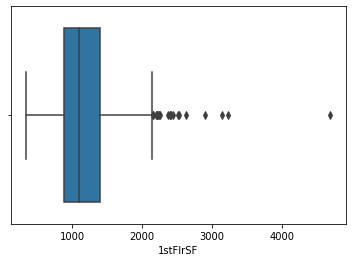

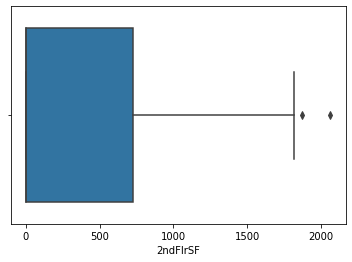

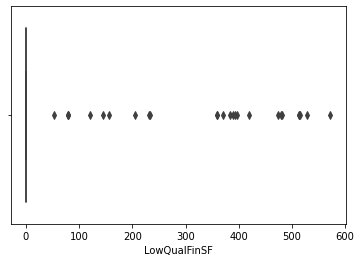

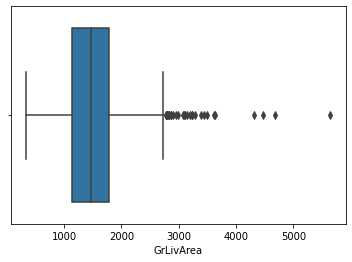

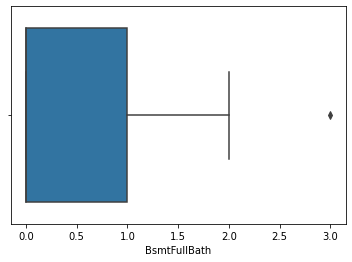

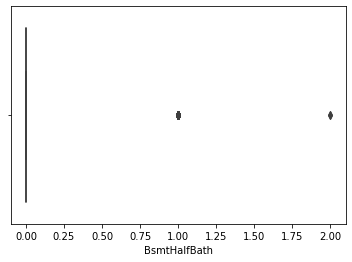

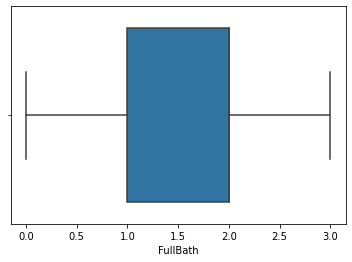

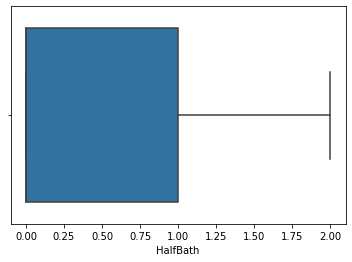

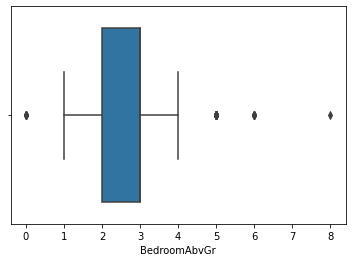

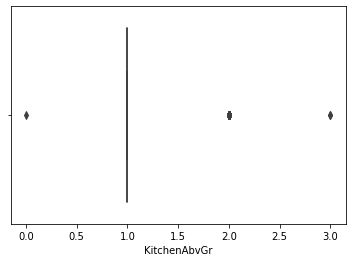

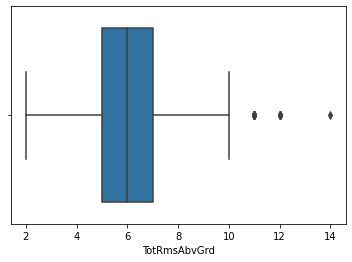

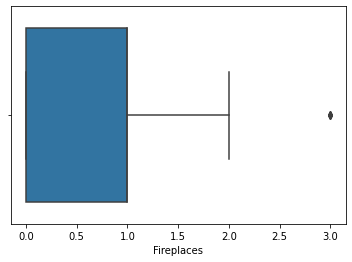

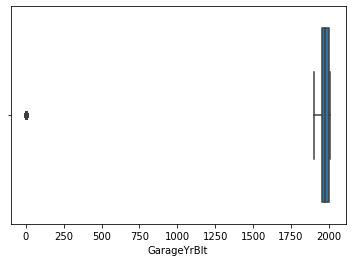

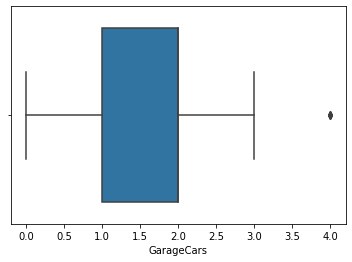

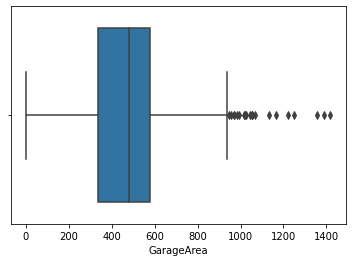

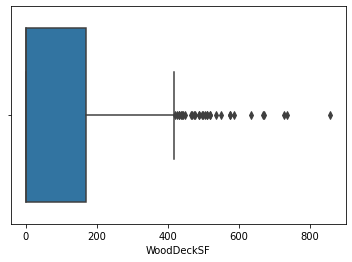

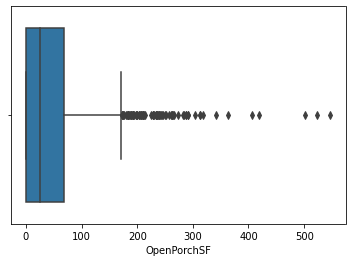

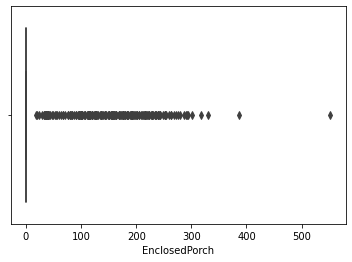

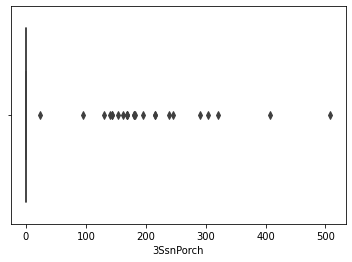

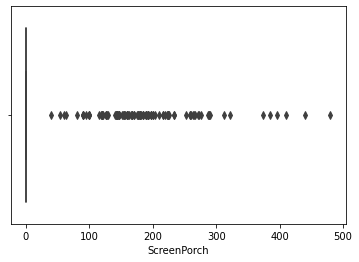

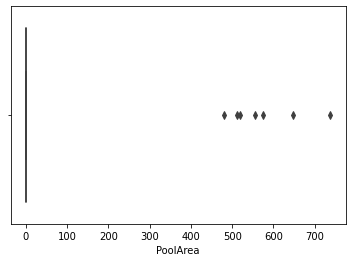

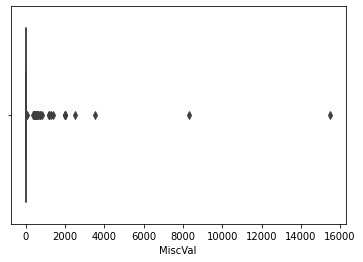

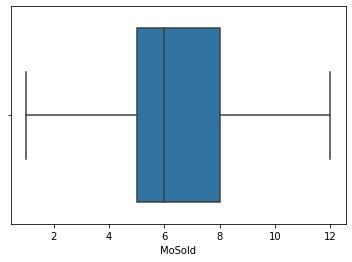

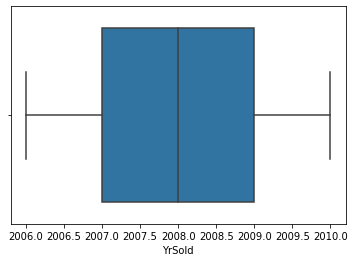

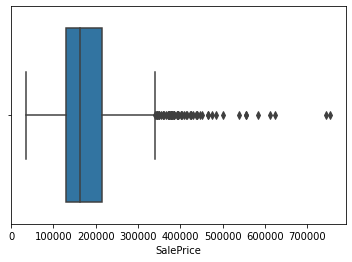

In [59]:
# Plotting all numeric variables in box plot
def box_plot(series):
    sns.boxplot(x=series)
    plt.show()


for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : We have 9 points above saleprice of 500,000. We will first drop these and observe other variables as mostly outliers associated with those would be same data point

In [60]:
house[house.SalePrice>500000]

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
178   20MSSubClass       RL         63.0    17423      IR1         Lvl   
440   20MSSubClass       RL        105.0    15431      Reg         Lvl   
691   60MSSubClass       RL        104.0    21535      IR1         Lvl   
769   60MSSubClass       RL         47.0    53504      IR2         HLS   
803   60MSSubClass       RL        107.0    13891      Reg         Lvl   
898   20MSSubClass       RL        100.0    12919      IR1         Lvl   
1046  60MSSubClass       RL         85.0    16056      IR1         Lvl   
1169  60MSSubClass       RL        118.0    35760      IR1         Lvl   
1182  60MSSubClass       RL        160.0    15623      IR1         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
178    CulDSac       Gtl      StoneBr       Norm       Norm     1Fam   
440     Inside       Gtl      NridgHt       Norm       Norm     1Fam   
691     Corner       Gtl      NoRidge       Norm       Norm     1Fam   
769    CulDSac       Mod      StoneBr       Norm       Norm     1Fam   
803     Inside       Gtl      NridgHt       Norm       Norm     1Fam   
898     Inside       Gtl      NridgHt       Norm       Norm     1Fam   
1046    Inside       Gtl      StoneBr       Norm       Norm     1Fam   
1169   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
1182    Corner       Gtl      NoRidge       Norm       Norm     1Fam   

     HouseStyle    OverallQual   OverallCond  YearBuilt  YearRemodAdd  \
178      1Story   9OverallQual  5OverallCond       2008          2009   
440      1Story  10OverallQual  5OverallCond       2008          2008   
691      2Story  10OverallQual  6OverallCond       1994          1995   
769      2Story   8OverallQual  5OverallCond       2003          2003   
803      2Story   9OverallQual  5OverallCond       2008          2009   
898      1Story   9OverallQual  5OverallCond       2009          2010   
1046     2Story   9OverallQual  5OverallCond       2005          2006   
1169     2Story  10OverallQual  5OverallCond       1995          1996   
1182     2Story  10OverallQual  5OverallCond       1996          1996   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
178        Hip  CompShg     VinylSd     VinylSd      Stone       748.0   
440        Hip  CompShg     VinylSd     VinylSd      Stone       200.0   
691      Gable  WdShngl     HdBoard     HdBoard    BrkFace      1170.0   
769        Hip  CompShg     CemntBd     Wd Shng    BrkFace       603.0   
803        Hip  CompShg     VinylSd     VinylSd      Stone       424.0   
898        Hip  CompShg     VinylSd     VinylSd      Stone       760.0   
1046       Hip  CompShg     CemntBd     CmentBd      Stone       208.0   
1169       Hip  CompShg     HdBoard     HdBoard    BrkFace      1378.0   
1182       Hip  CompShg     Wd Sdng     ImStucc       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
178         Ex        TA      PConc       Ex       TA           No   
440         Ex        TA      PConc       Ex       TA           Gd   
691         Ex        TA      PConc       Ex       TA           Gd   
769         Ex        TA      PConc       Gd       TA           Gd   
803         Ex        TA      PConc       Ex       TA           Gd   
898         Ex        TA      PConc       Ex       TA           Gd   
1046        Gd        TA      PConc       Ex       TA           Av   
1169        Gd        Gd      PConc       Ex       TA           Gd   
1182        Gd        TA      PConc       Ex       TA           Av   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
178           GLQ        1904          Unf           0        312   
440           GLQ        1767          ALQ         539        788   
691           GLQ        1455          Unf           0        989   
769           ALQ        1416          Unf           0        234   
803           Unf           

In [61]:
house = house[house.SalePrice<=500000]

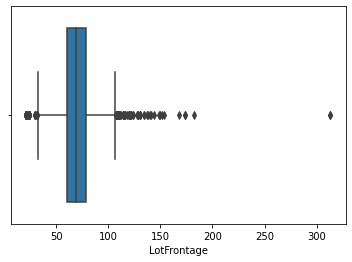

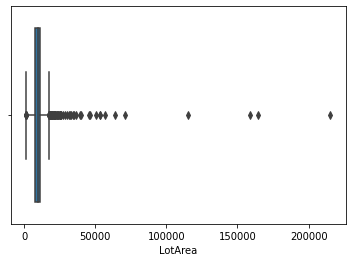

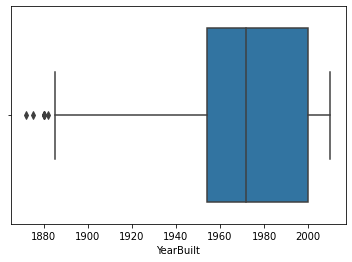

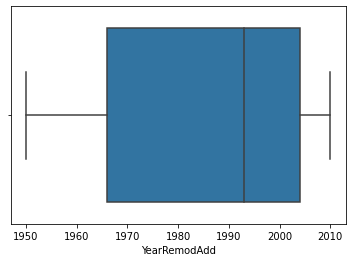

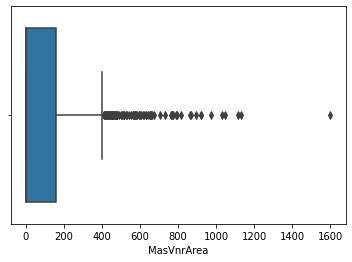

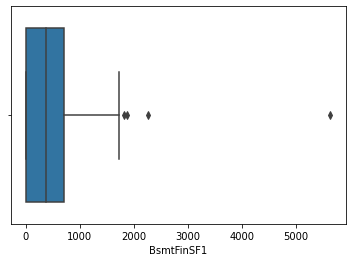

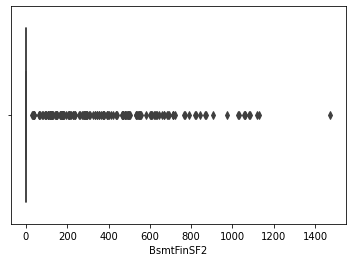

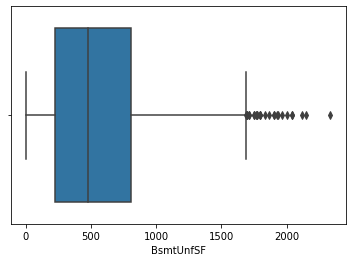

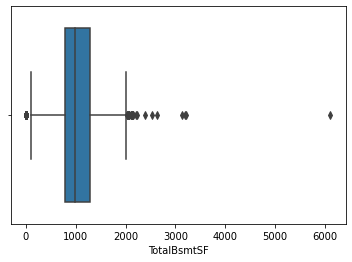

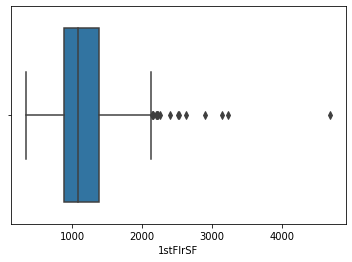

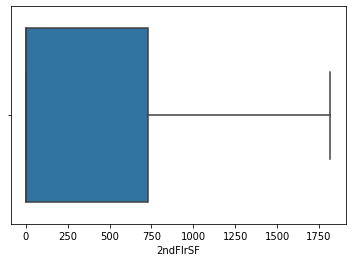

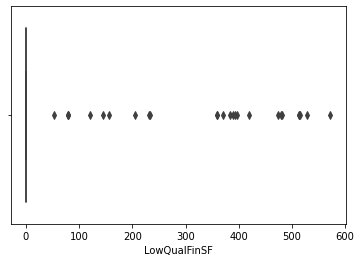

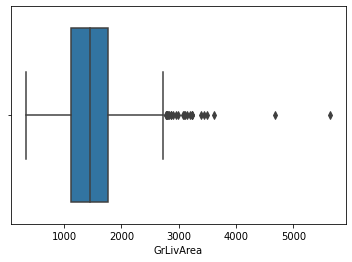

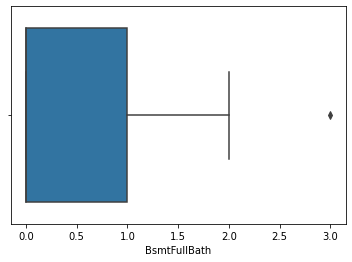

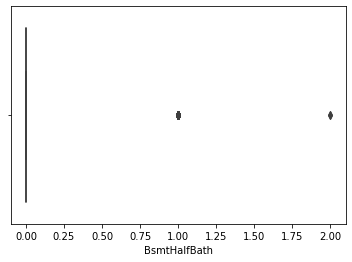

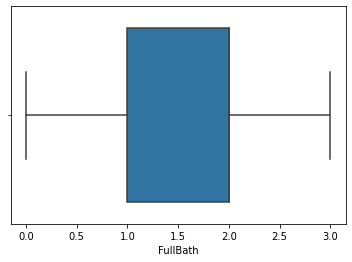

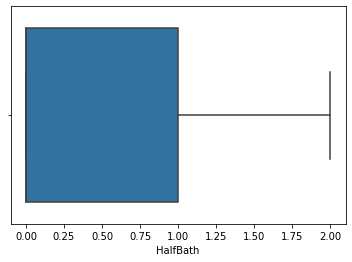

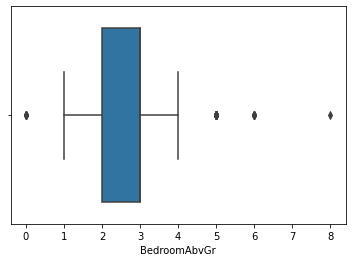

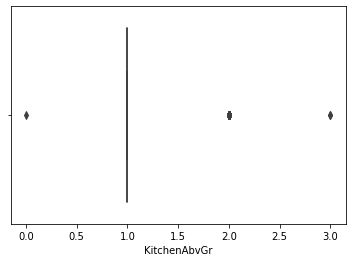

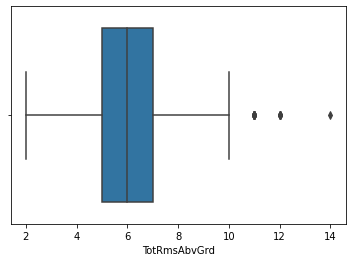

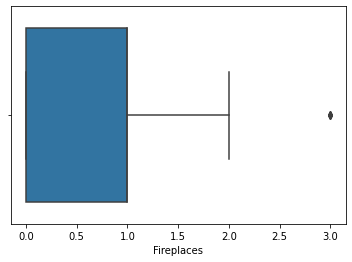

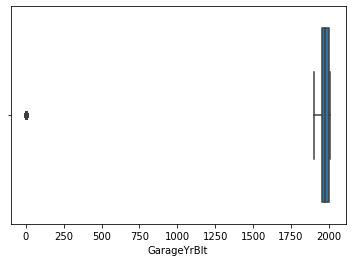

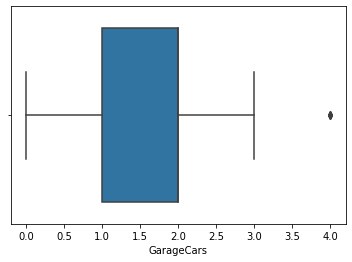

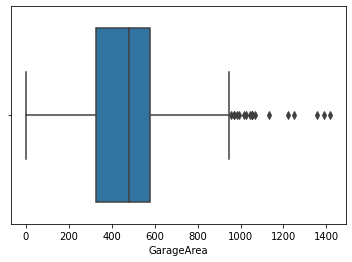

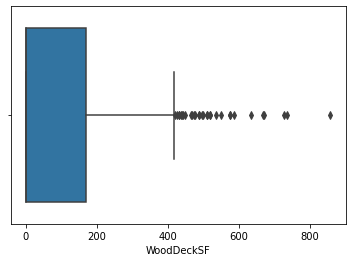

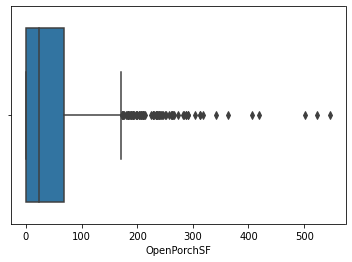

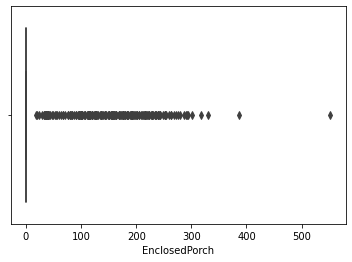

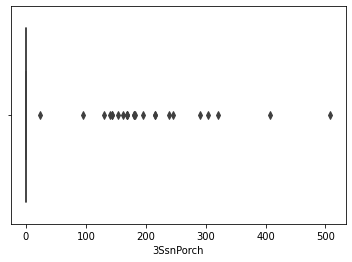

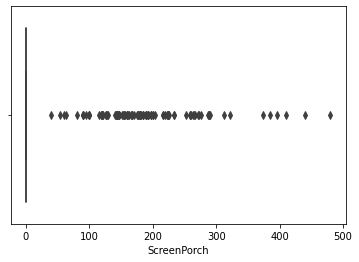

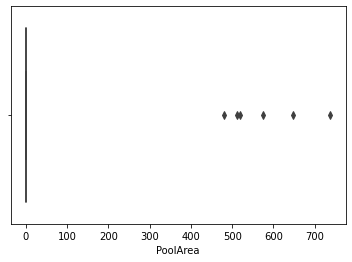

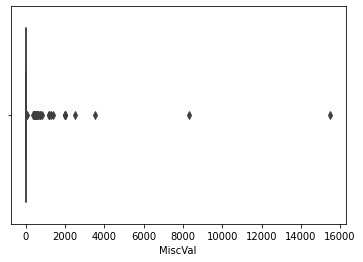

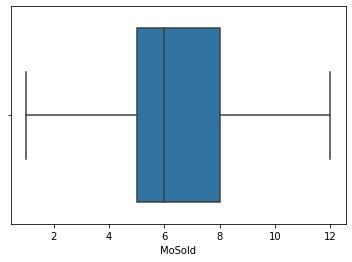

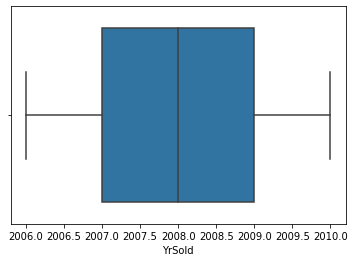

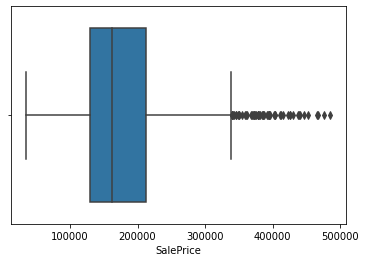

In [62]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : TotalBsmtSF has three points above 3000 which we will drop

In [63]:
house = house[house.TotalBsmtSF<=3000]

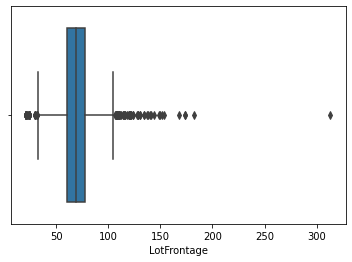

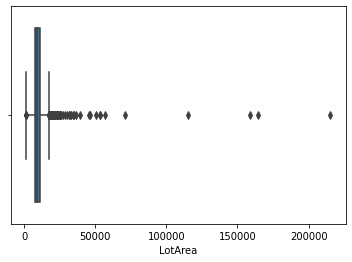

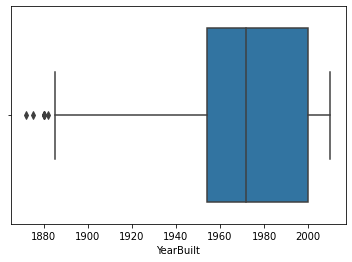

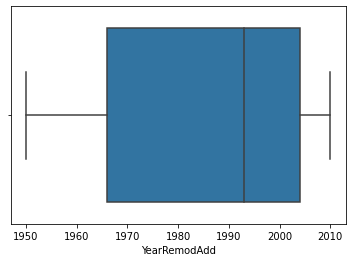

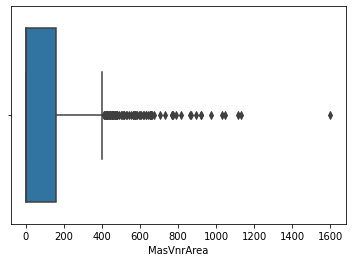

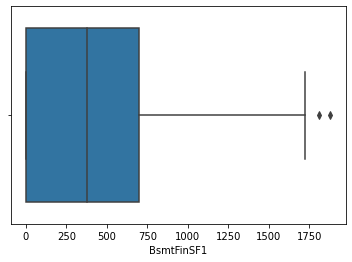

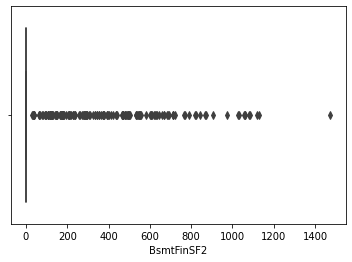

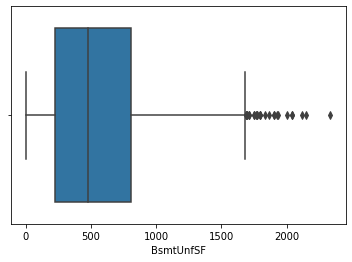

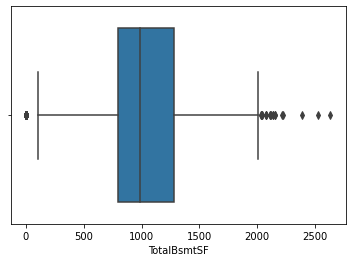

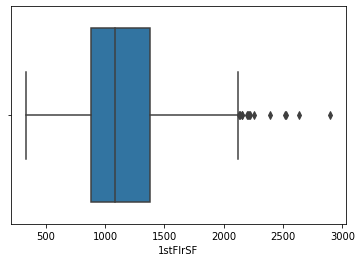

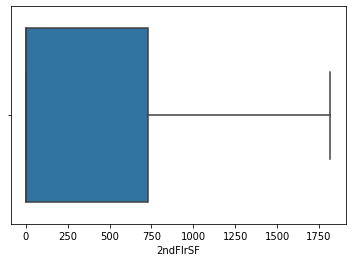

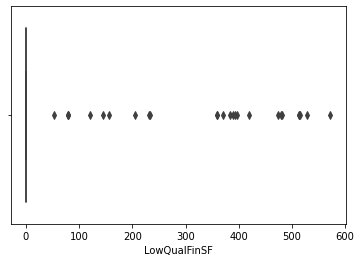

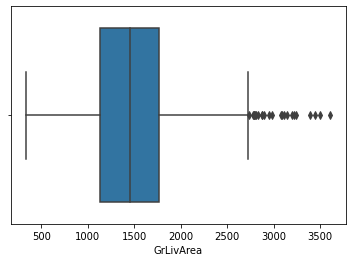

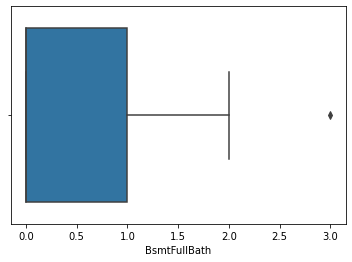

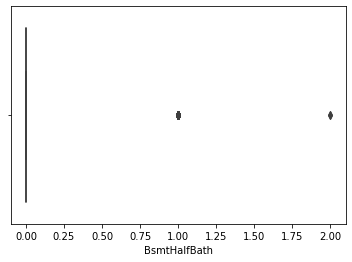

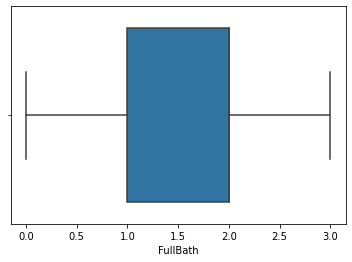

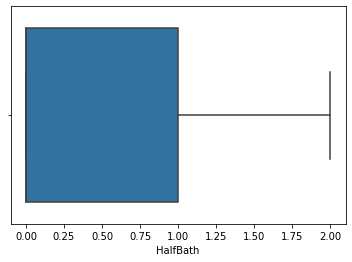

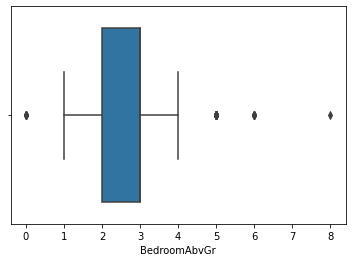

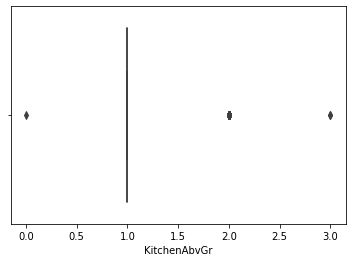

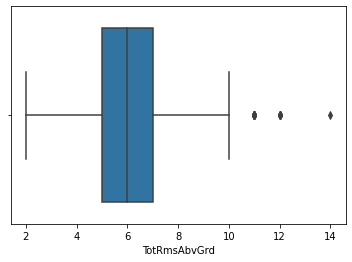

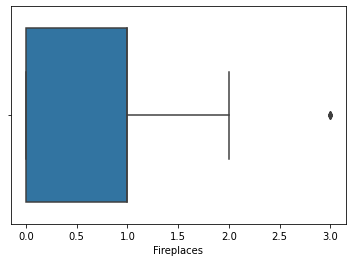

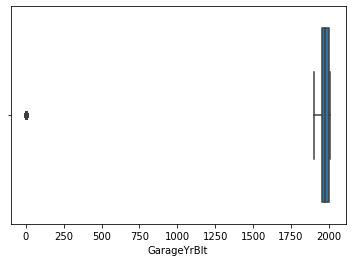

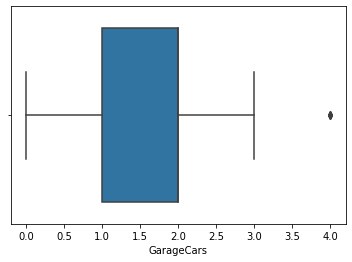

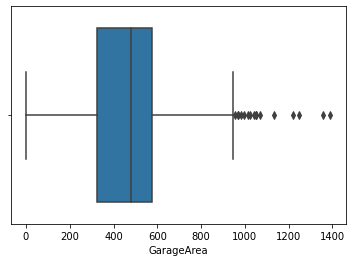

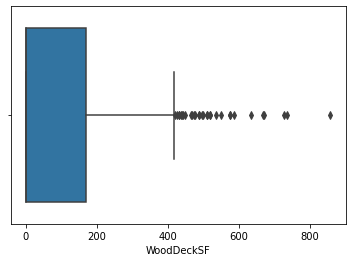

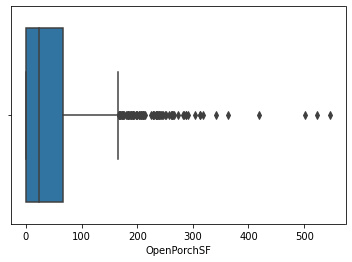

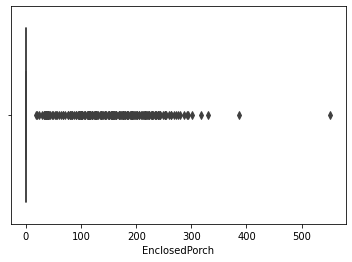

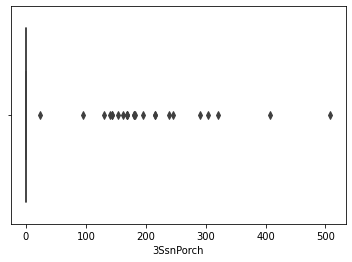

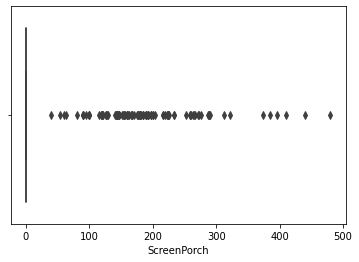

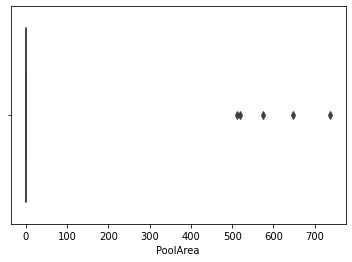

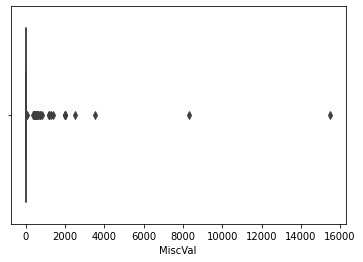

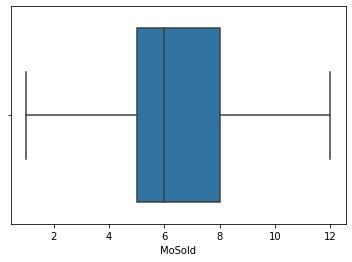

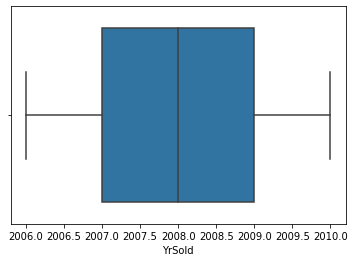

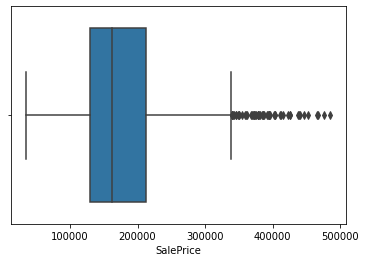

In [64]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : GarageArea has 5 points above 1100 which we will drop

In [65]:
house = house[house.GarageArea<=1100]

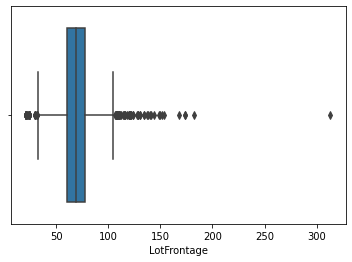

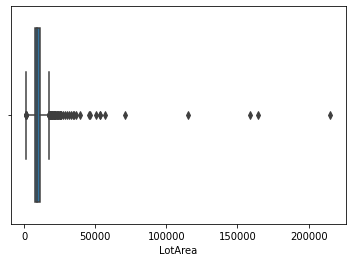

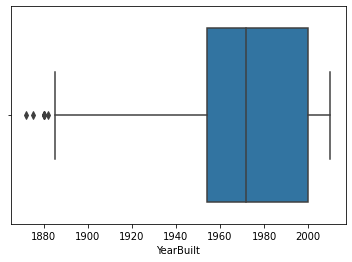

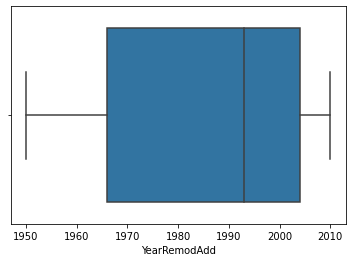

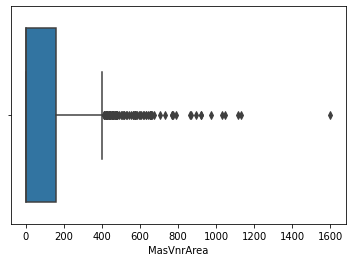

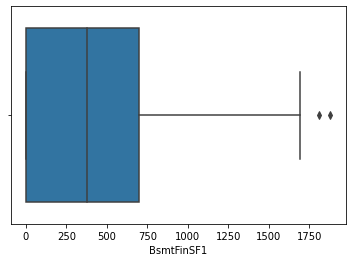

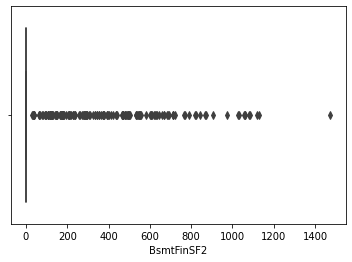

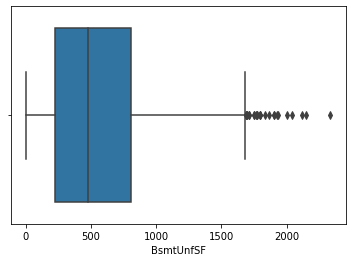

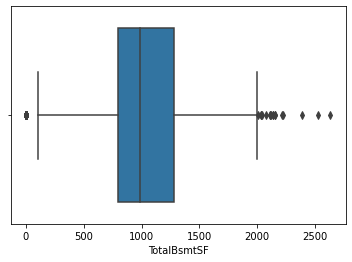

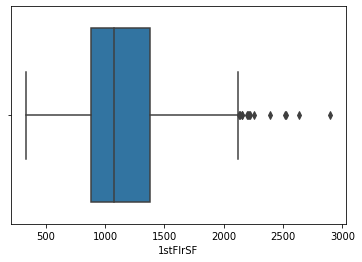

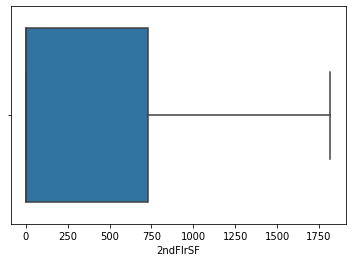

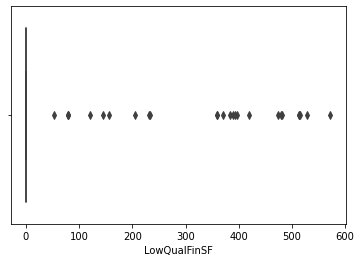

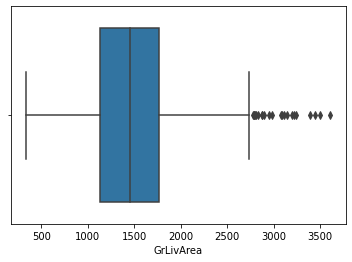

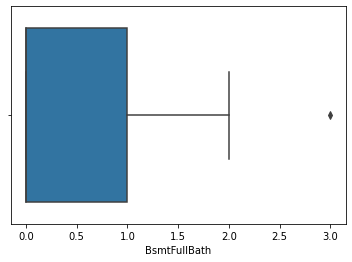

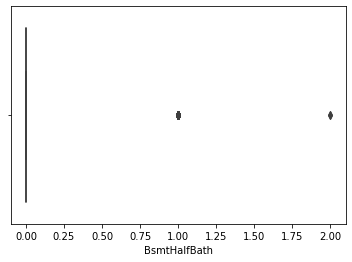

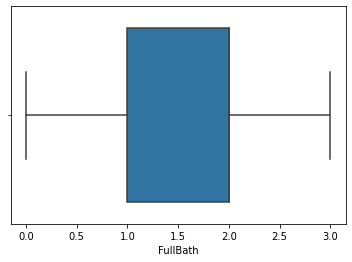

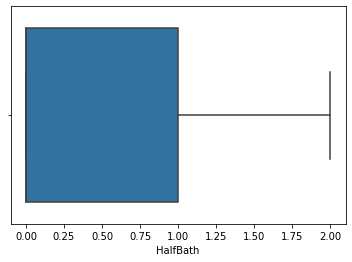

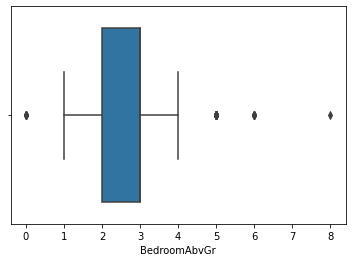

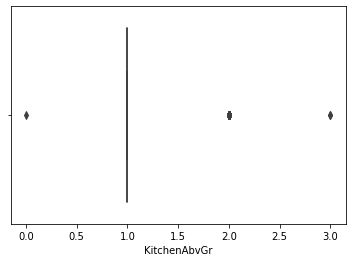

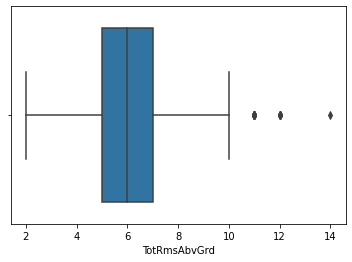

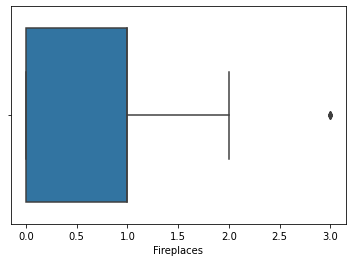

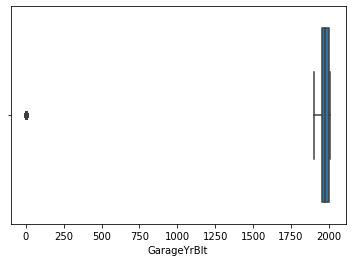

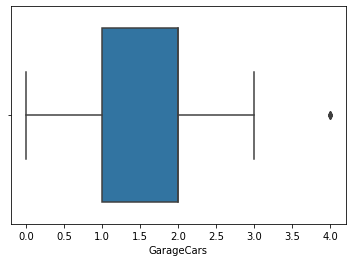

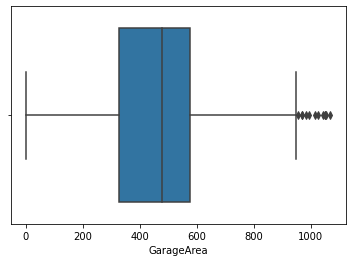

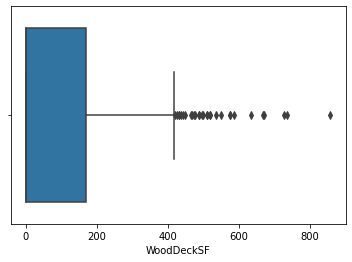

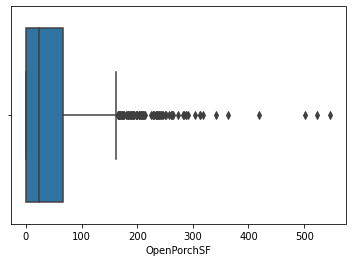

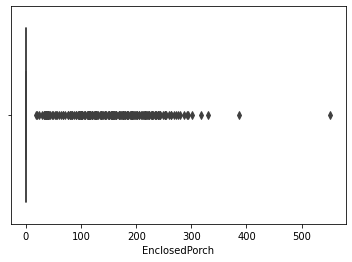

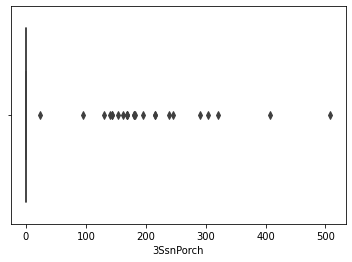

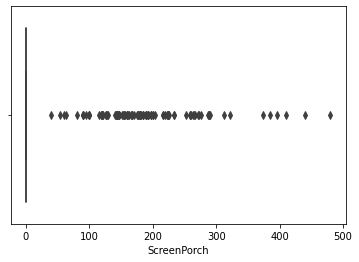

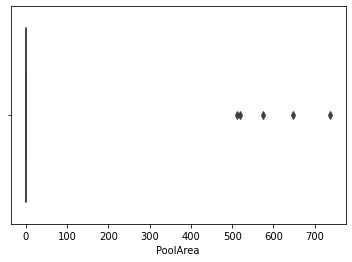

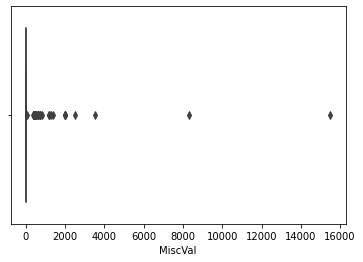

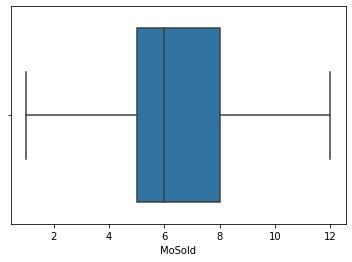

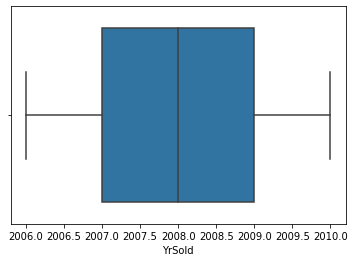

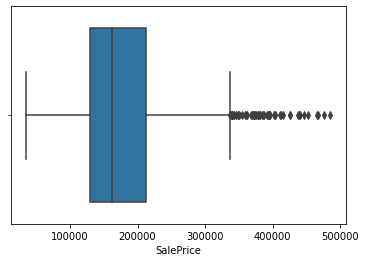

In [66]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : GarageCars has 1 points above 3 which we will drop

In [67]:
house = house[house.GarageCars<=3]

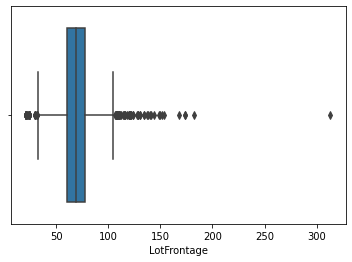

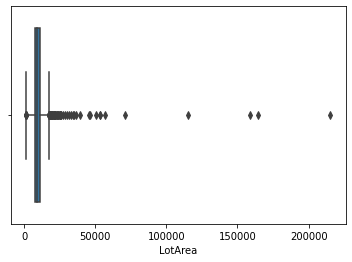

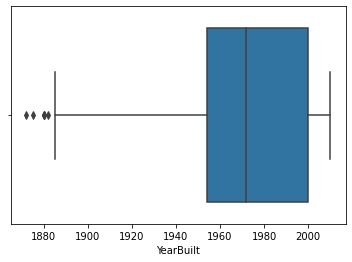

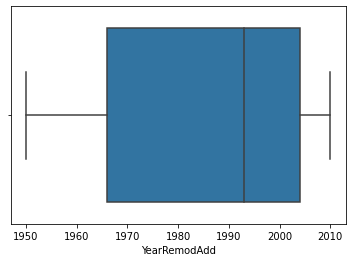

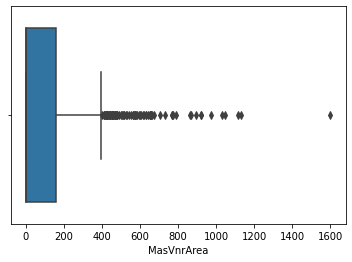

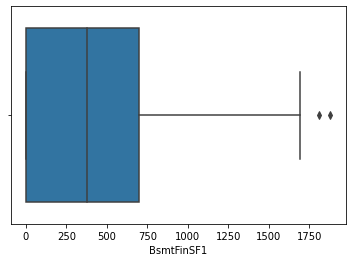

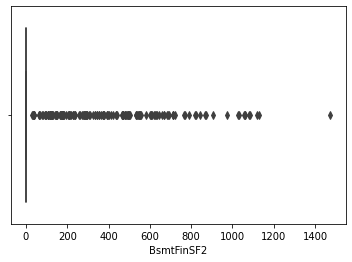

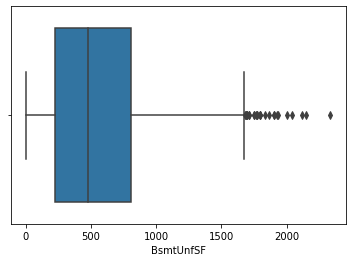

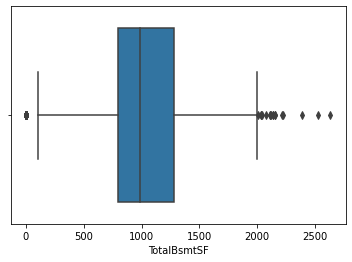

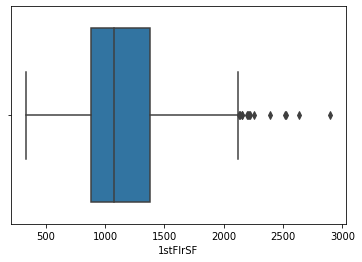

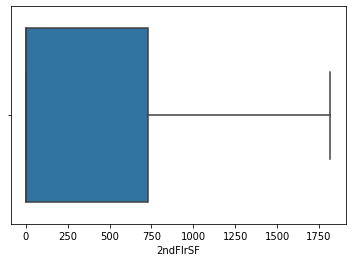

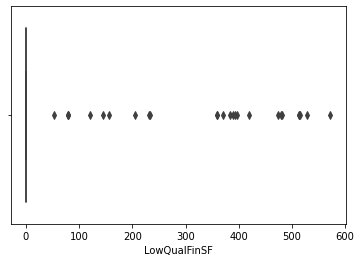

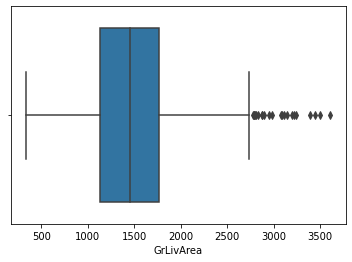

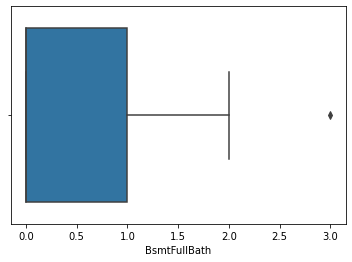

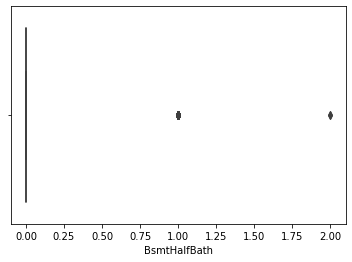

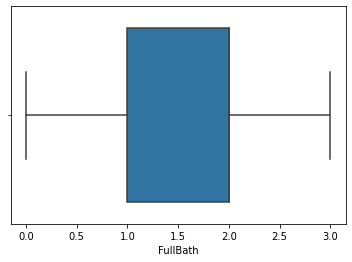

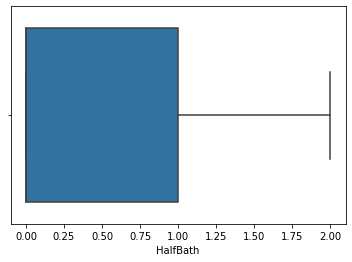

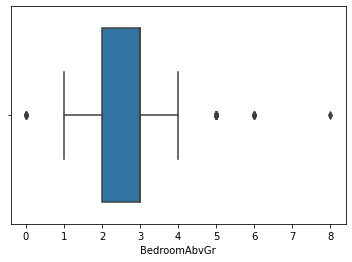

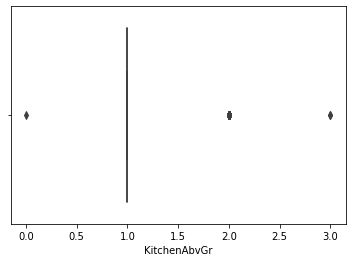

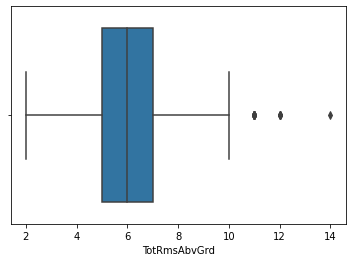

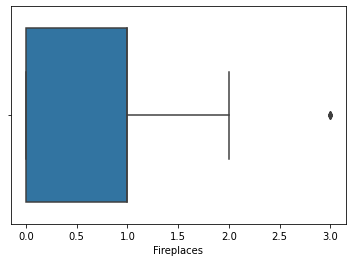

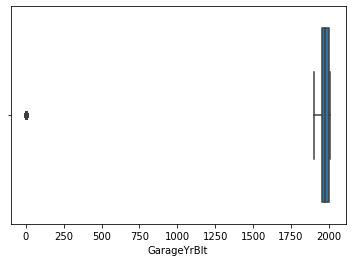

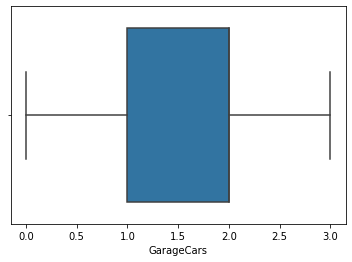

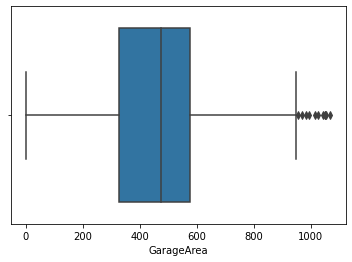

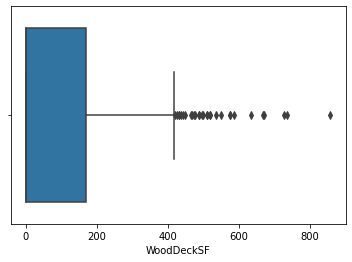

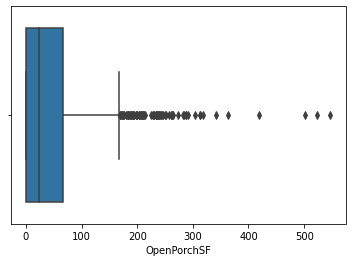

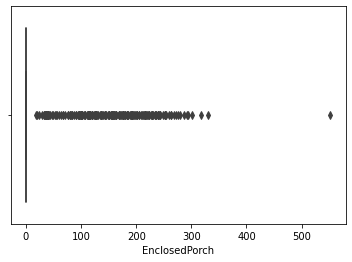

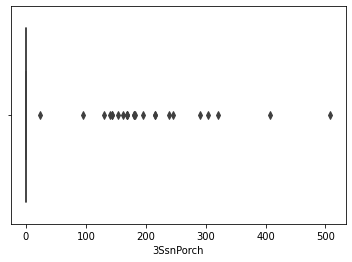

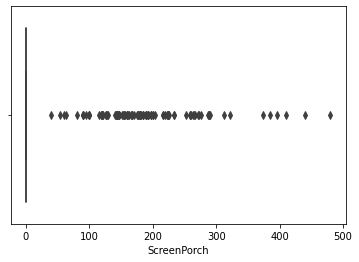

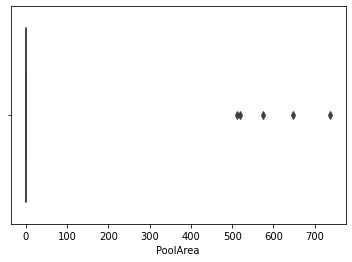

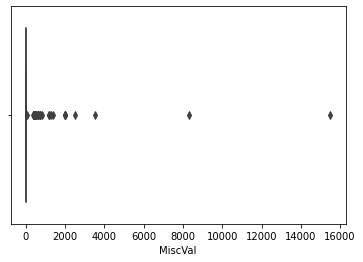

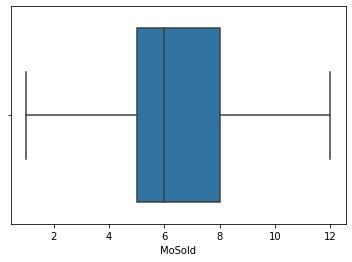

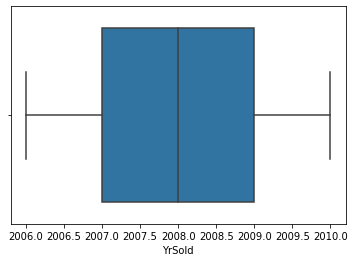

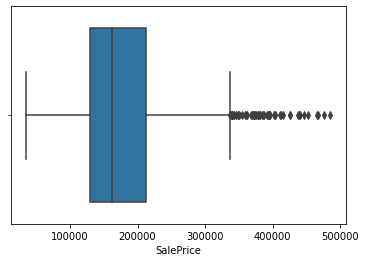

In [68]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : Fireplaces has 1 points above 2 which we will drop

In [69]:
house = house[house.Fireplaces<=2]

<font color='blue'>**Observation**</font> : TotRmsAbvGrd has 3 points above 10 which we will drop

In [70]:
house = house[house.TotRmsAbvGrd<=10]

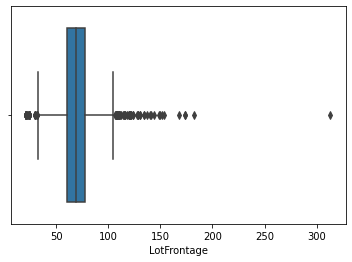

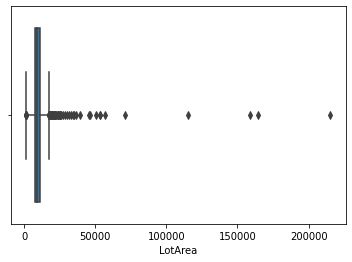

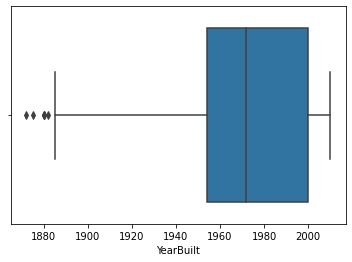

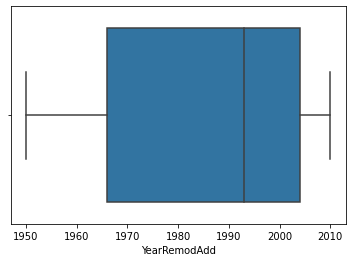

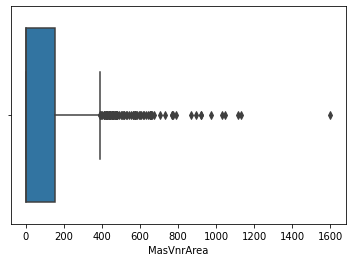

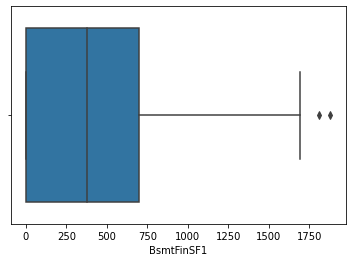

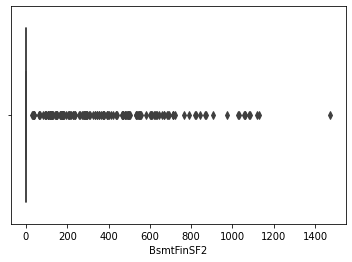

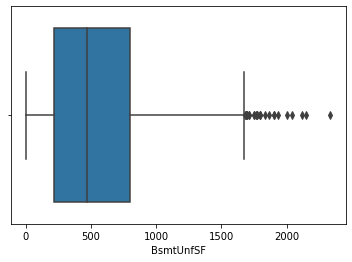

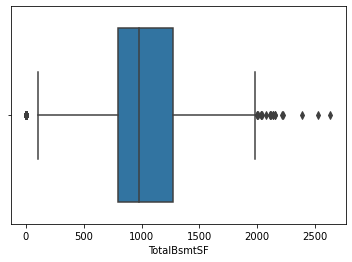

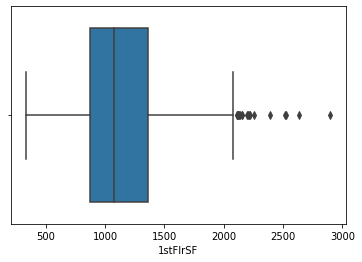

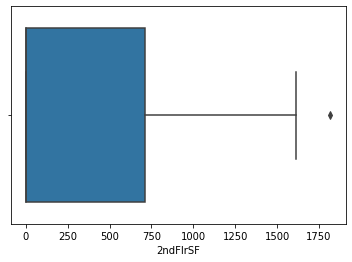

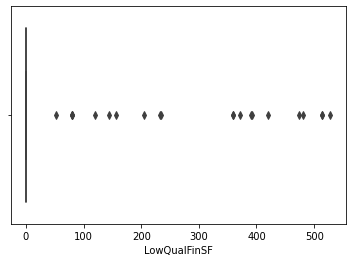

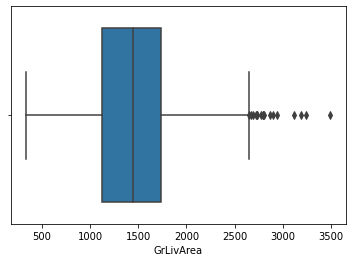

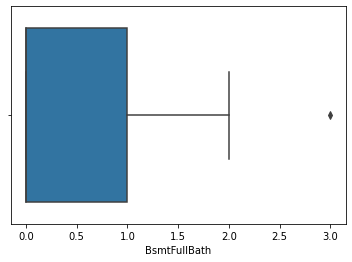

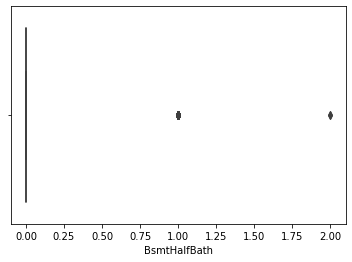

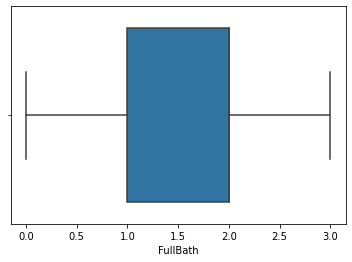

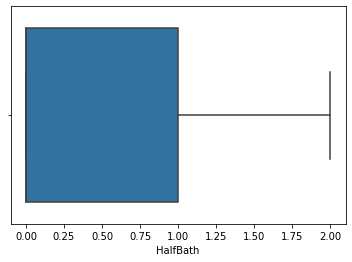

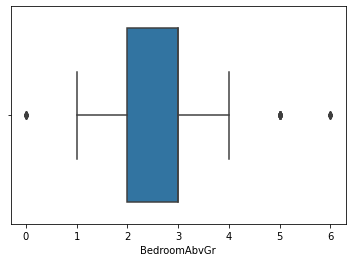

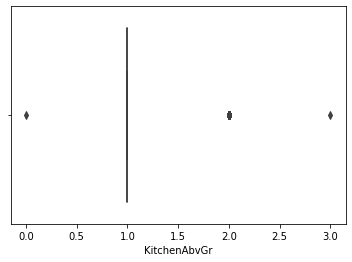

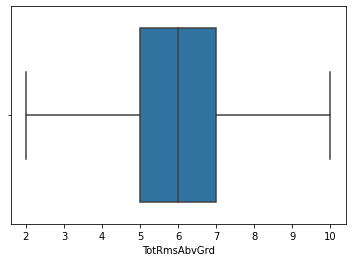

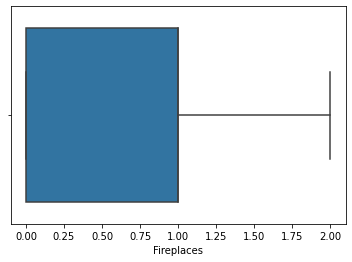

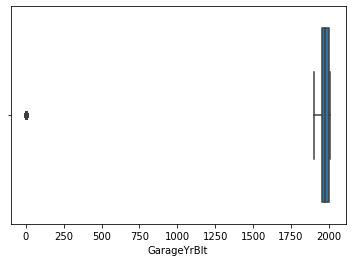

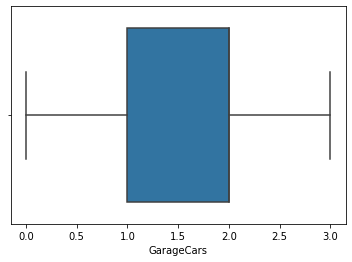

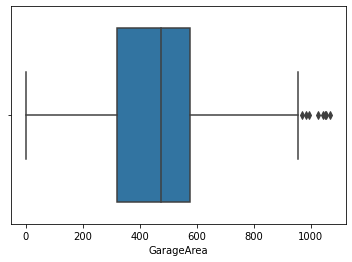

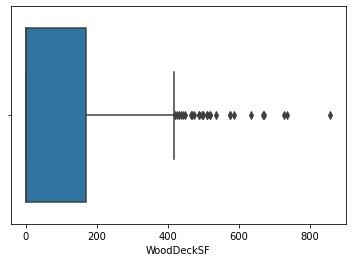

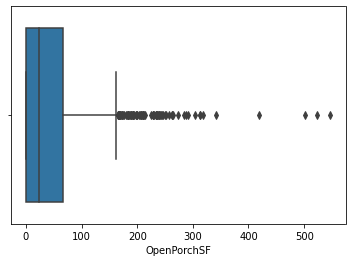

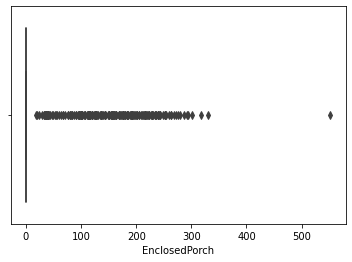

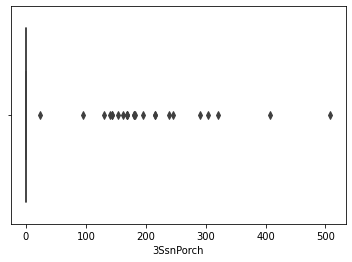

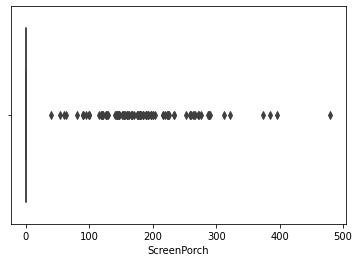

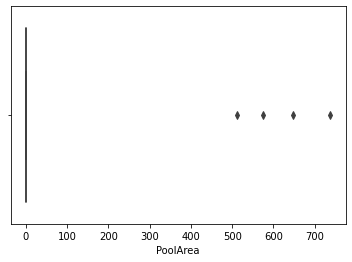

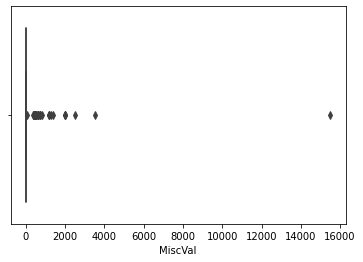

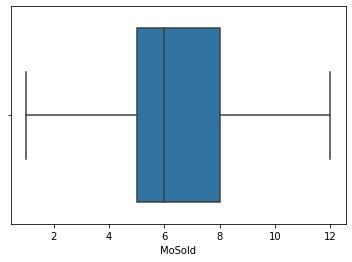

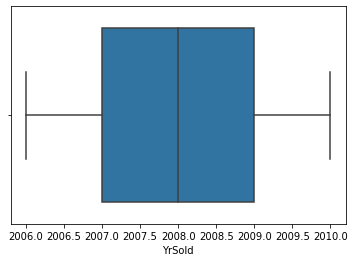

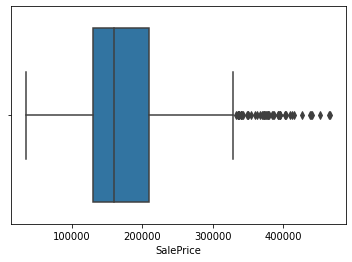

In [71]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : LotFrontage has 5 points above 160 which we will drop

In [72]:
house = house[house.LotFrontage<=160]

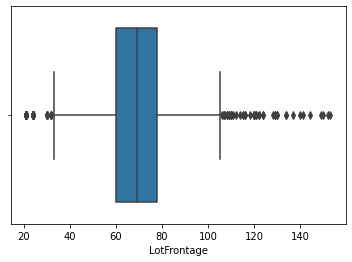

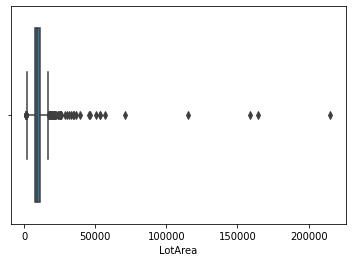

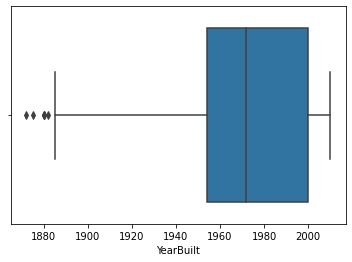

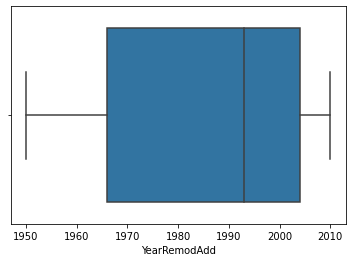

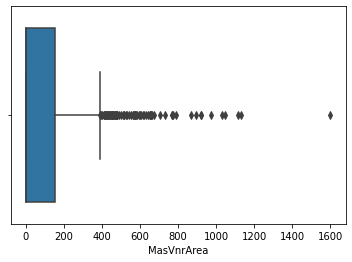

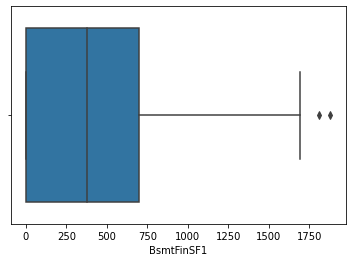

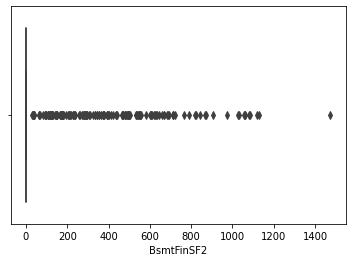

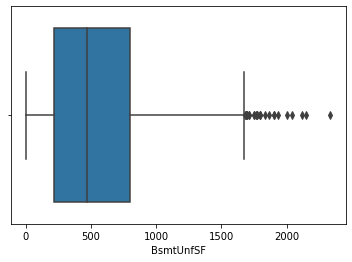

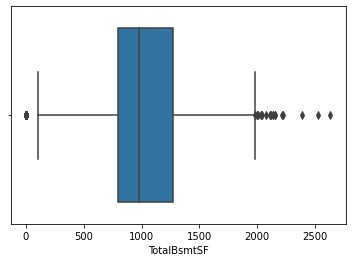

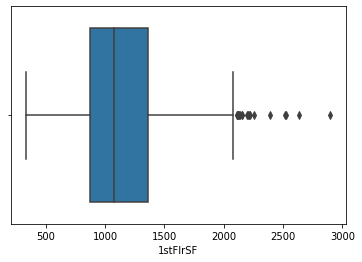

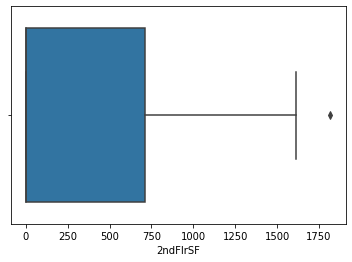

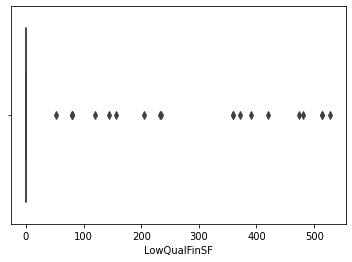

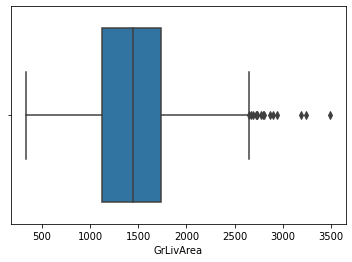

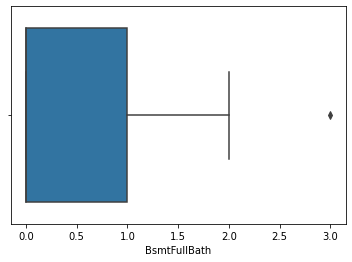

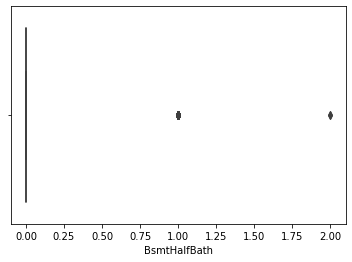

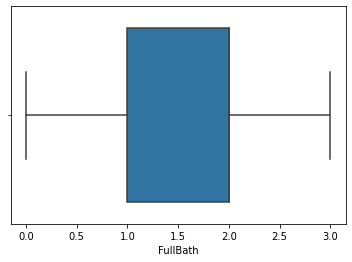

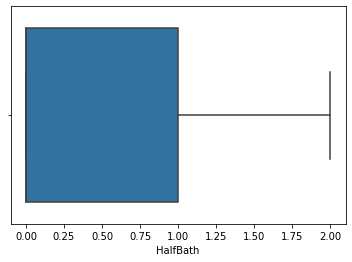

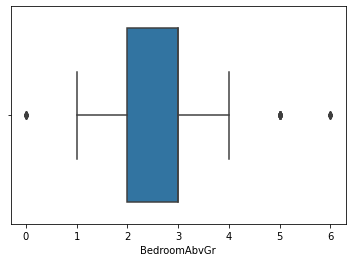

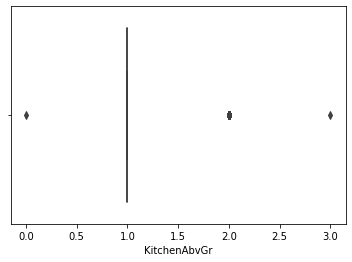

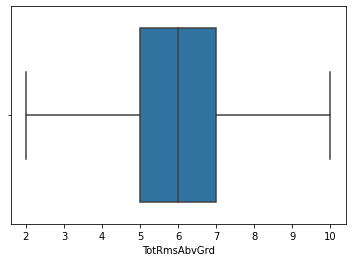

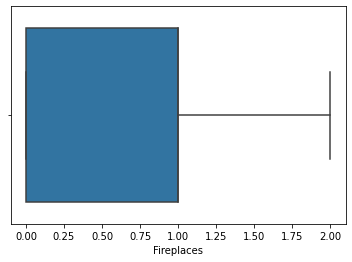

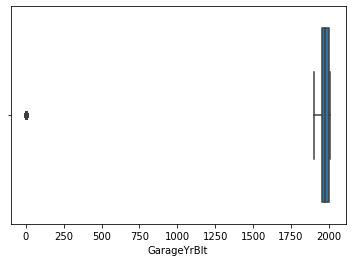

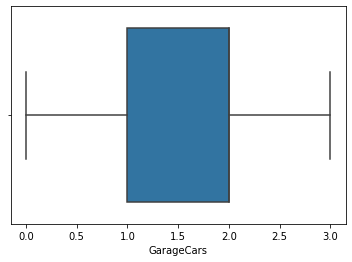

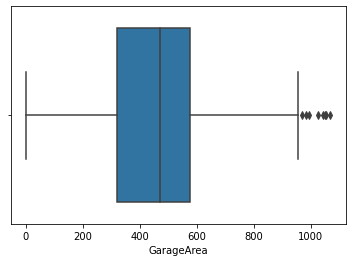

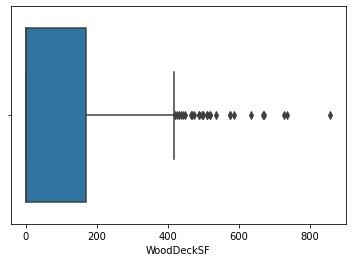

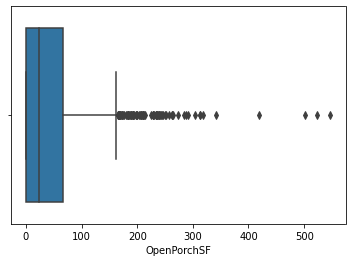

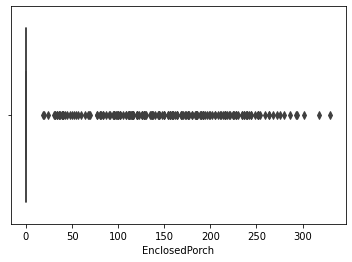

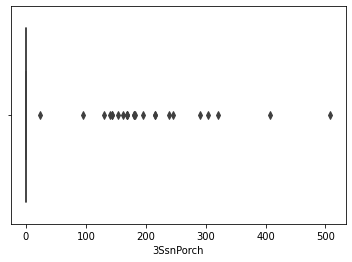

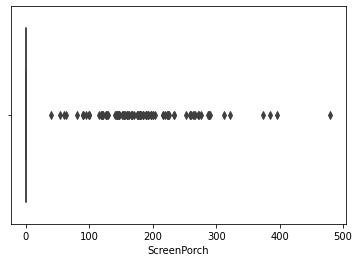

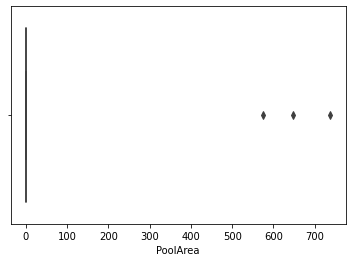

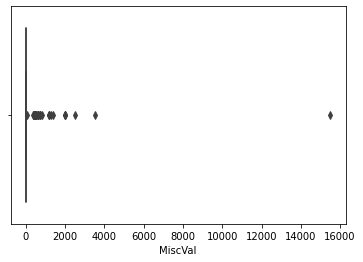

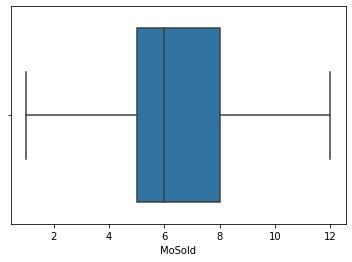

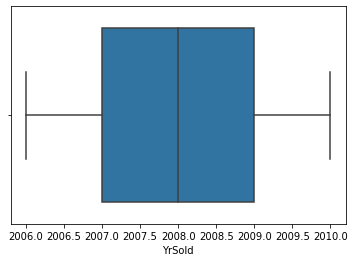

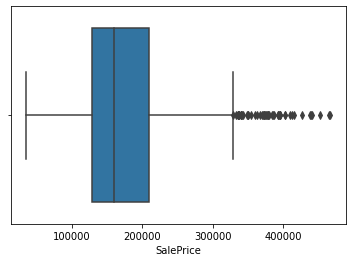

In [73]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : LotArea has 5 points above 60000 which we will drop

In [74]:
house = house[house.LotArea<=60000]

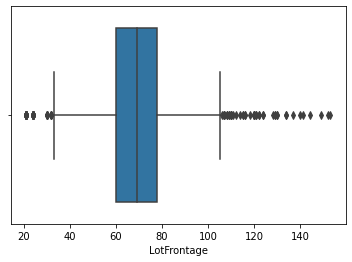

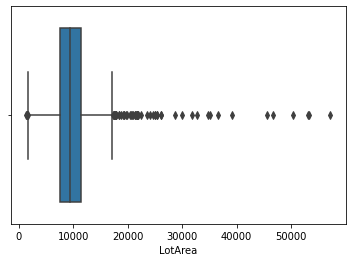

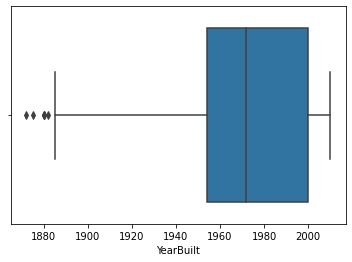

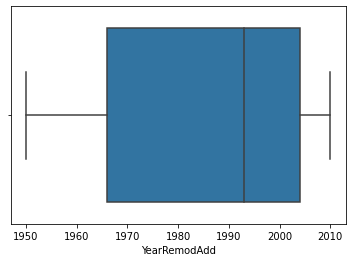

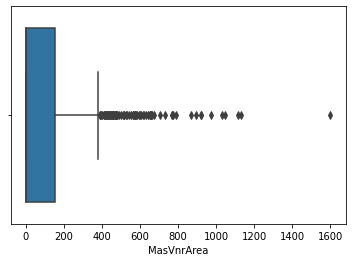

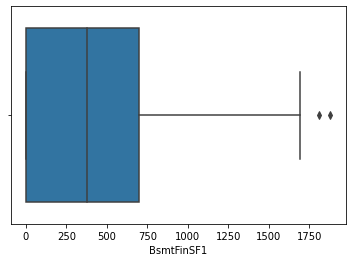

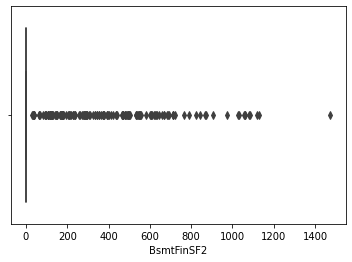

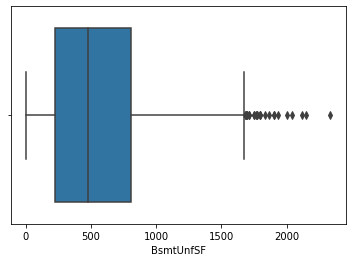

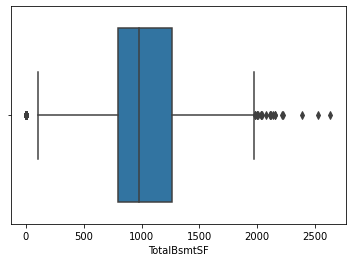

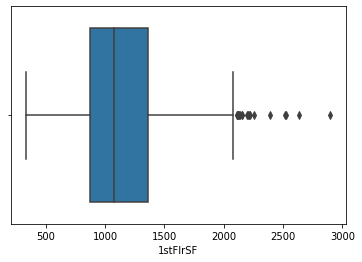

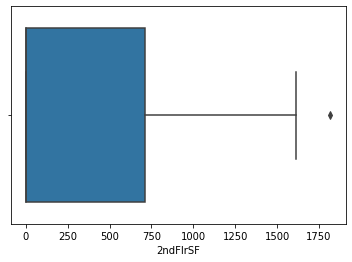

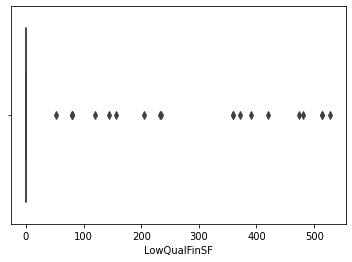

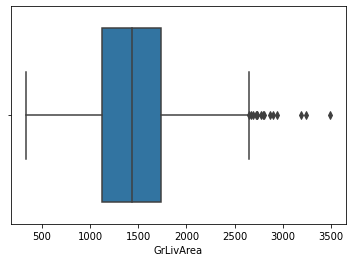

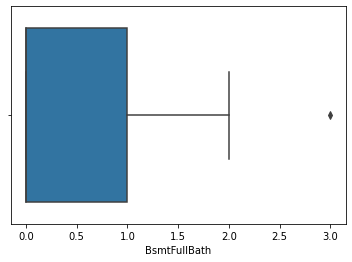

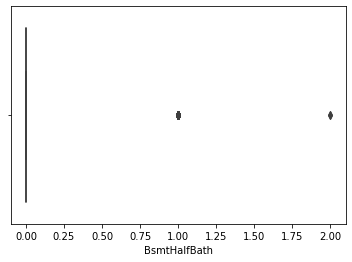

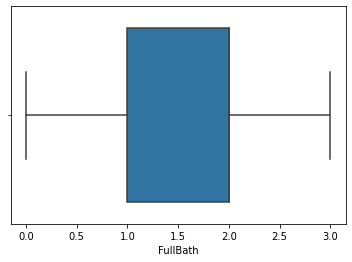

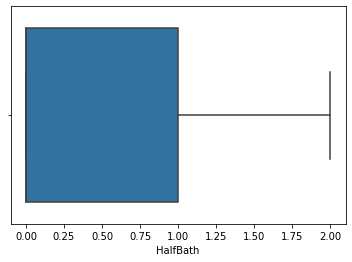

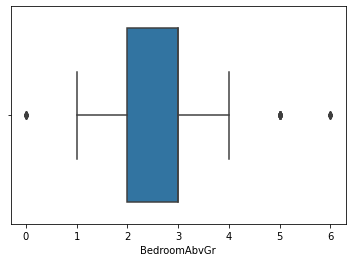

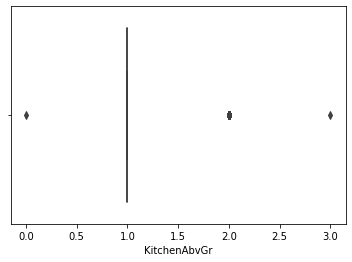

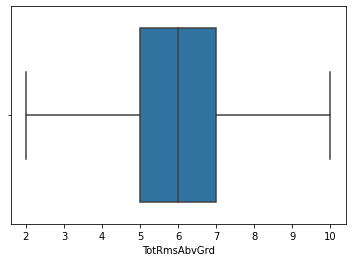

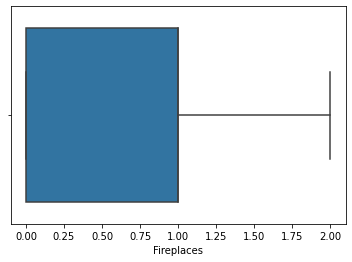

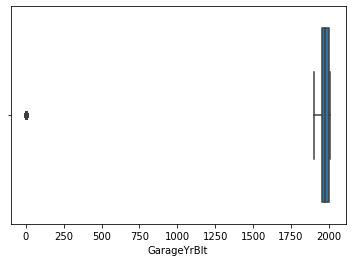

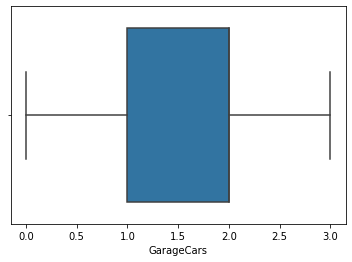

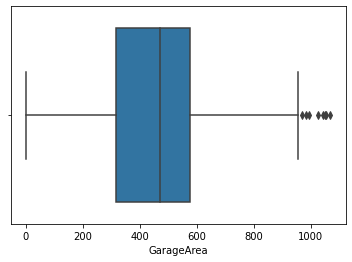

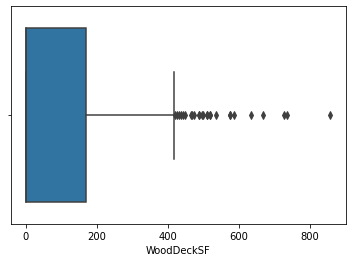

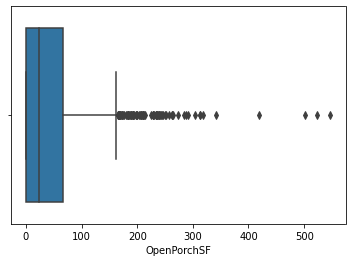

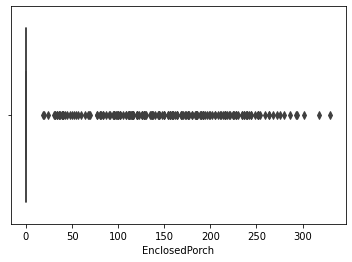

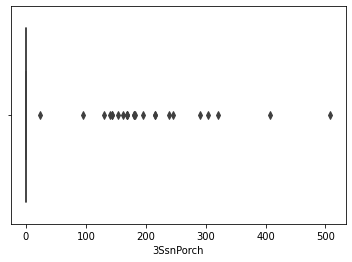

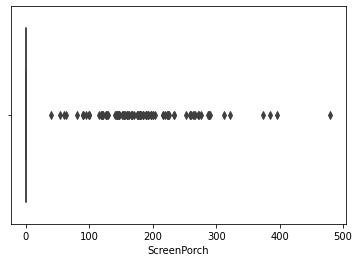

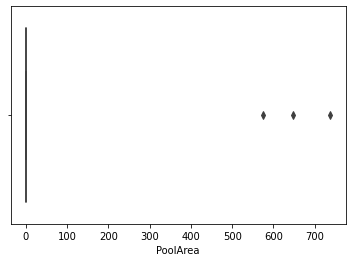

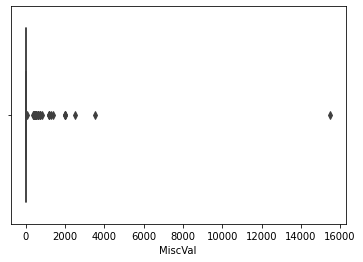

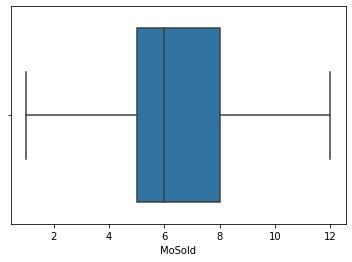

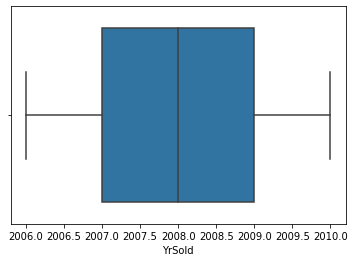

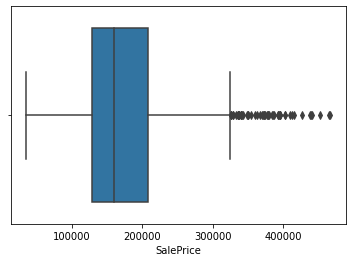

In [75]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : MasVnrArea has 1 points above 1200 which we will drop

In [76]:
house = house[house.MasVnrArea<=1200]

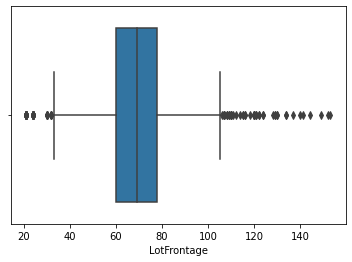

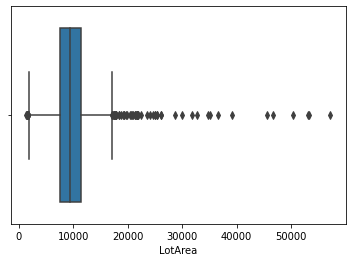

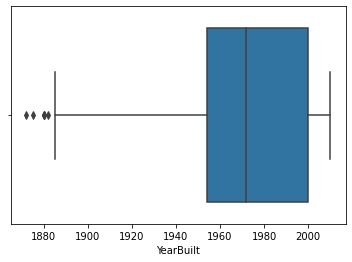

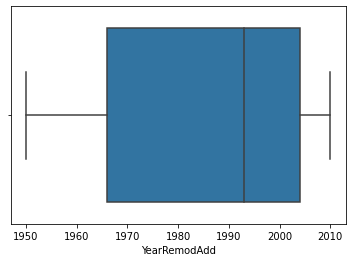

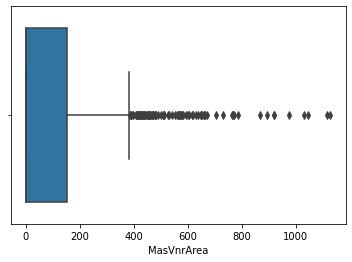

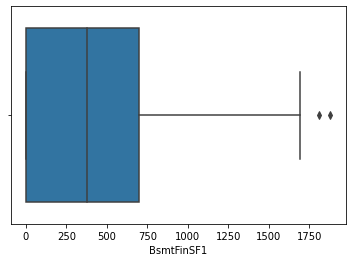

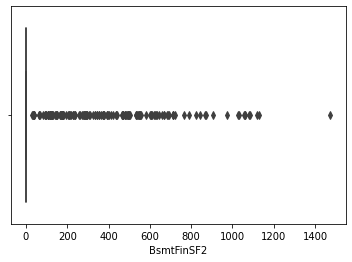

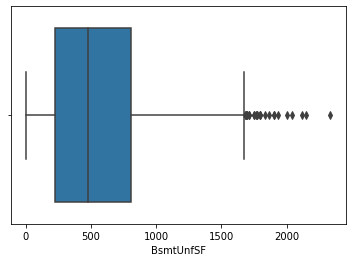

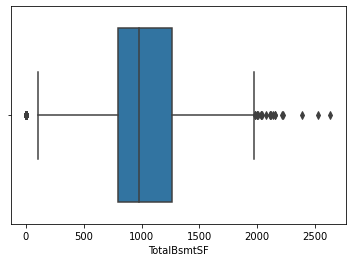

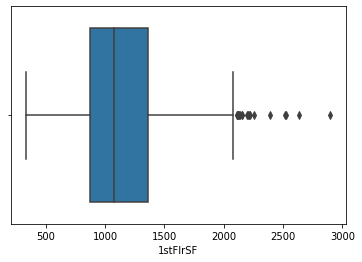

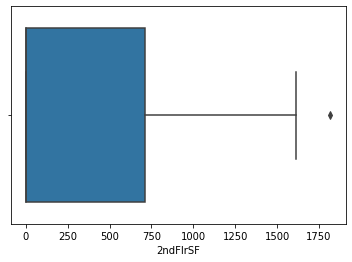

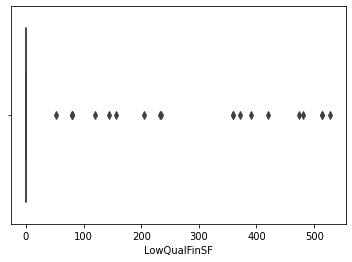

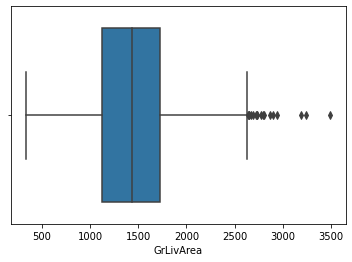

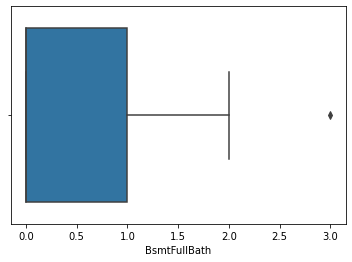

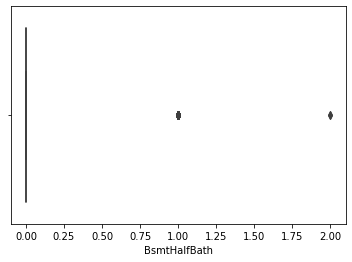

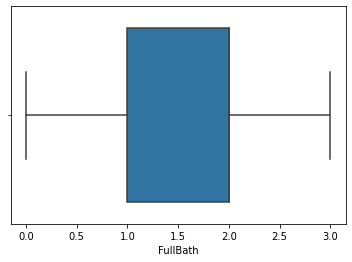

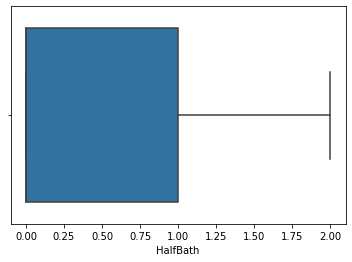

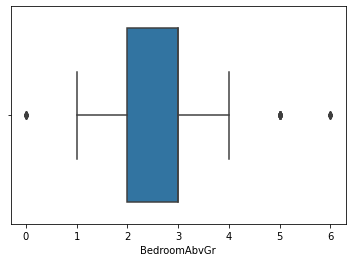

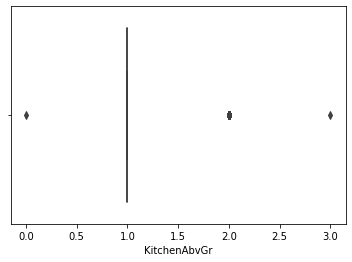

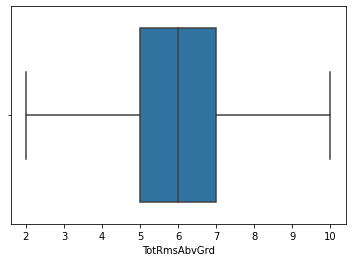

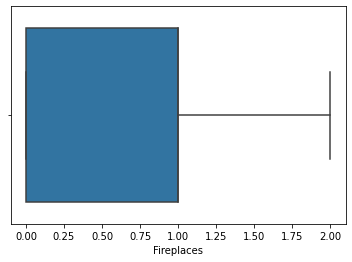

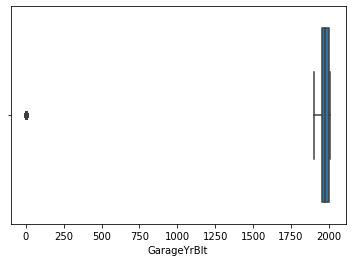

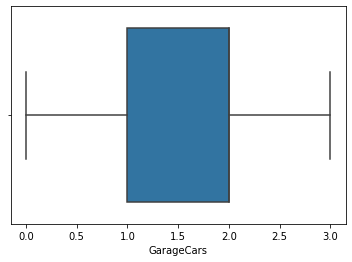

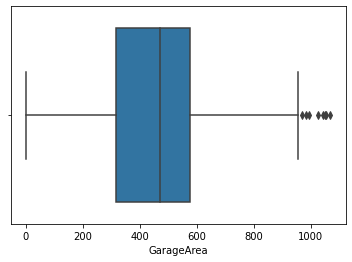

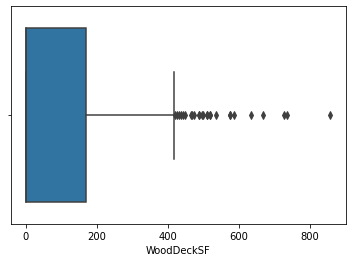

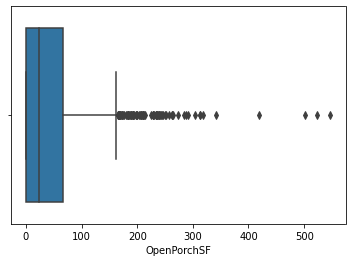

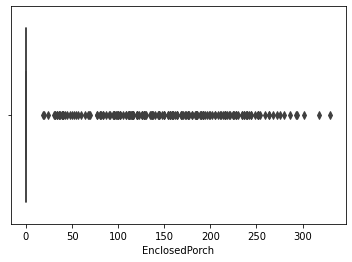

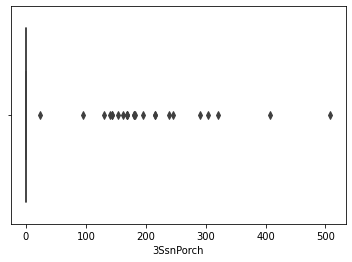

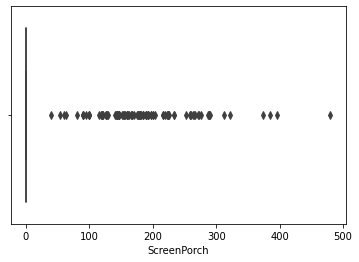

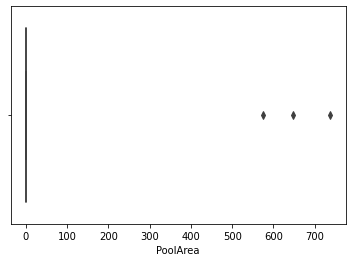

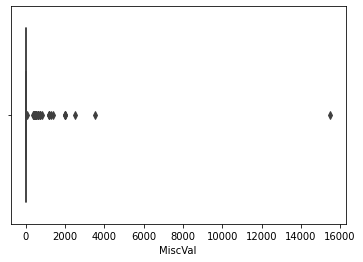

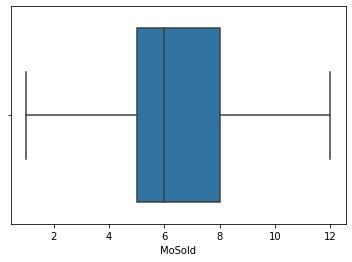

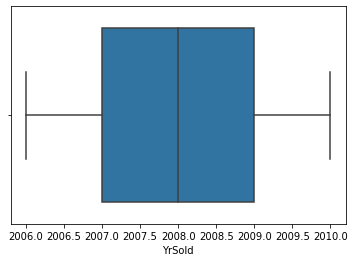

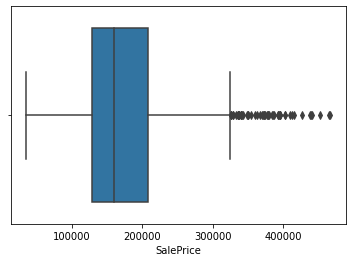

In [77]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : WoodDeckSF has 5 points above 600 which we will drop

In [78]:
house = house[house.WoodDeckSF<=600]

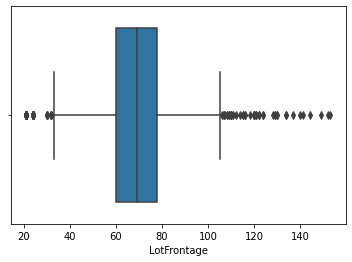

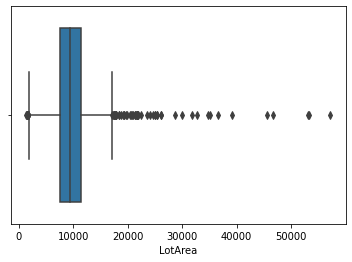

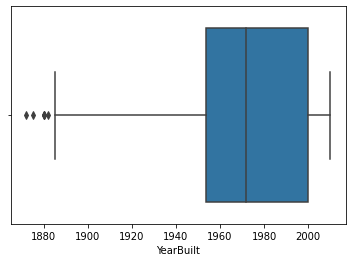

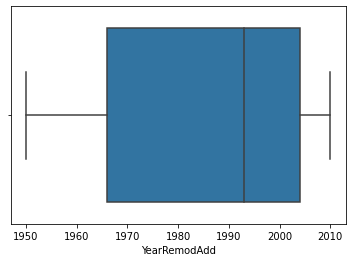

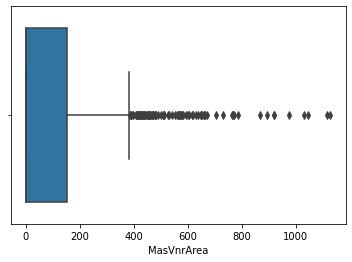

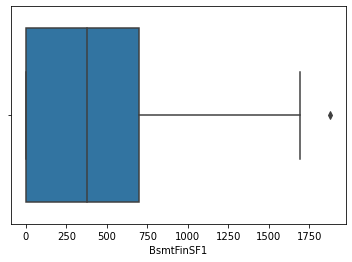

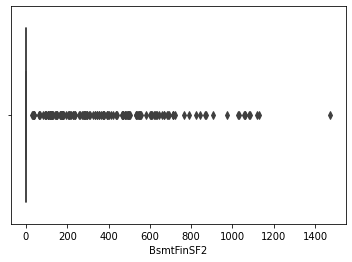

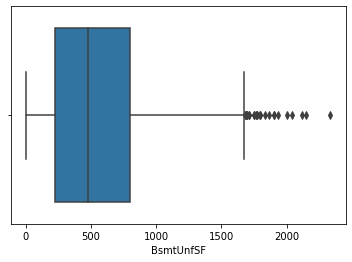

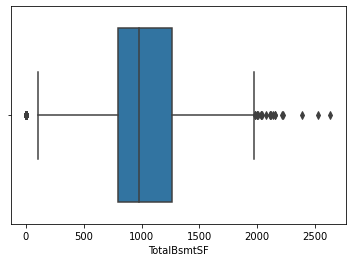

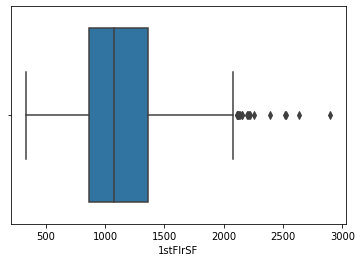

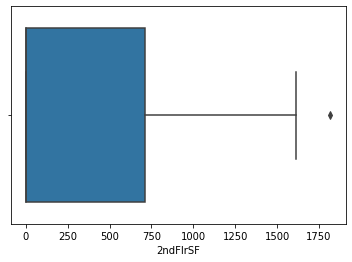

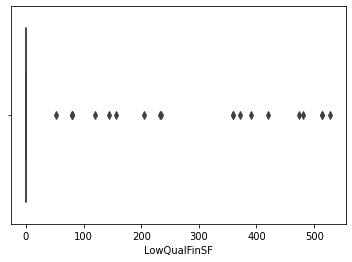

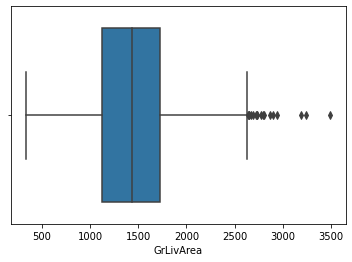

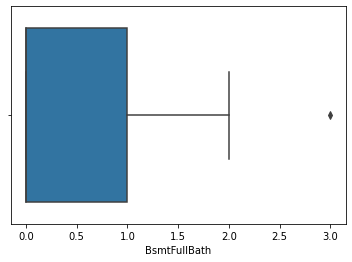

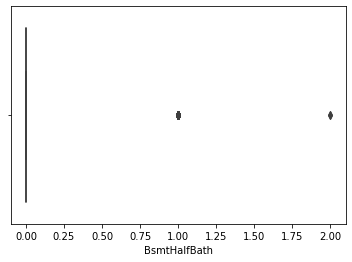

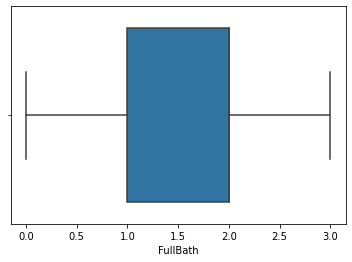

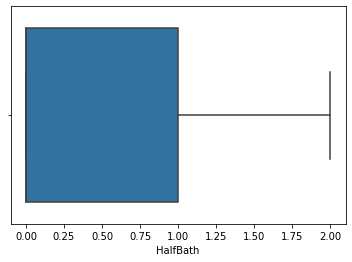

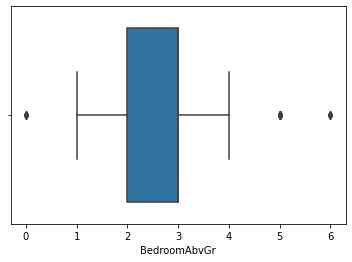

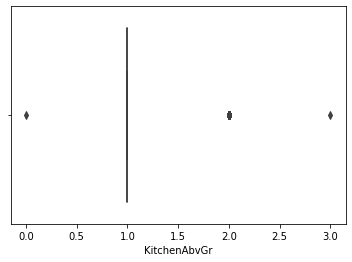

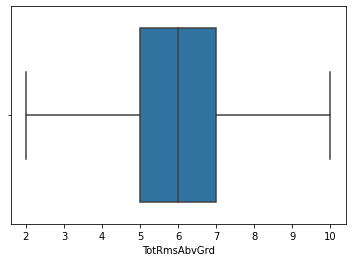

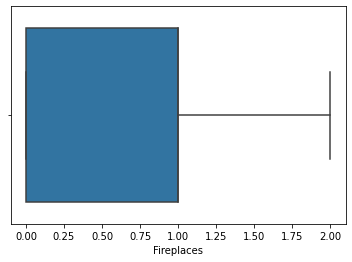

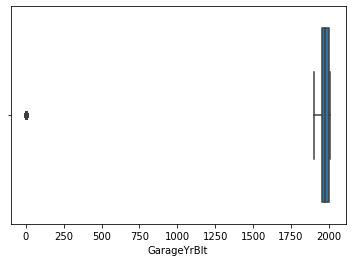

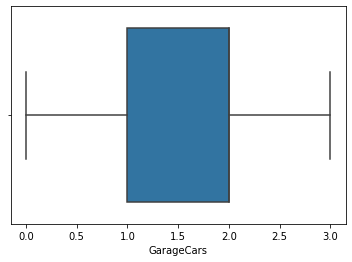

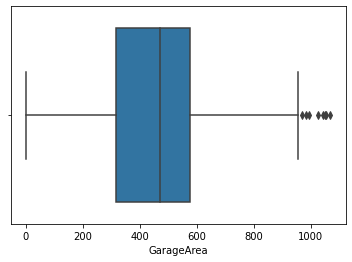

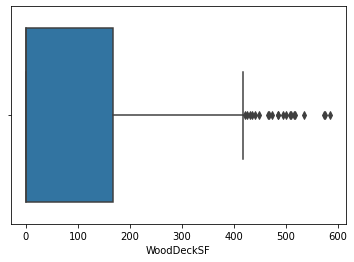

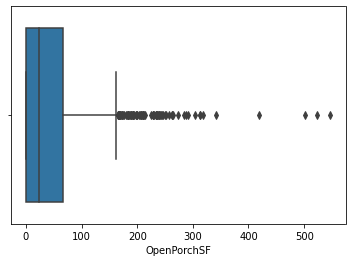

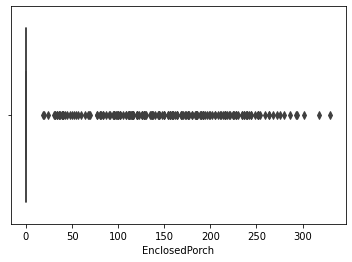

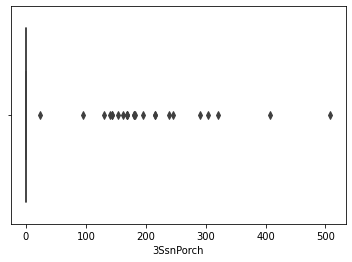

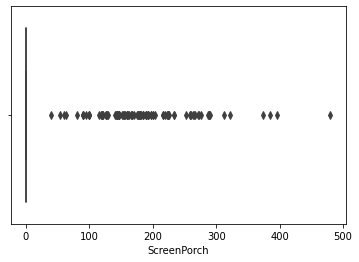

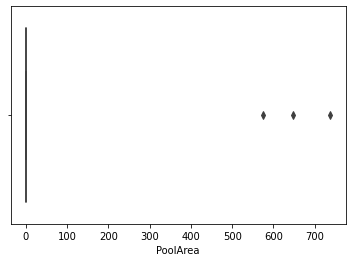

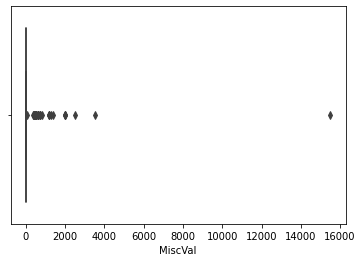

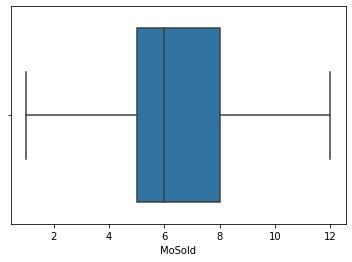

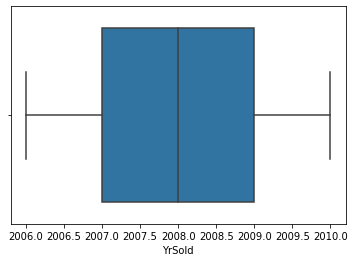

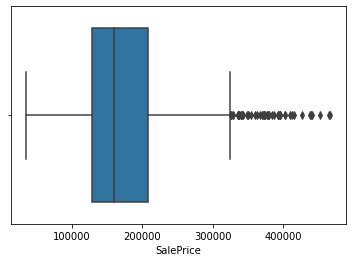

In [79]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : BsmtFullBath has 1 points above 2 which we will drop

In [80]:
house = house[house.BsmtFullBath<=2]

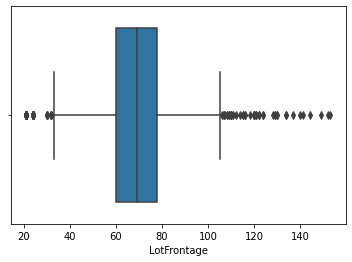

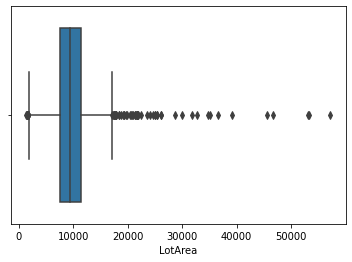

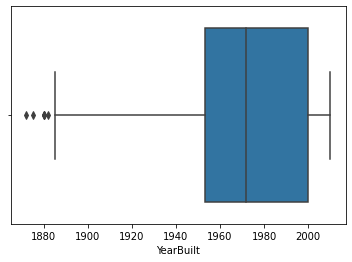

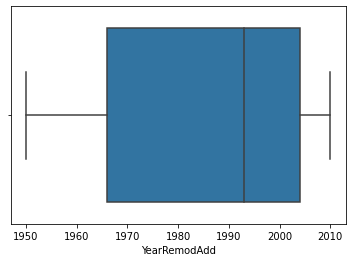

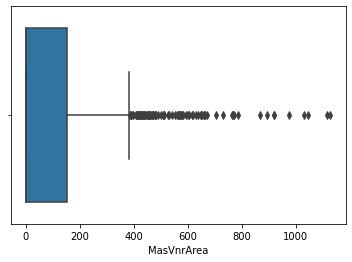

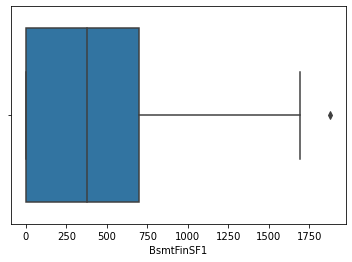

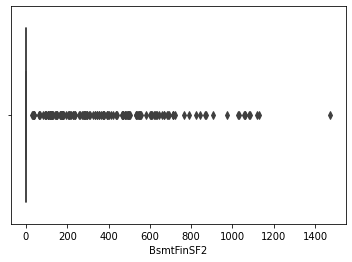

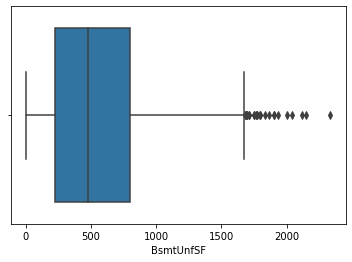

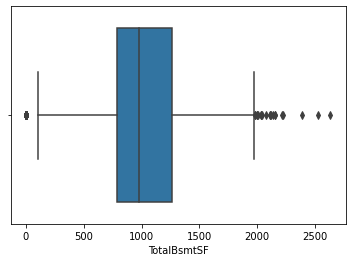

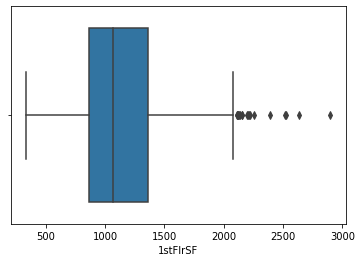

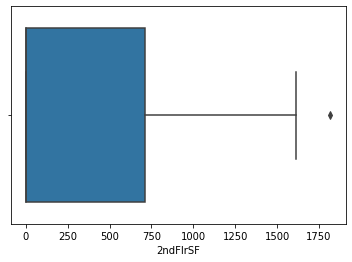

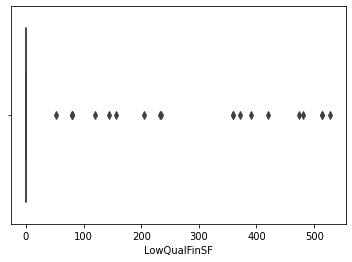

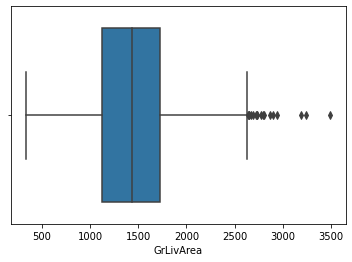

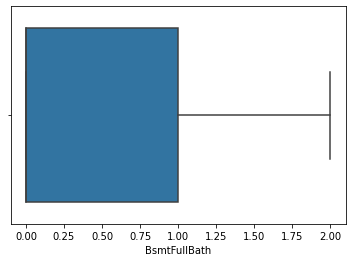

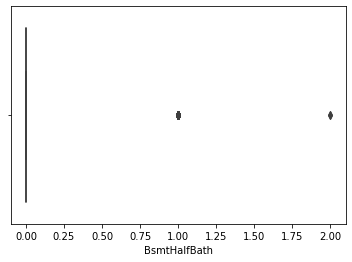

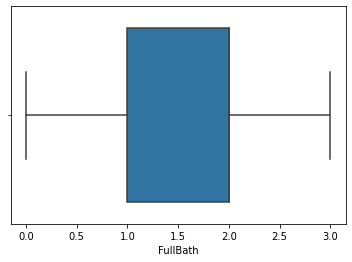

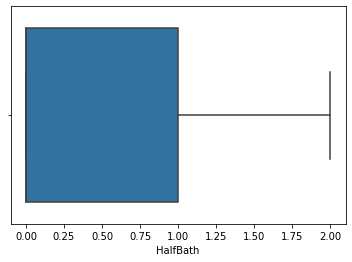

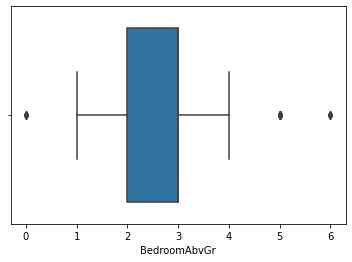

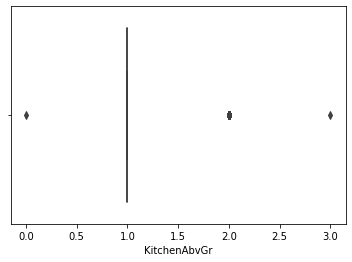

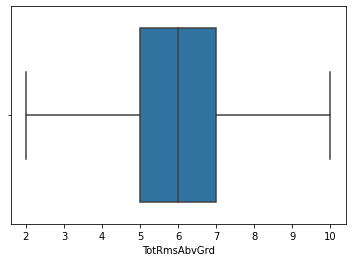

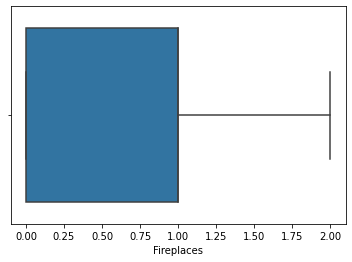

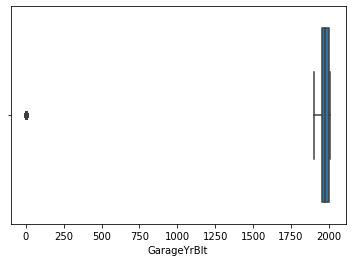

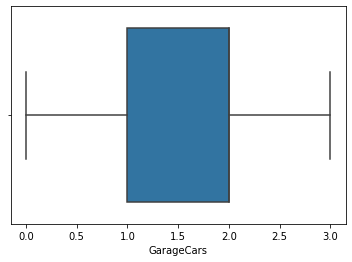

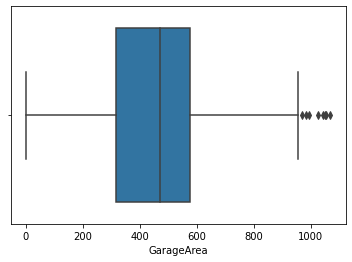

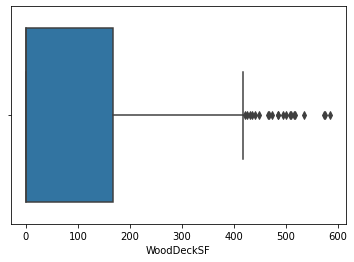

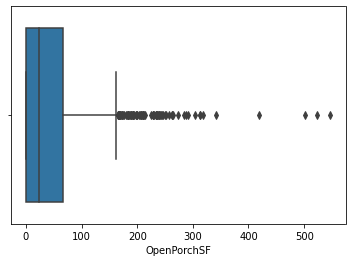

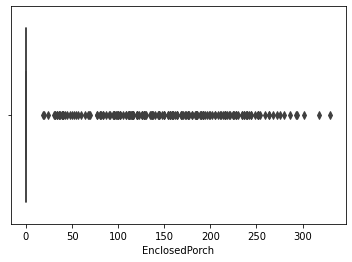

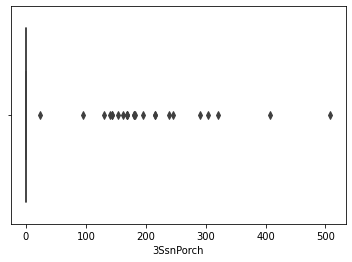

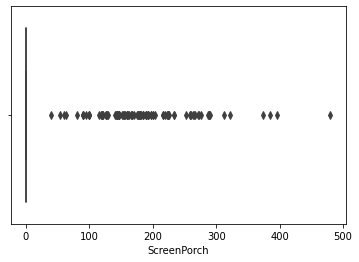

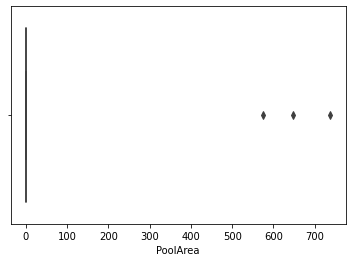

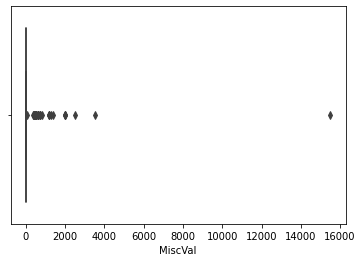

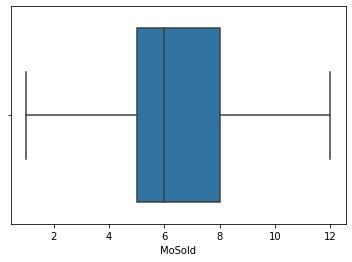

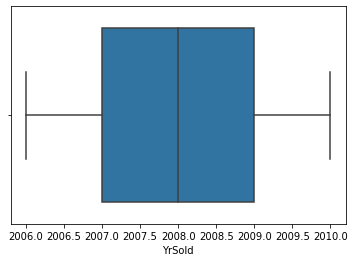

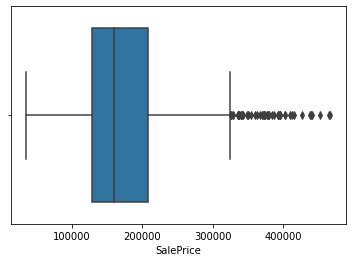

In [81]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : BsmtFinSF1 has 1 points above 1750 which we will drop

In [82]:
house = house[house.BsmtFinSF1<=1750]

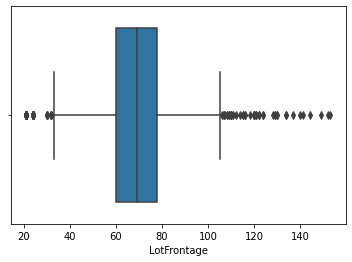

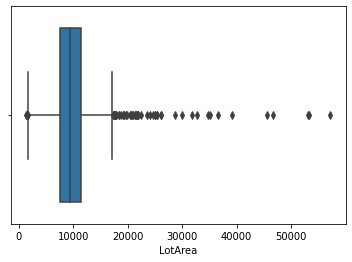

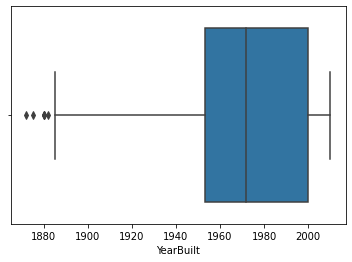

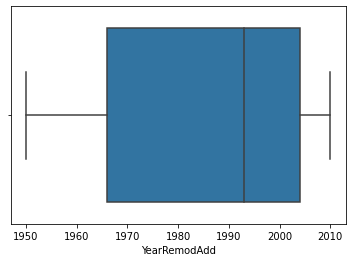

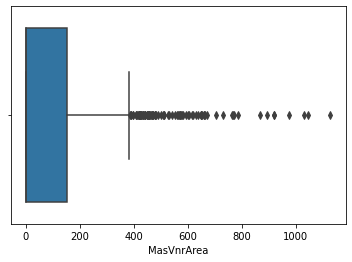

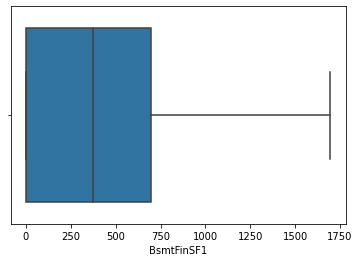

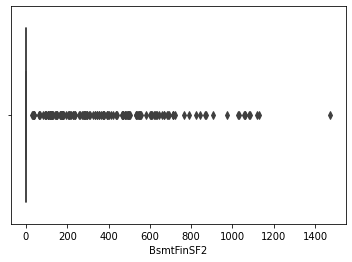

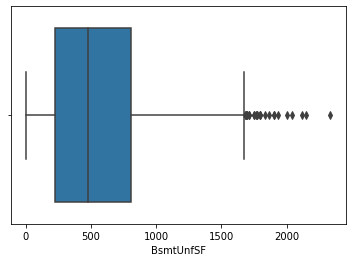

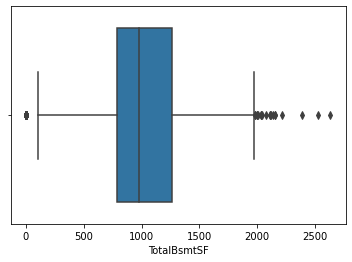

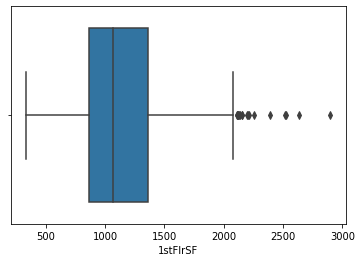

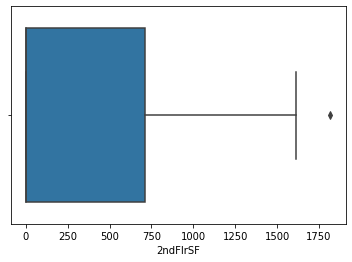

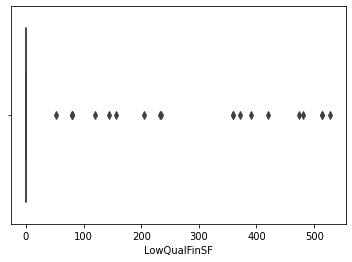

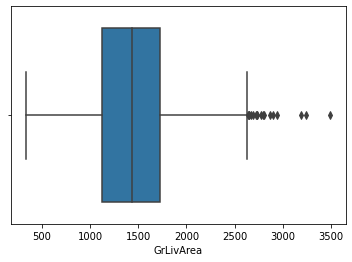

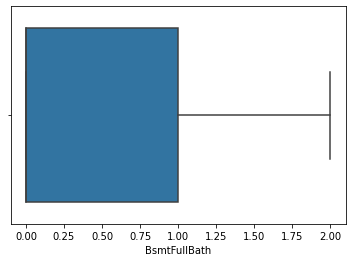

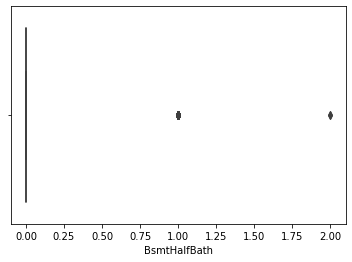

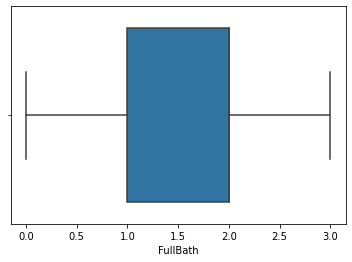

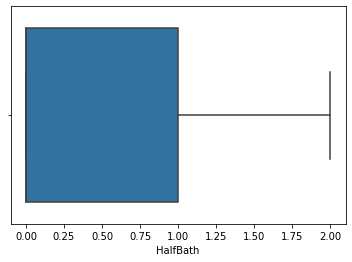

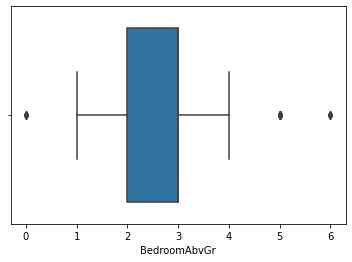

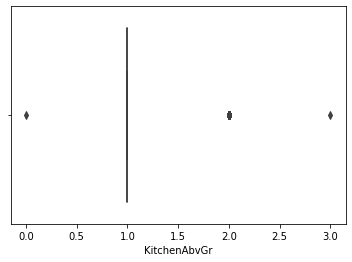

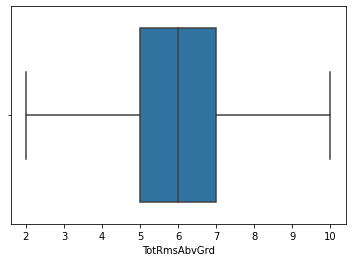

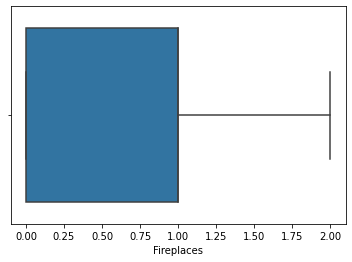

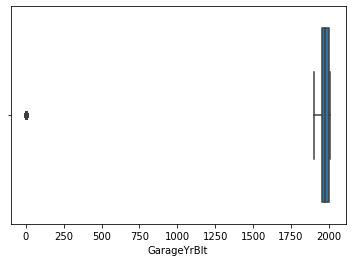

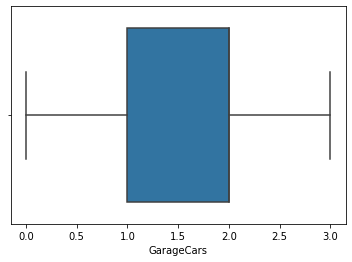

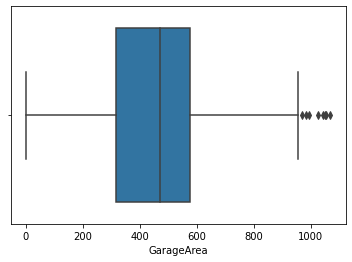

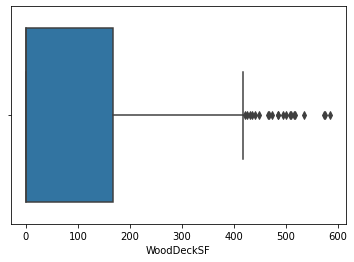

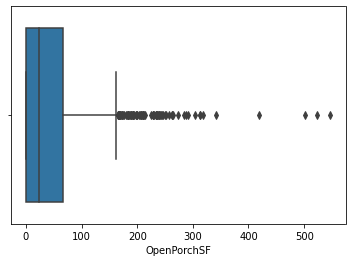

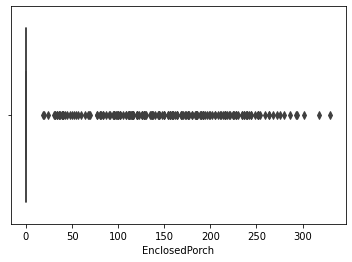

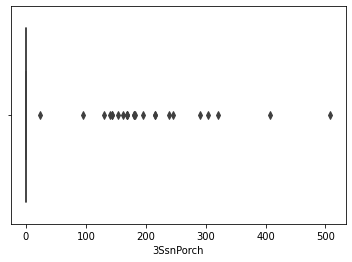

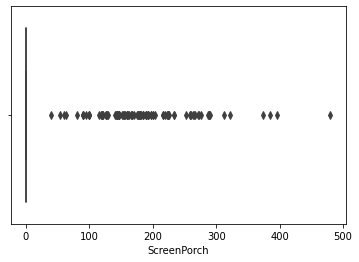

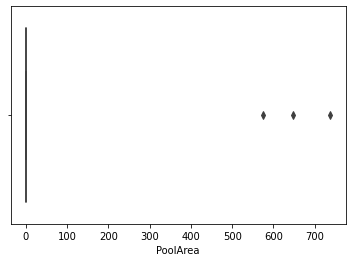

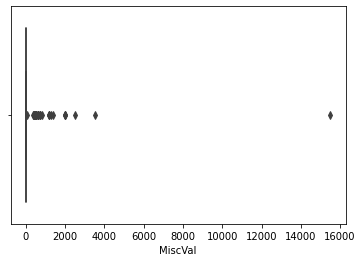

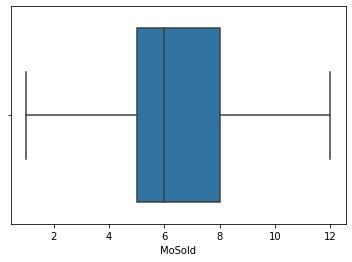

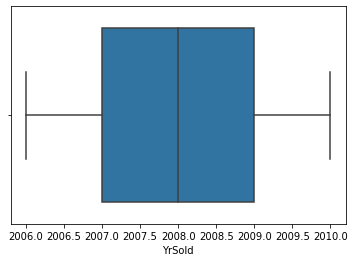

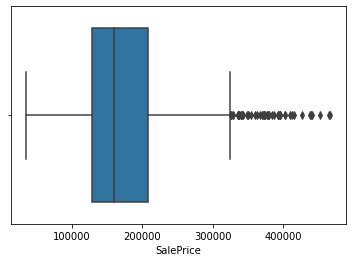

In [83]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : OpenPorchSF has 4 points above 400 which we will drop

In [84]:
house = house[house.OpenPorchSF<=400]

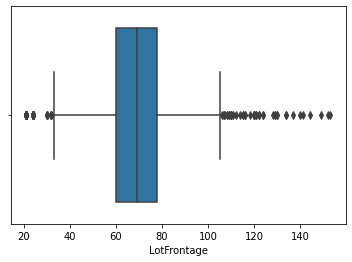

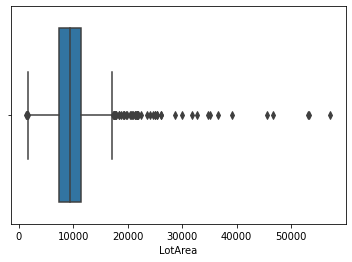

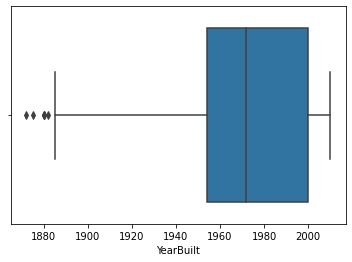

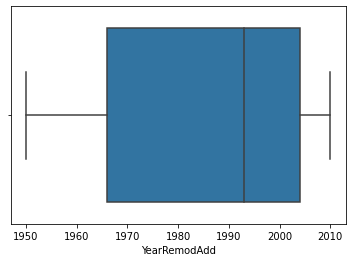

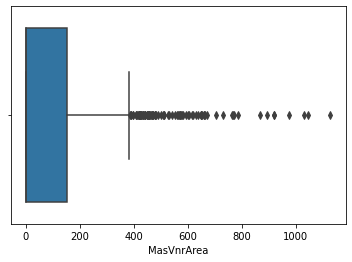

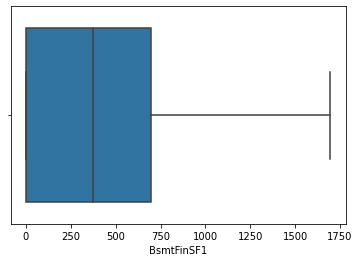

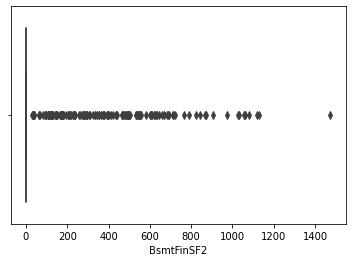

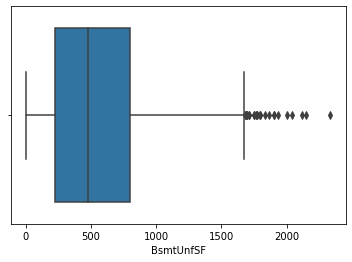

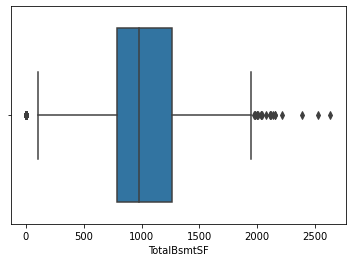

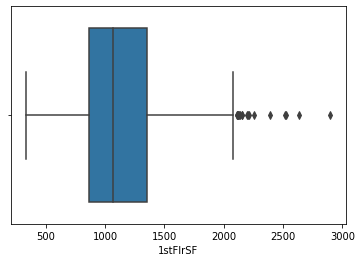

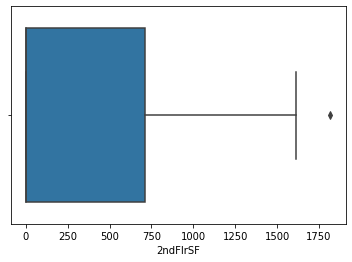

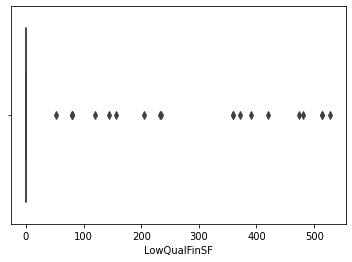

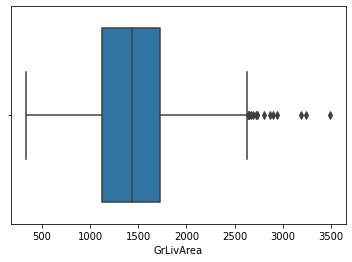

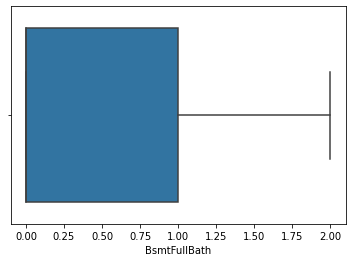

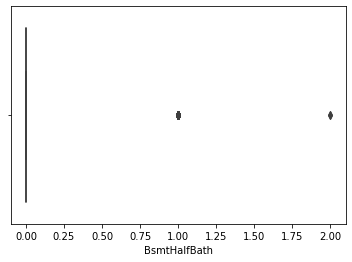

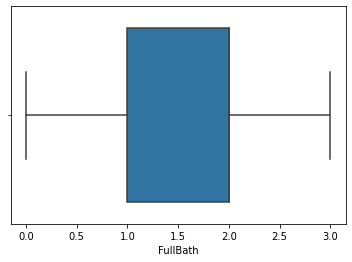

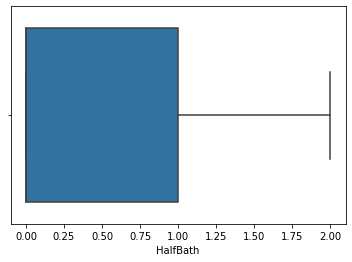

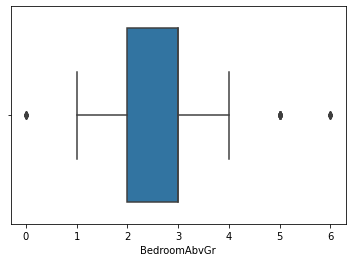

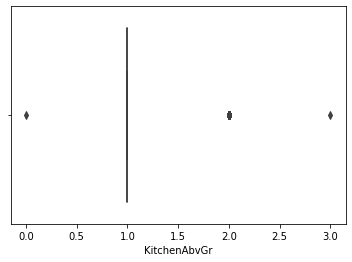

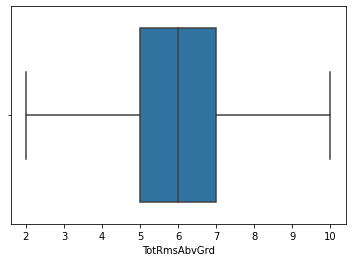

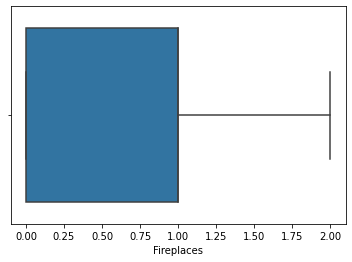

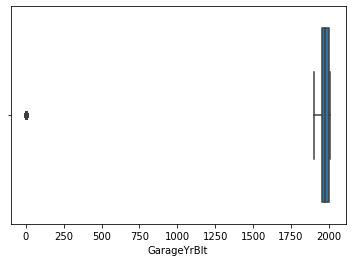

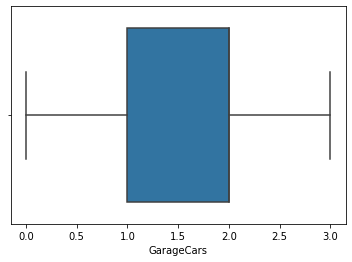

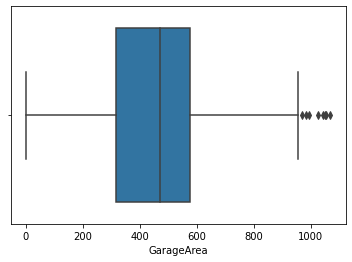

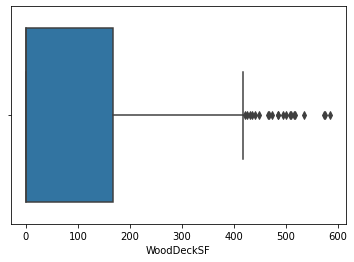

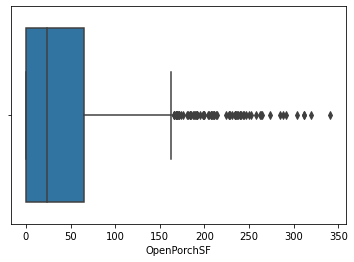

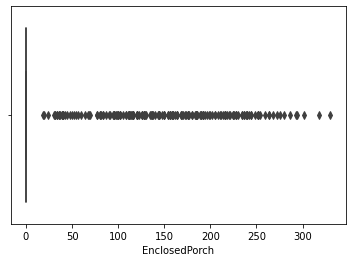

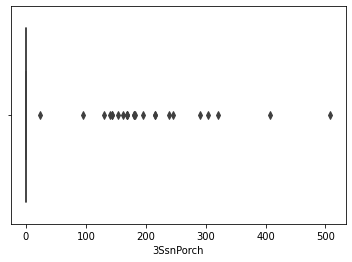

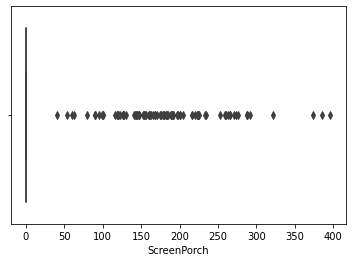

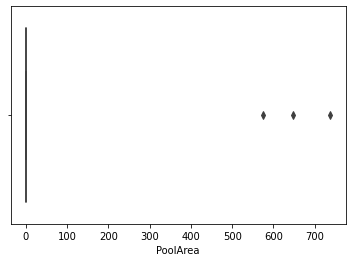

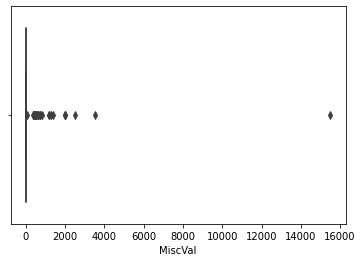

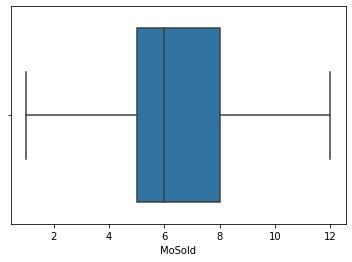

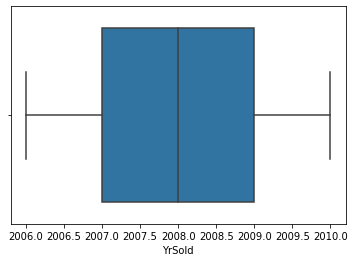

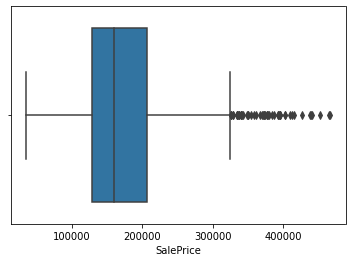

In [85]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : BsmtFinSF2 has 1 points above 1200 which we will drop<br>
<font color='blue'>**Observation**</font> : 2ndFlrSF has 1 points above 1750 which we will drop

In [86]:
house = house[house.BsmtFinSF2<=1200]
house = house[house["2ndFlrSF"]<=1750]

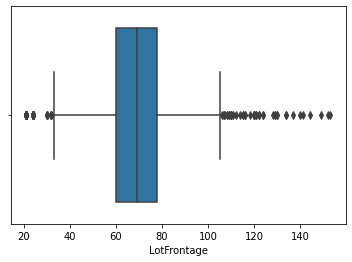

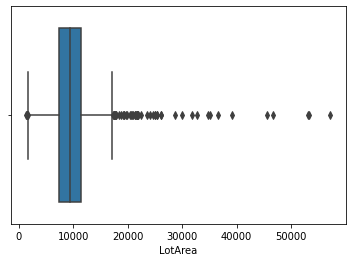

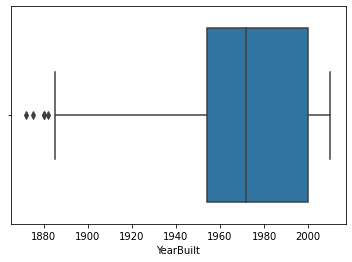

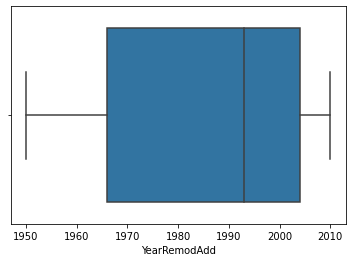

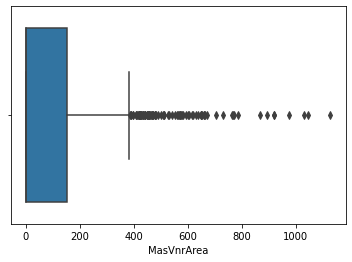

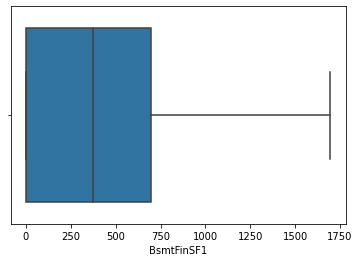

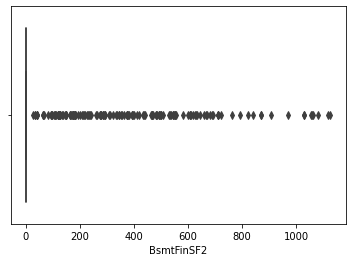

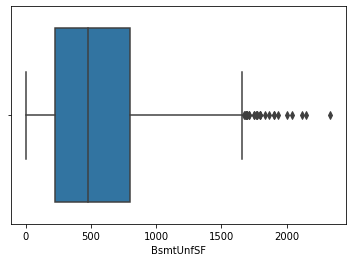

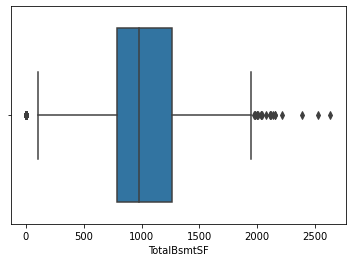

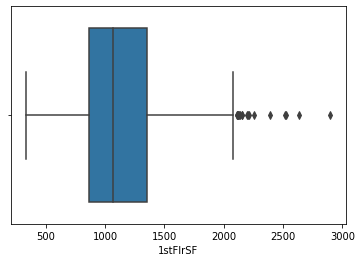

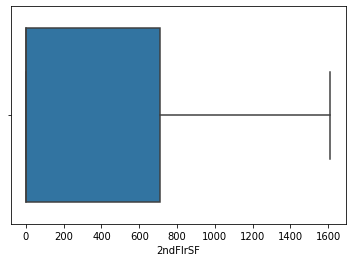

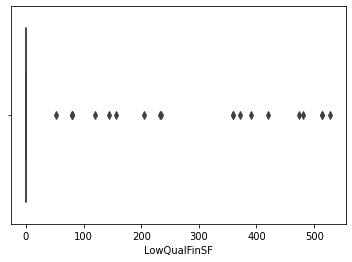

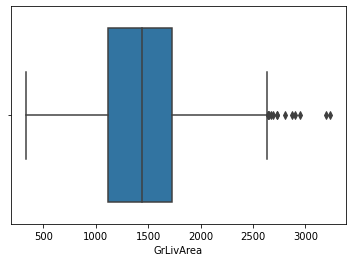

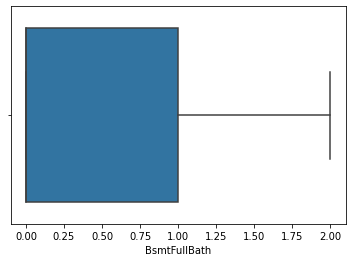

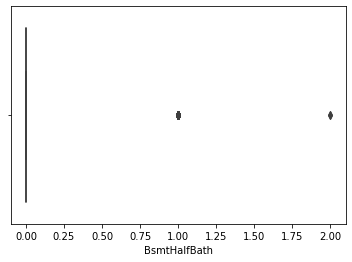

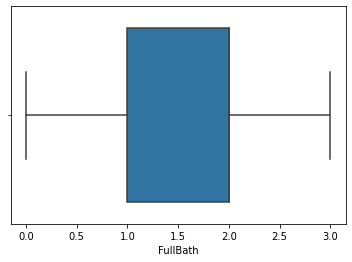

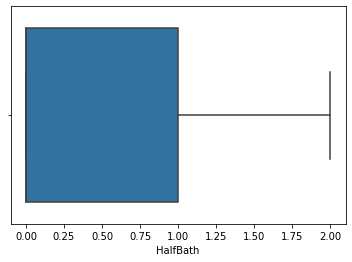

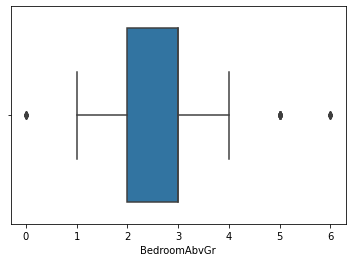

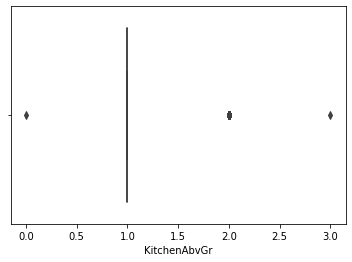

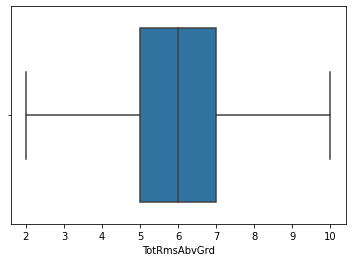

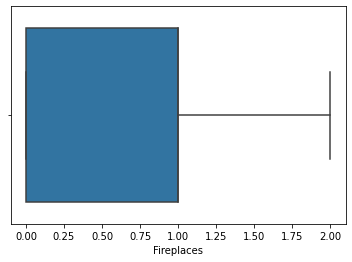

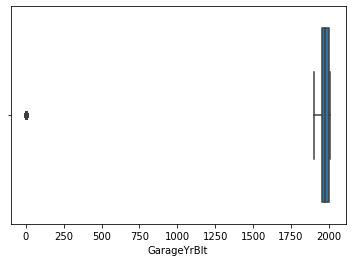

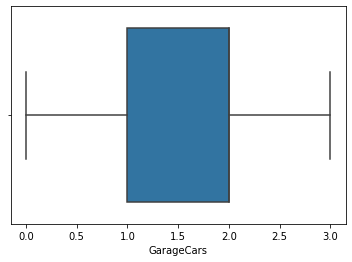

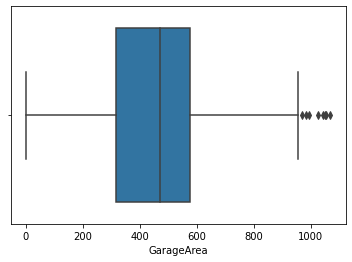

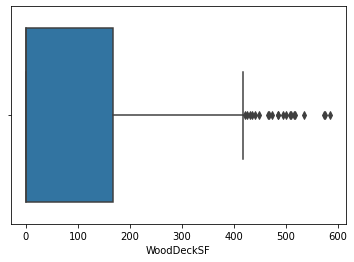

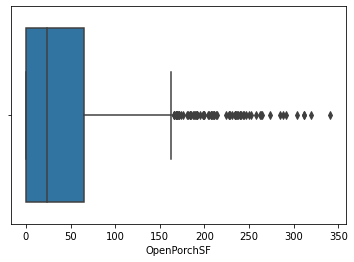

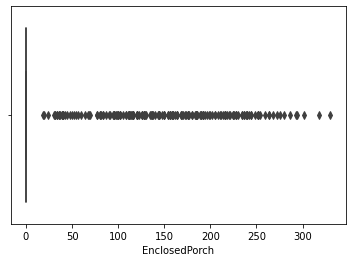

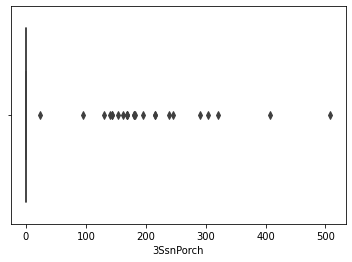

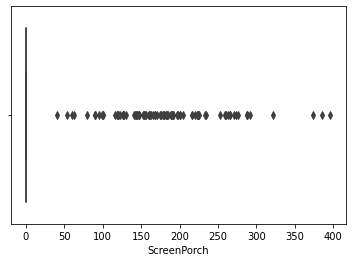

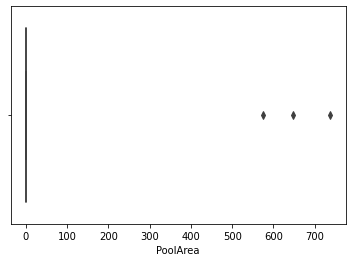

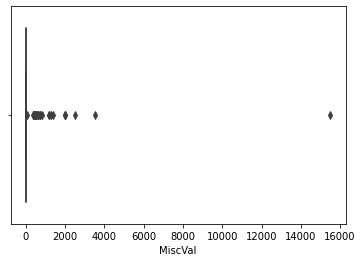

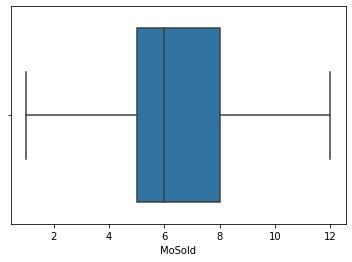

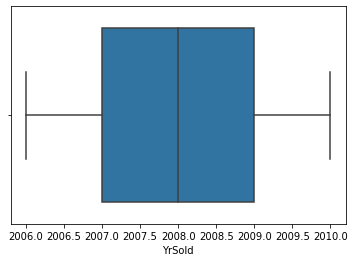

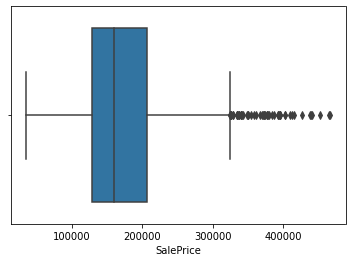

In [87]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : 1stFlrSF has 5 points above 2300 which we will drop<br>

In [88]:
house = house[house["1stFlrSF"]<=2300]

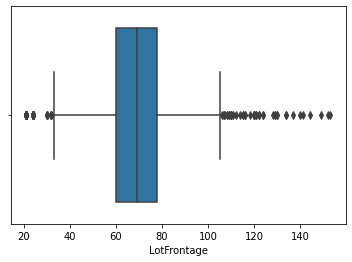

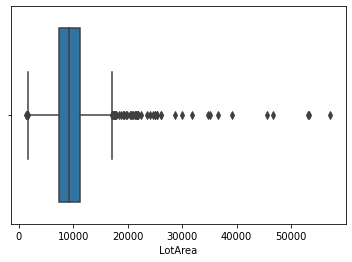

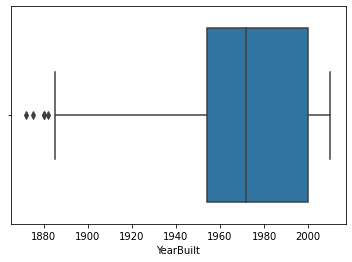

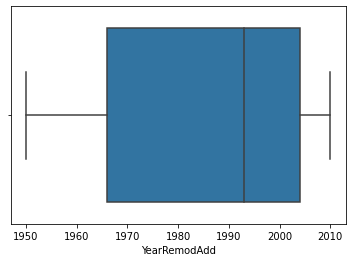

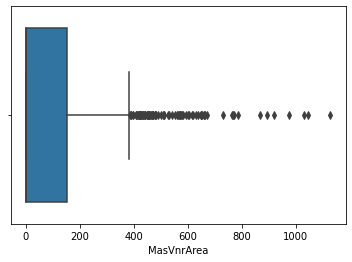

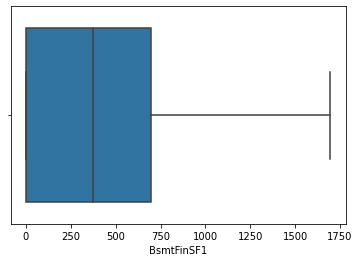

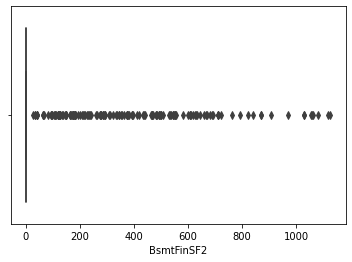

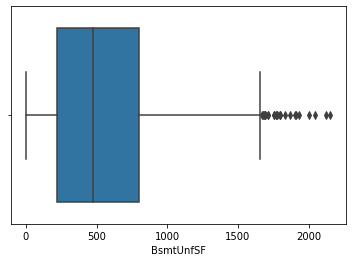

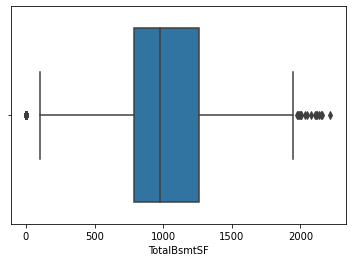

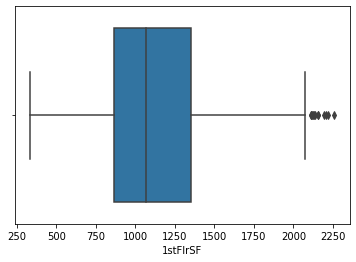

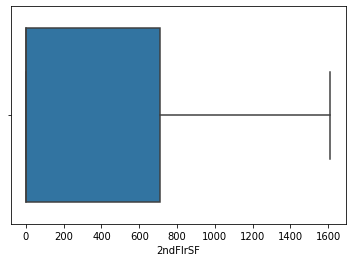

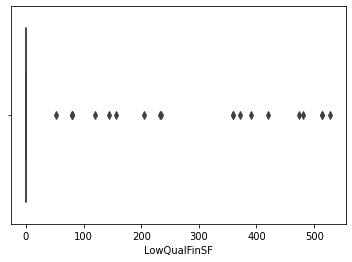

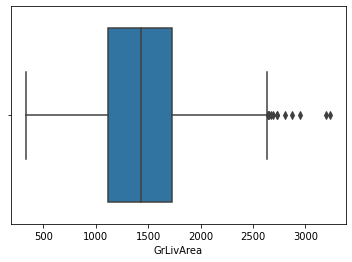

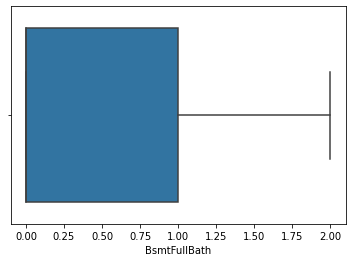

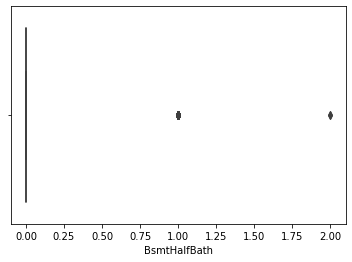

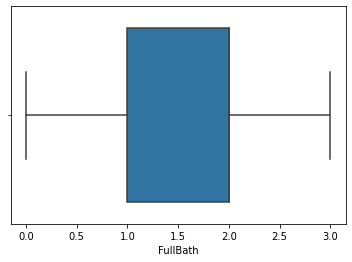

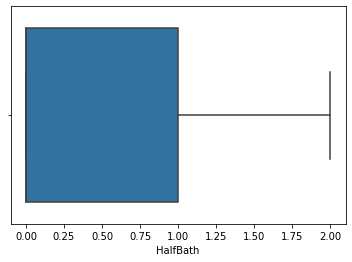

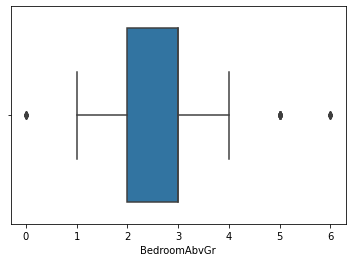

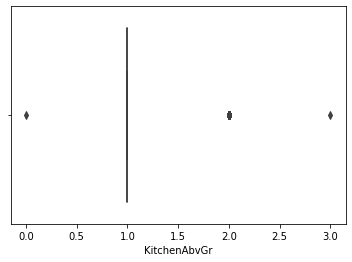

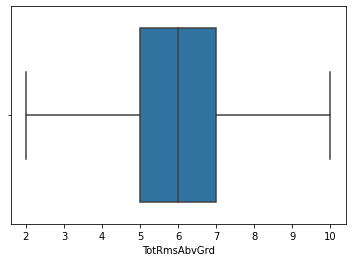

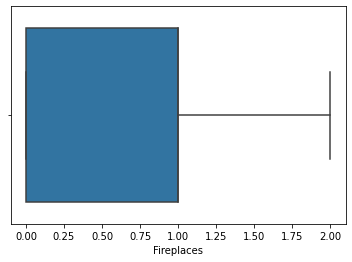

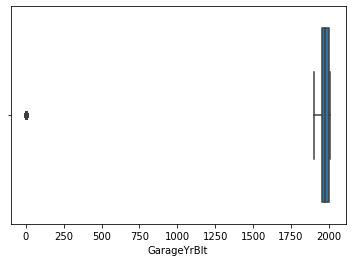

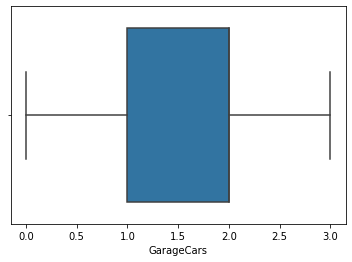

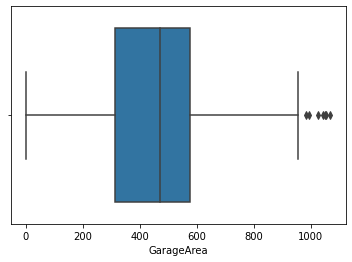

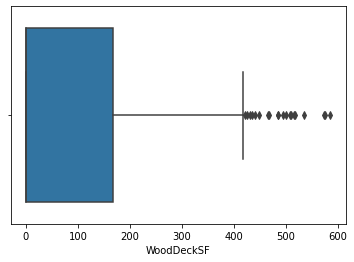

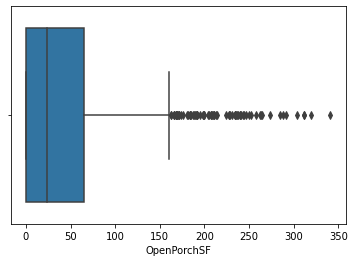

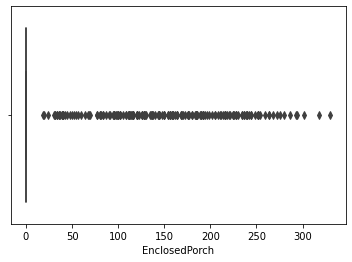

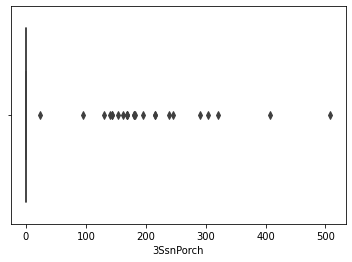

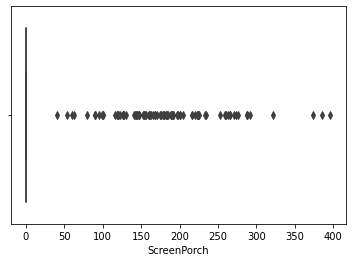

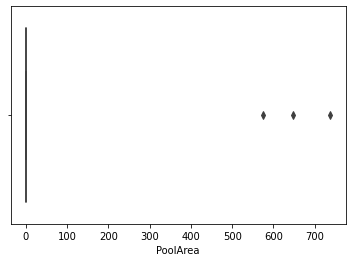

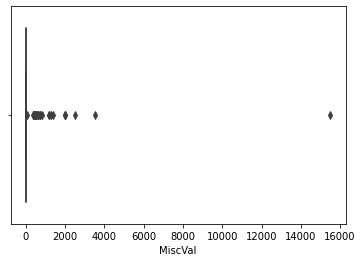

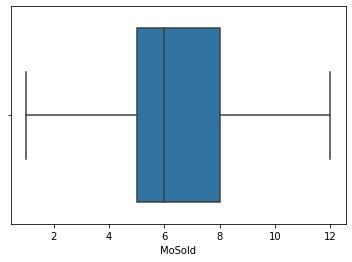

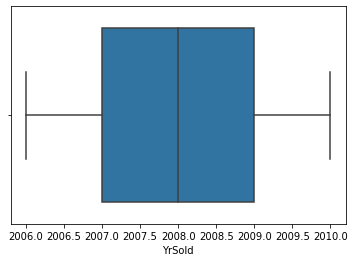

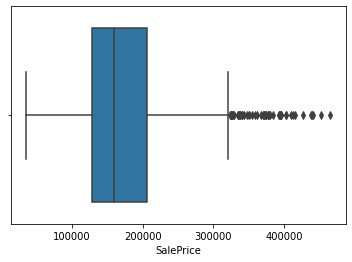

In [89]:
for column_name in numerical_columns:
    box_plot(house[column_name])

<font color='blue'>**Observation**</font> : GrLivArea has 2 points above 3000 which we will drop<br>

In [90]:
house = house[house["GrLivArea"]<=3000]

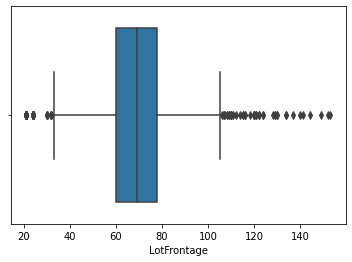

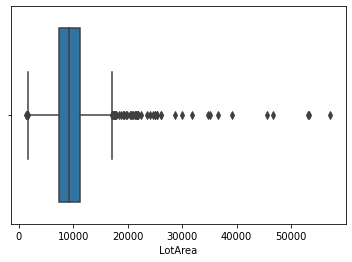

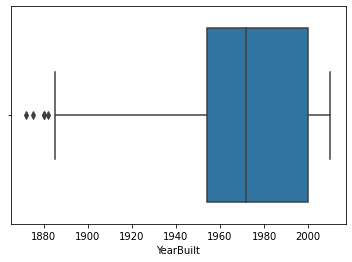

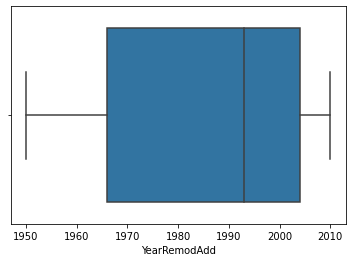

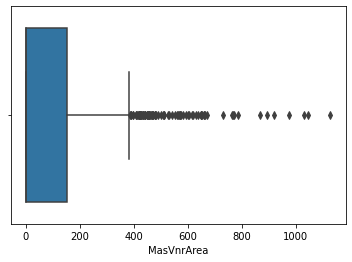

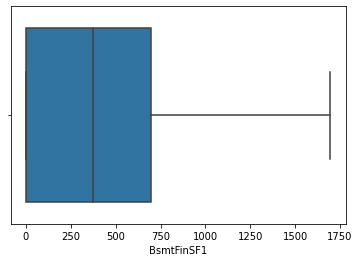

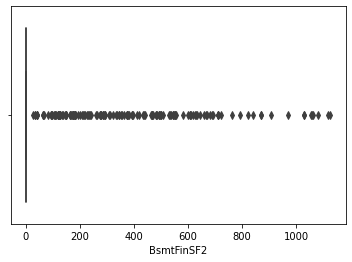

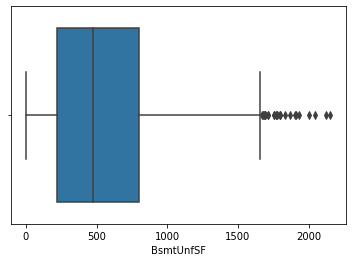

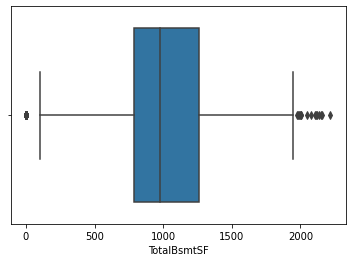

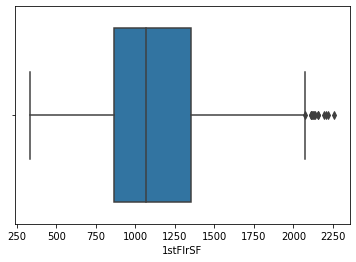

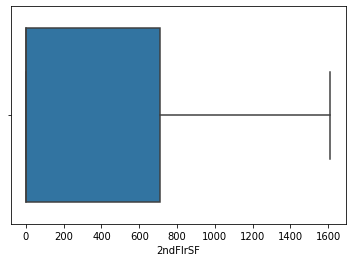

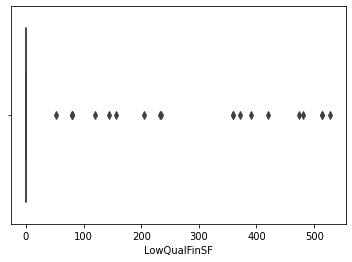

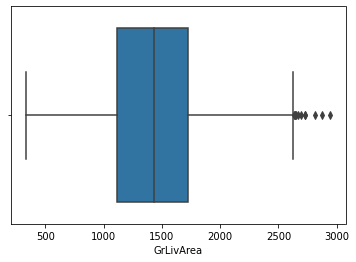

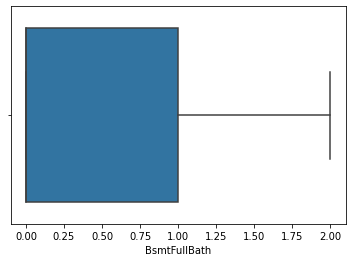

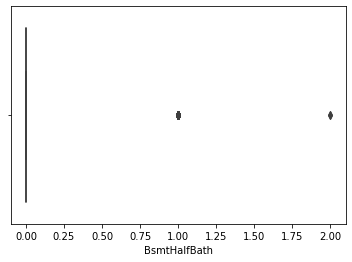

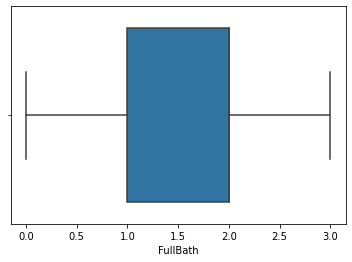

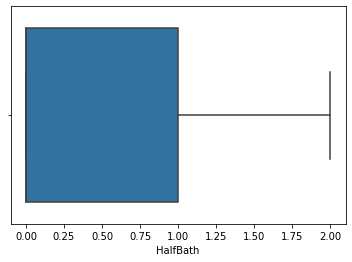

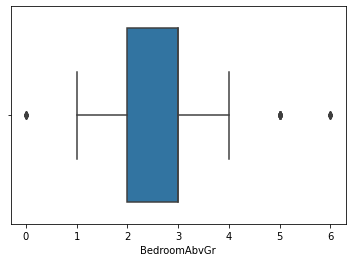

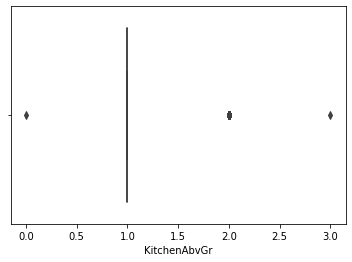

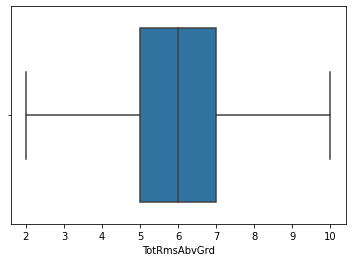

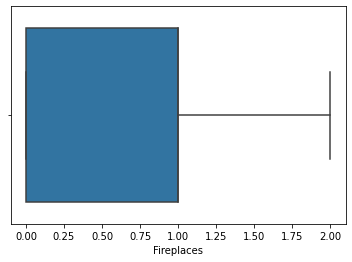

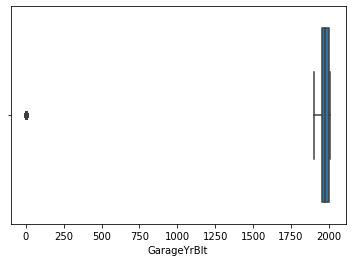

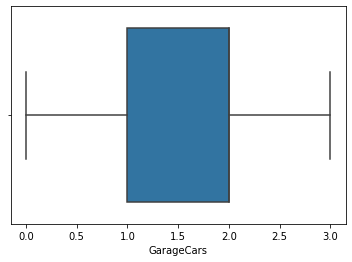

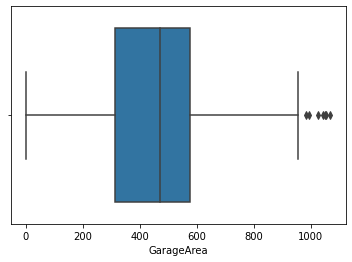

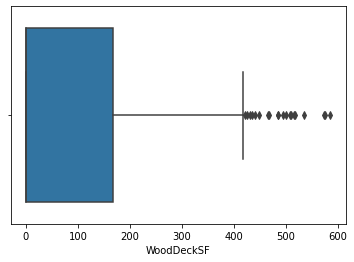

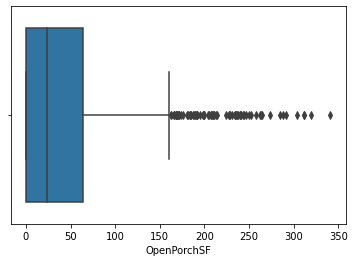

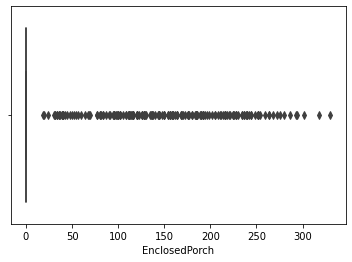

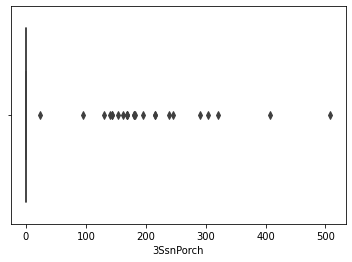

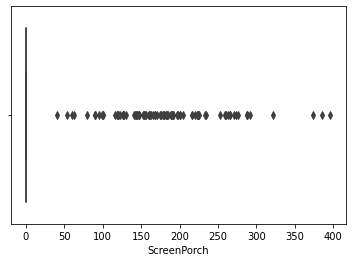

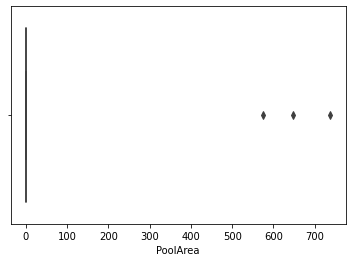

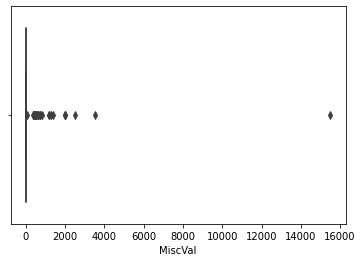

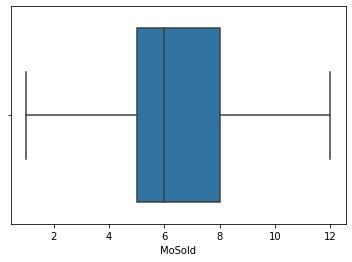

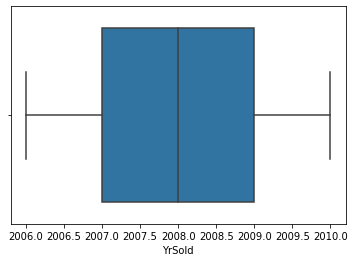

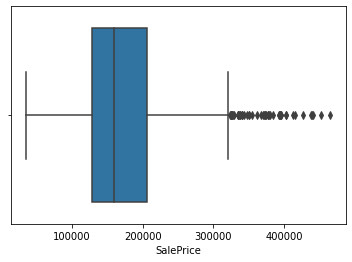

In [91]:
for column_name in numerical_columns:
    box_plot(house[column_name])

#### Using Categorical variables

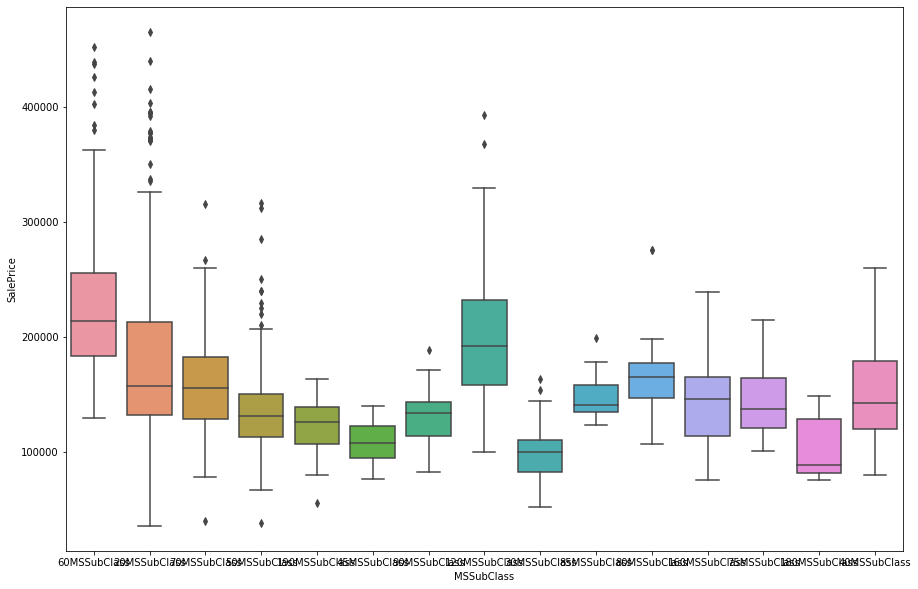

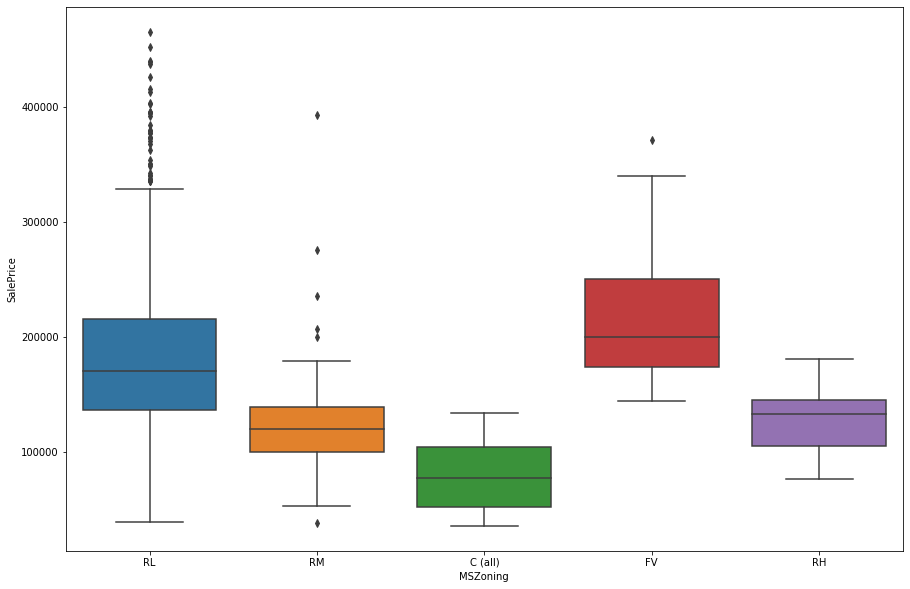

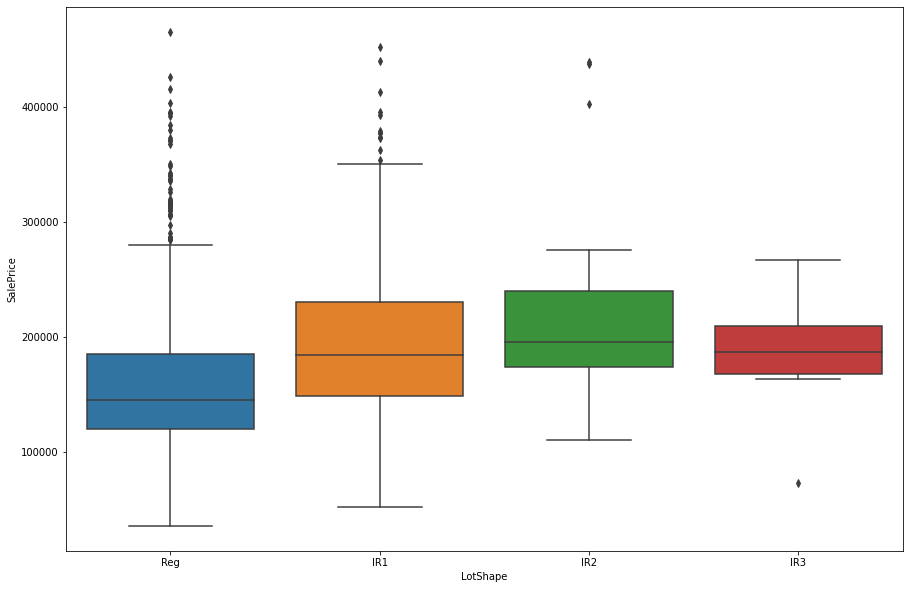

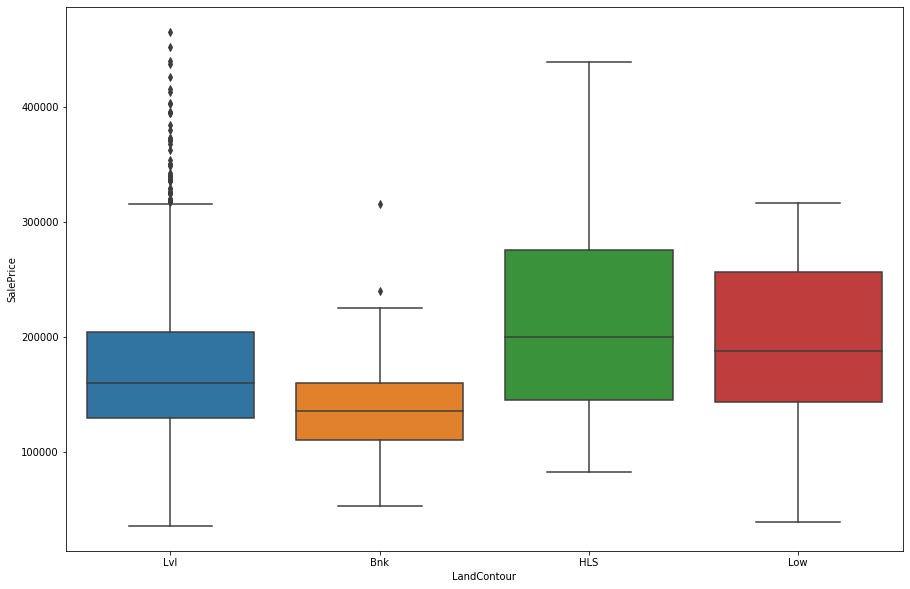

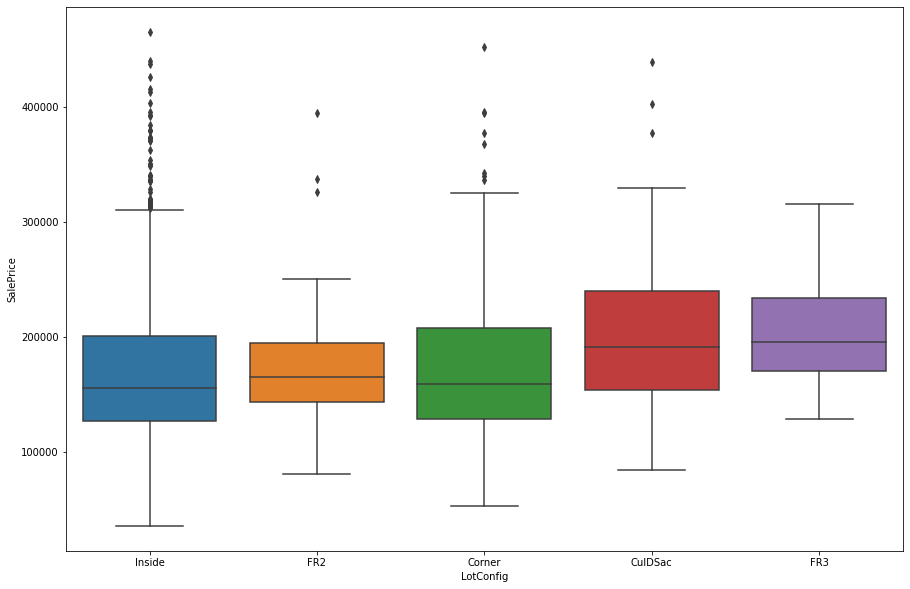

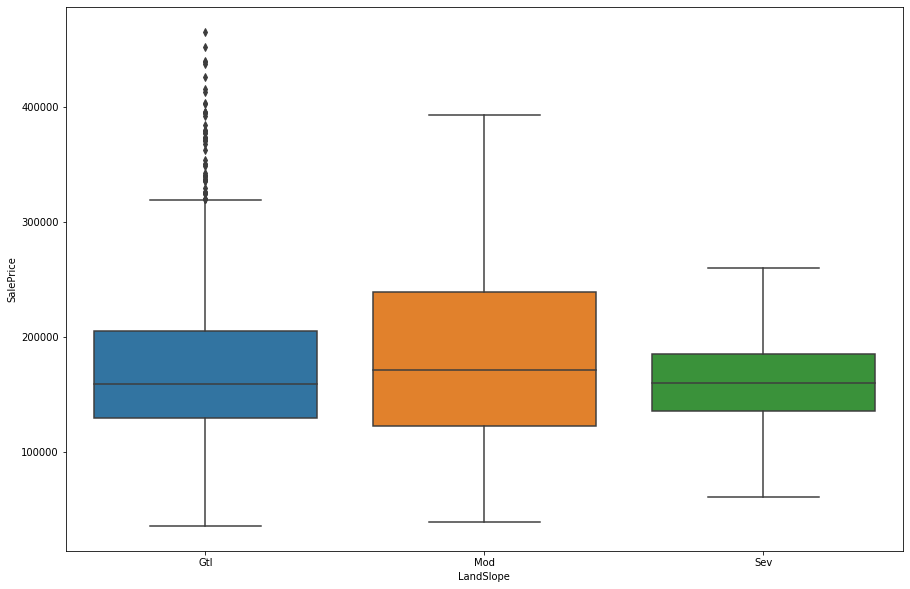

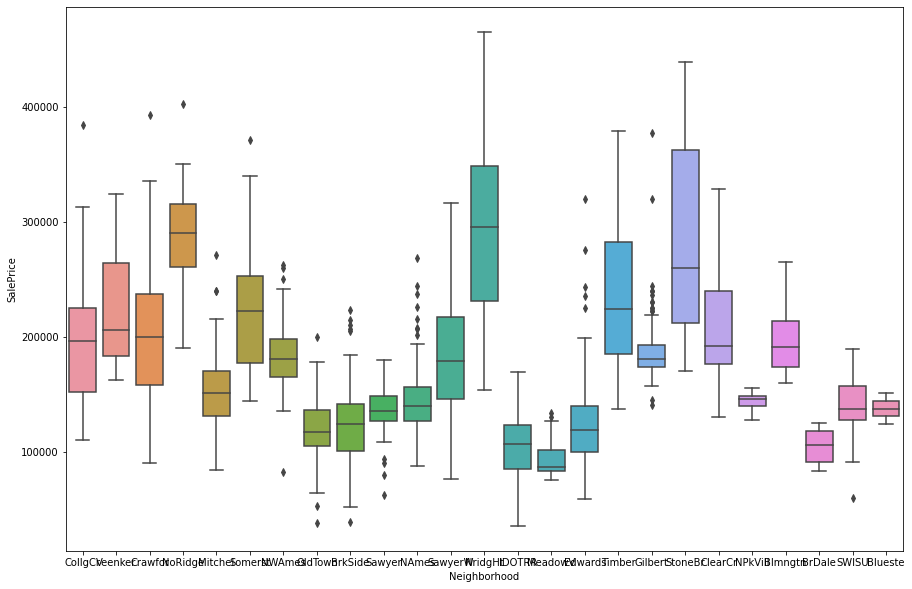

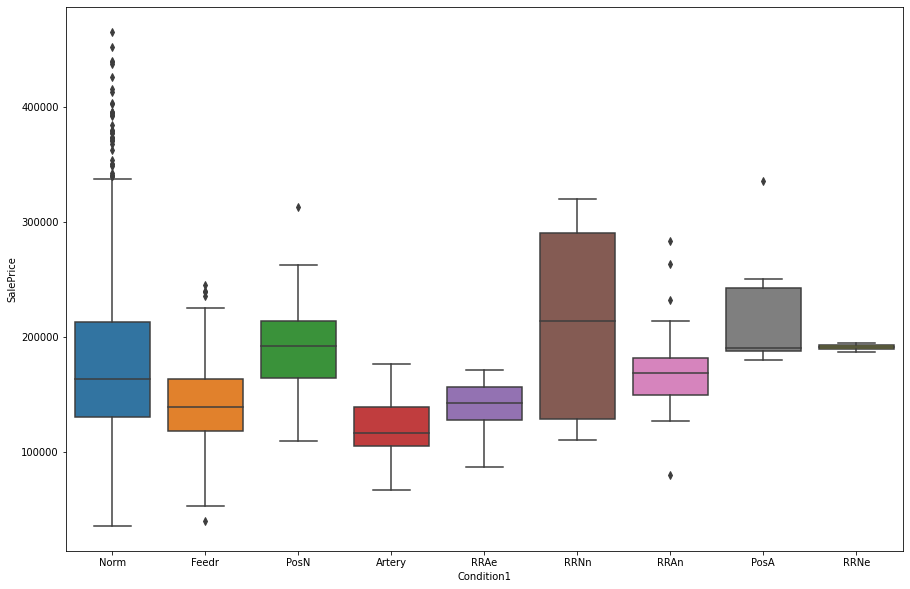

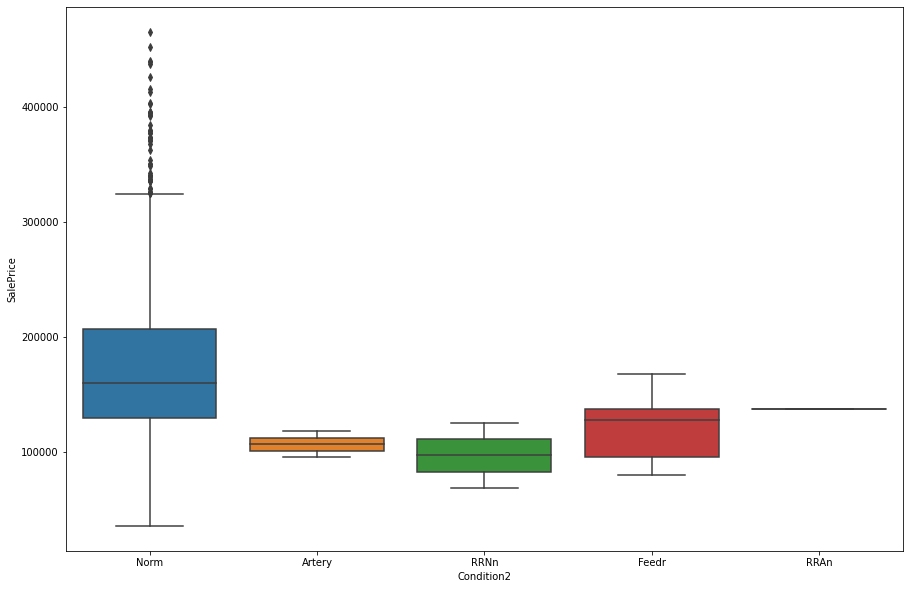

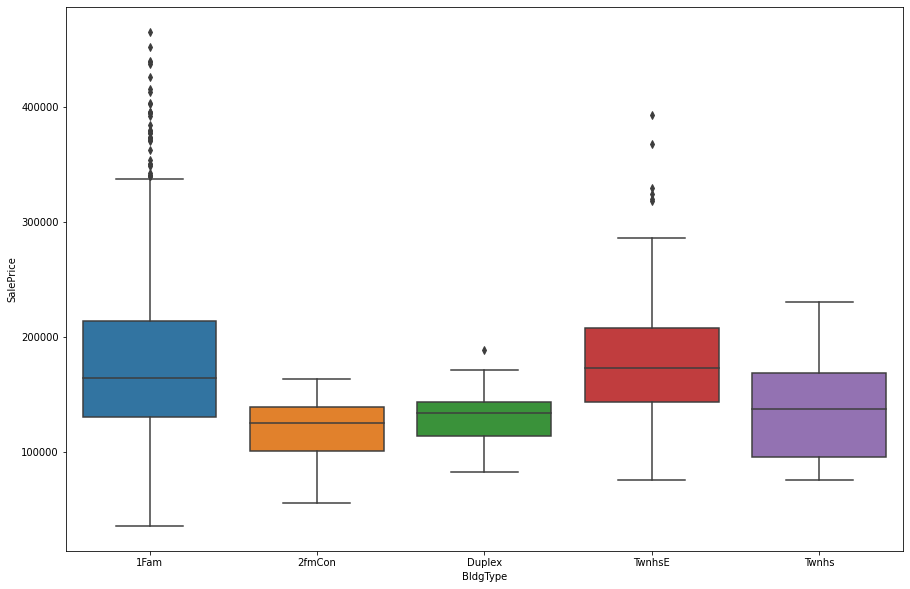

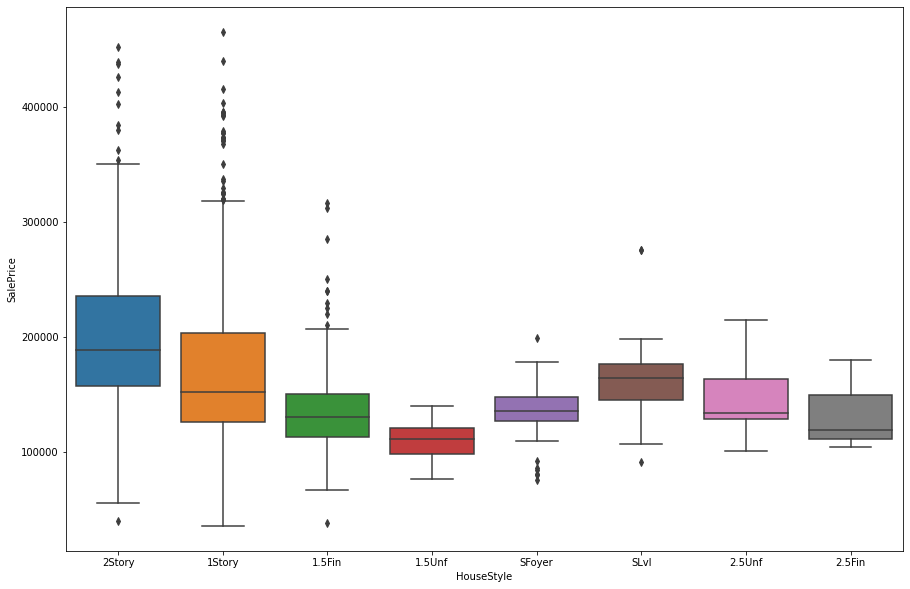

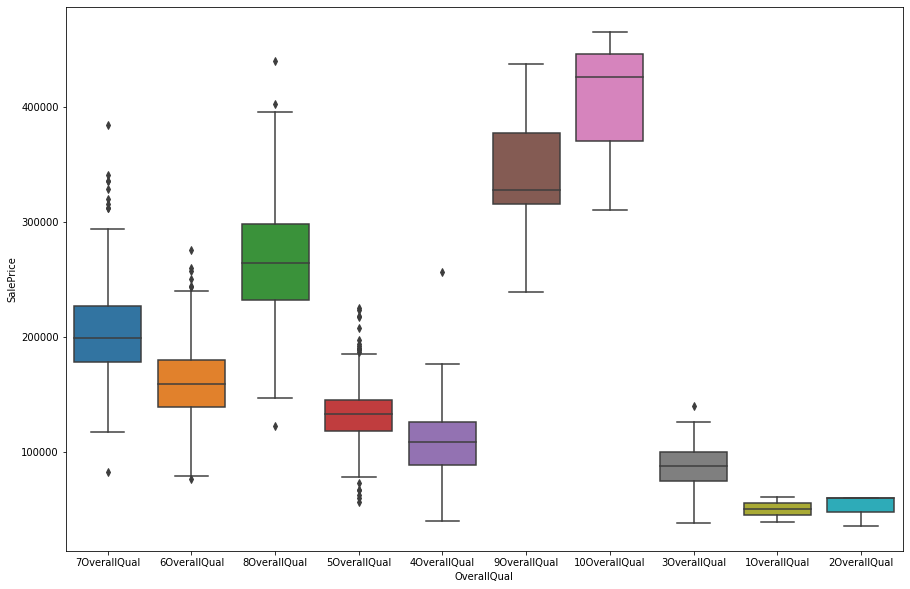

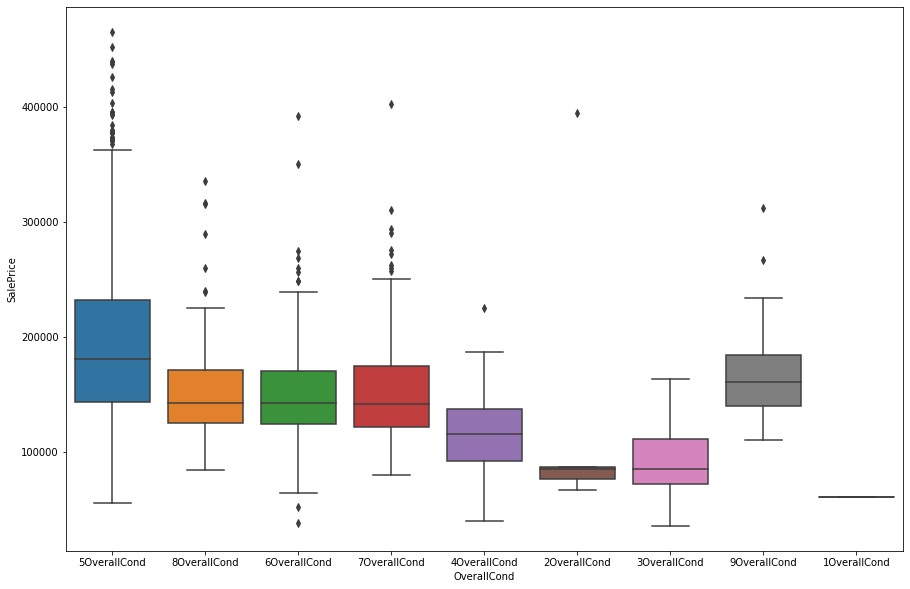

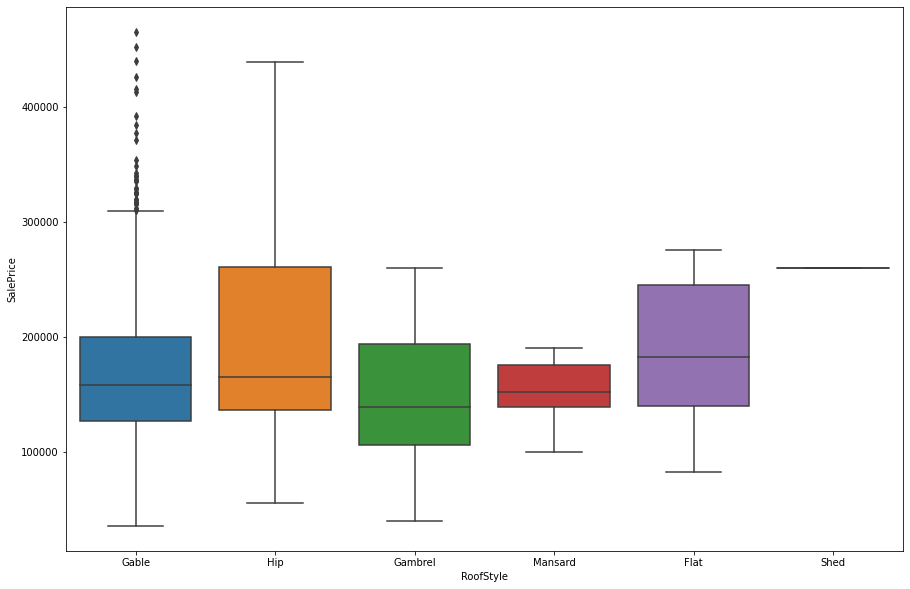

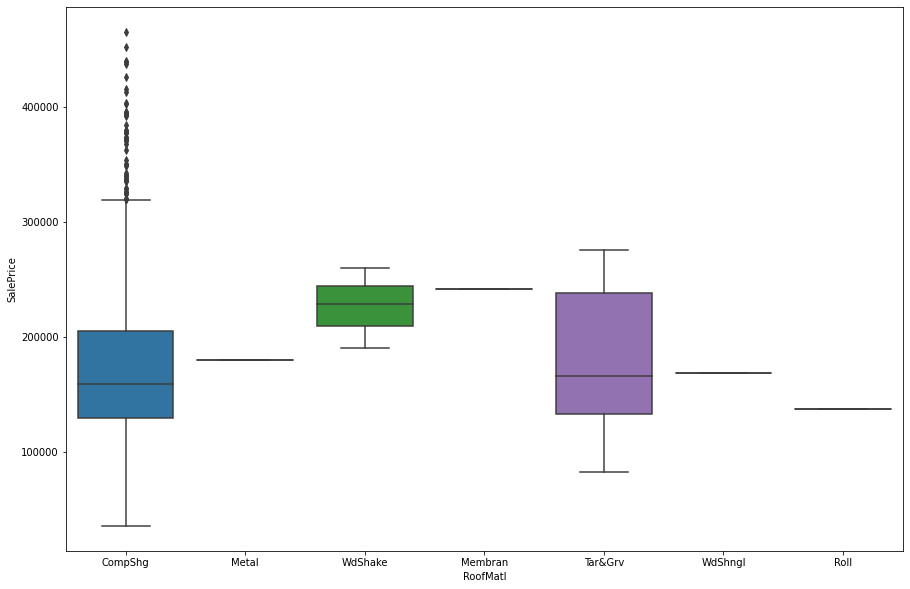

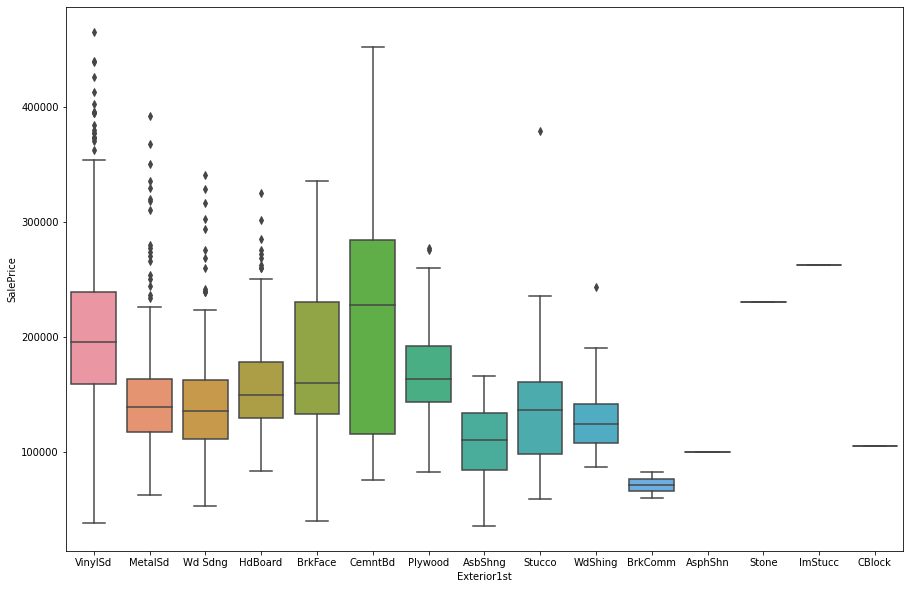

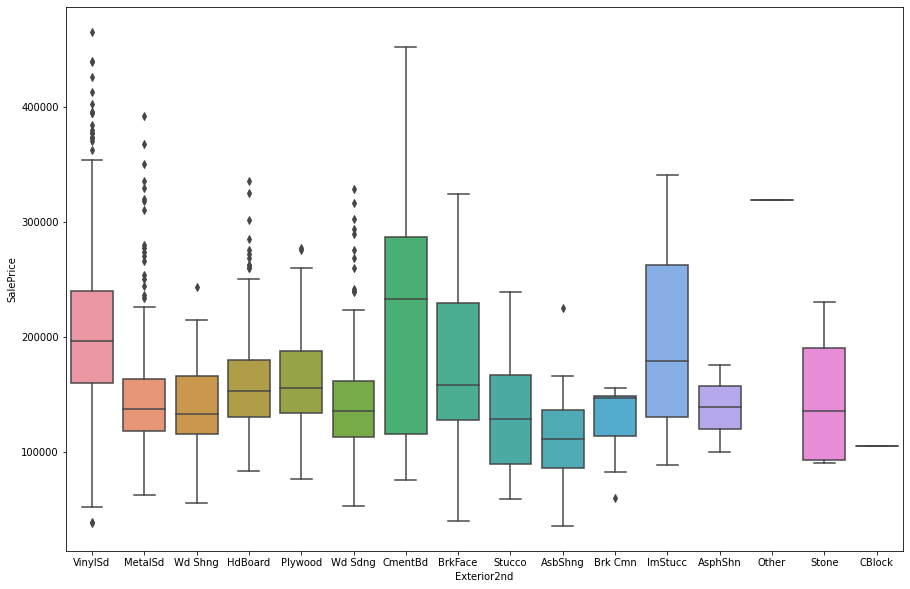

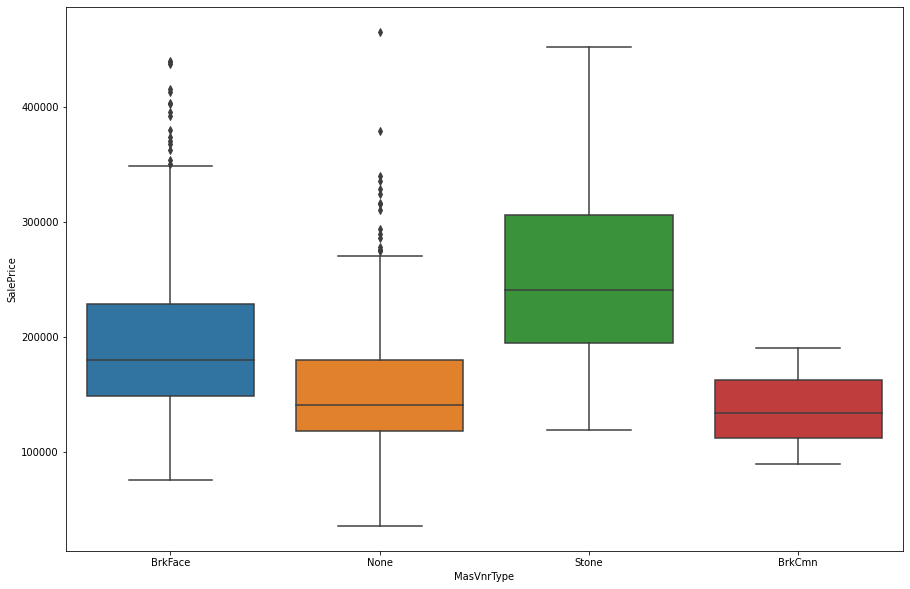

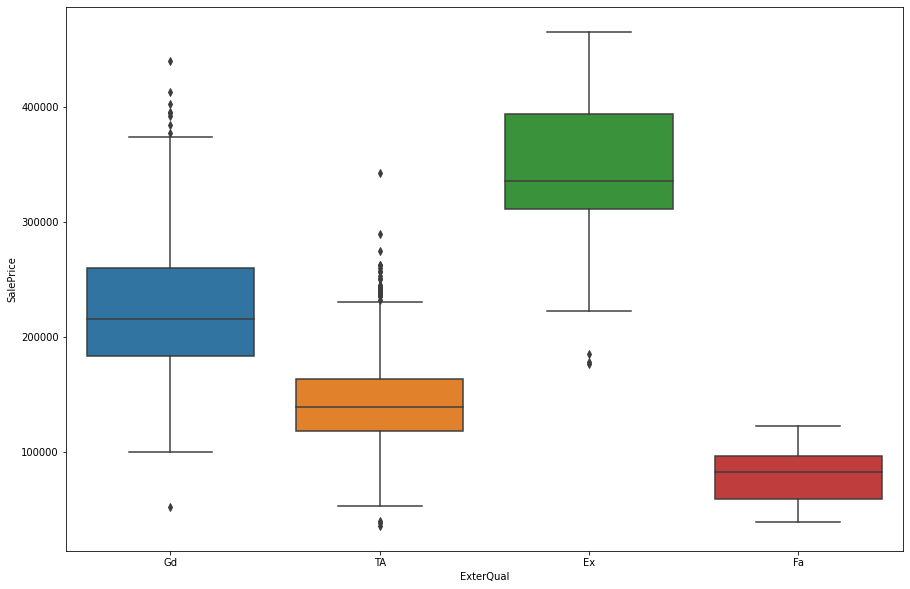

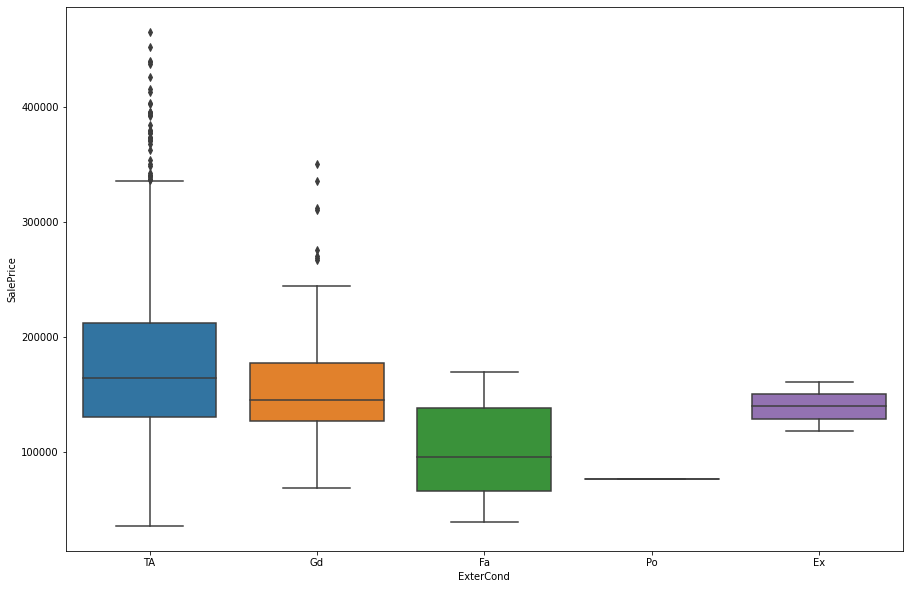

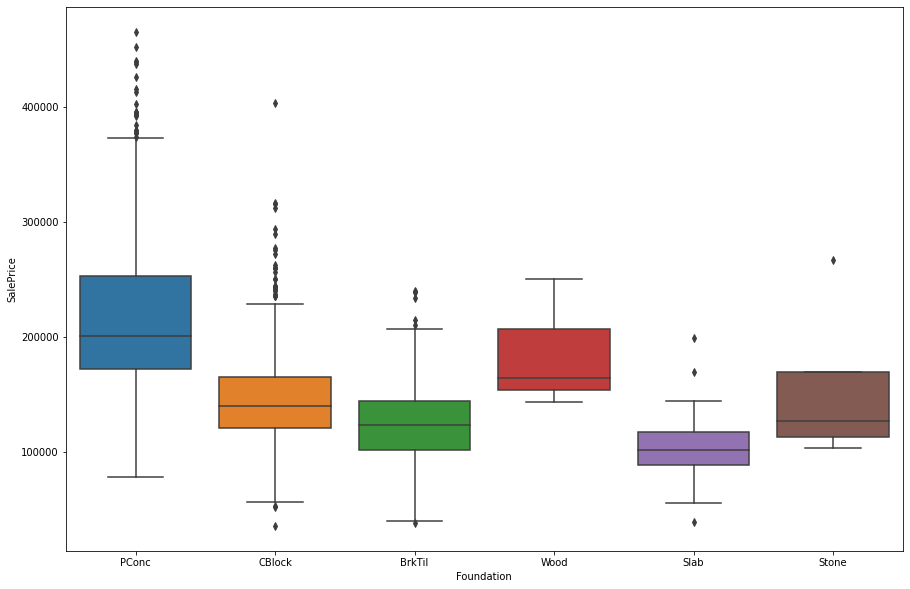

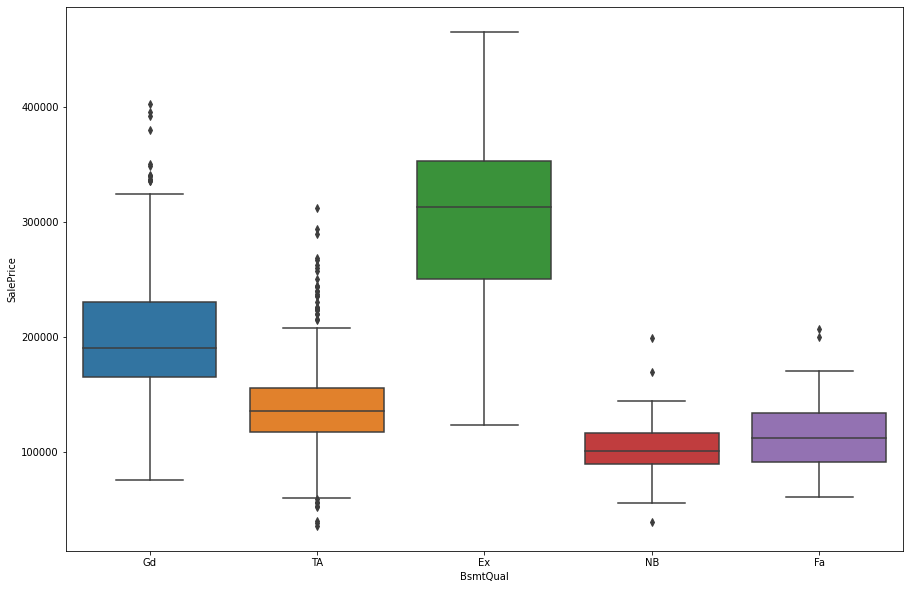

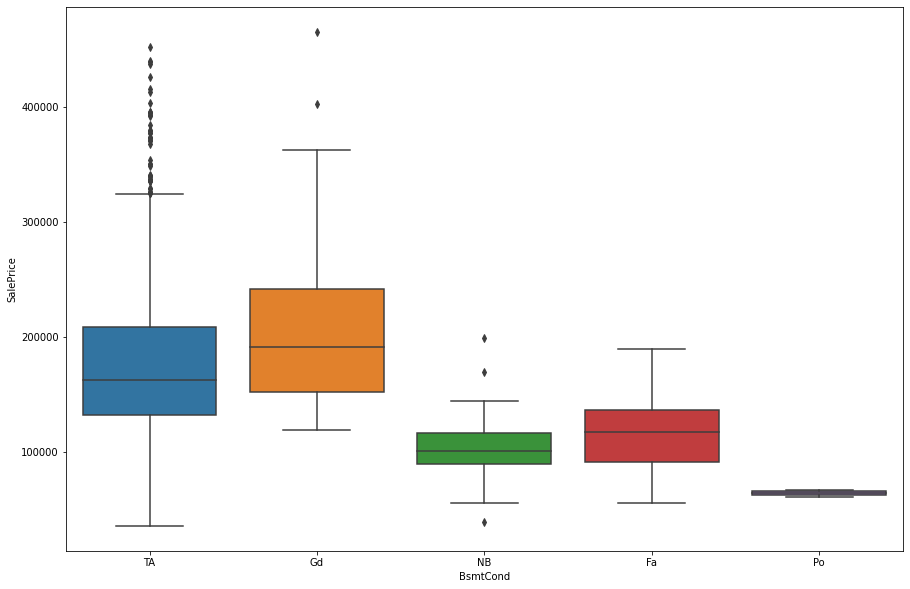

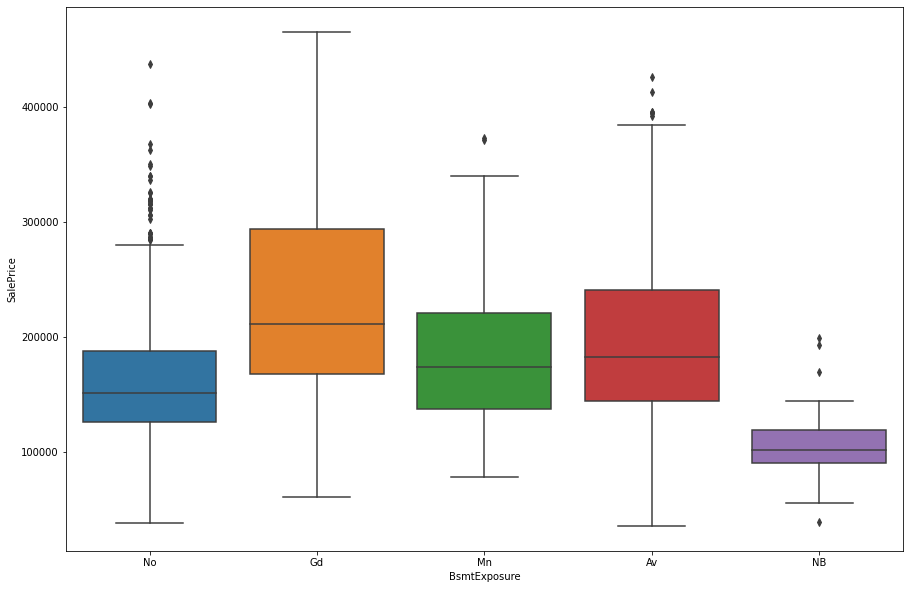

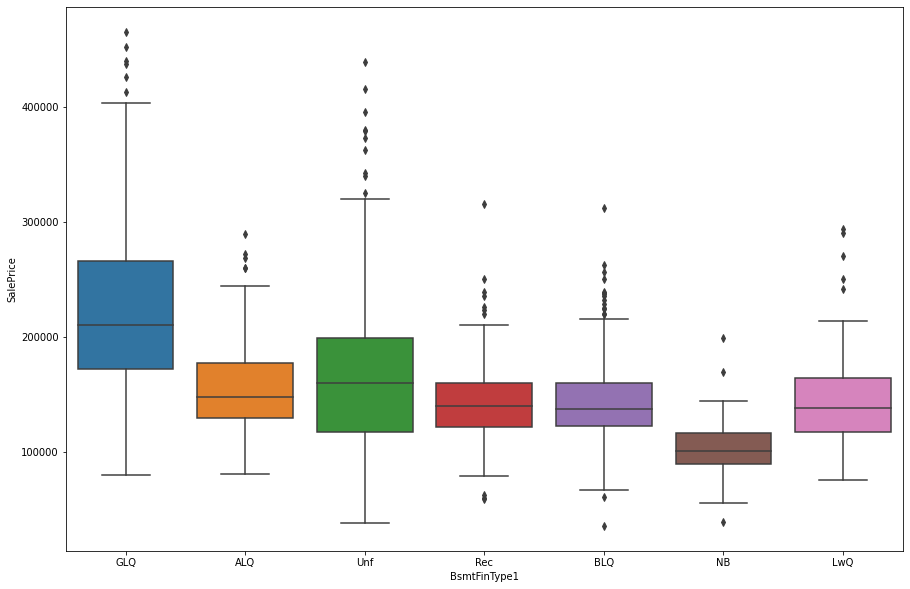

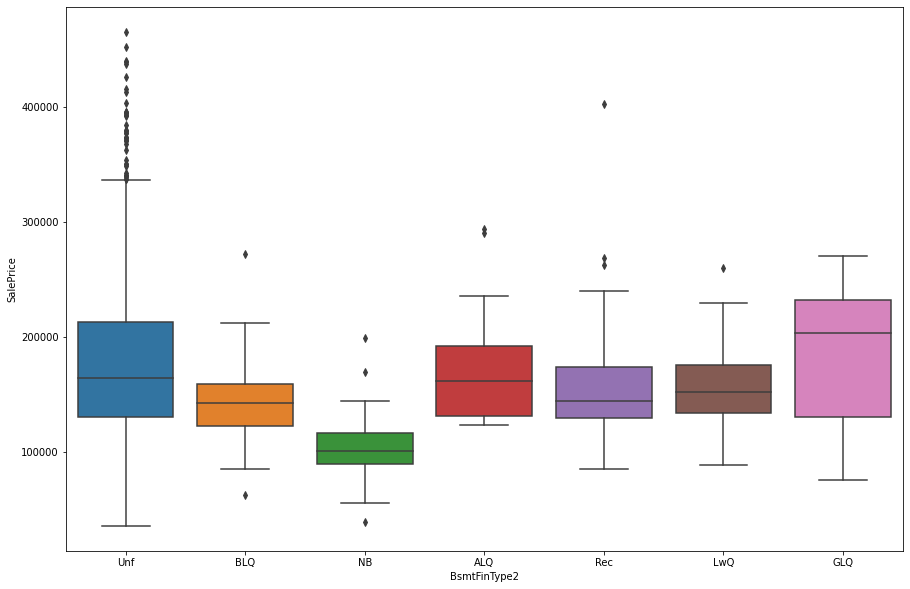

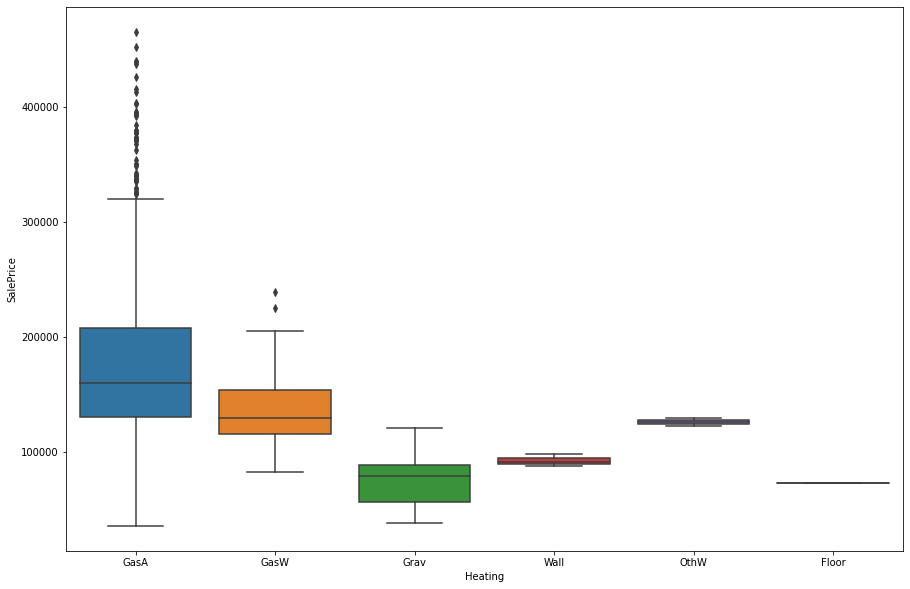

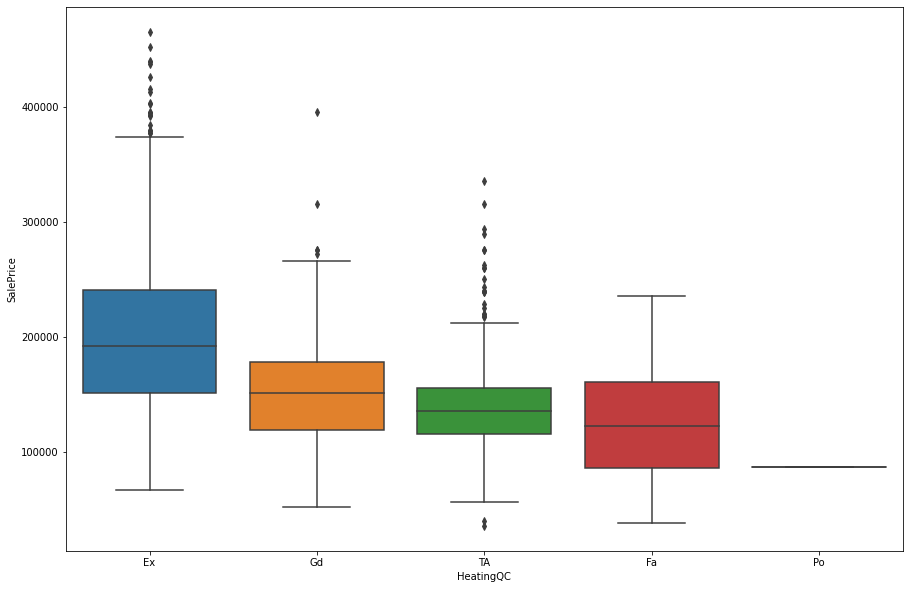

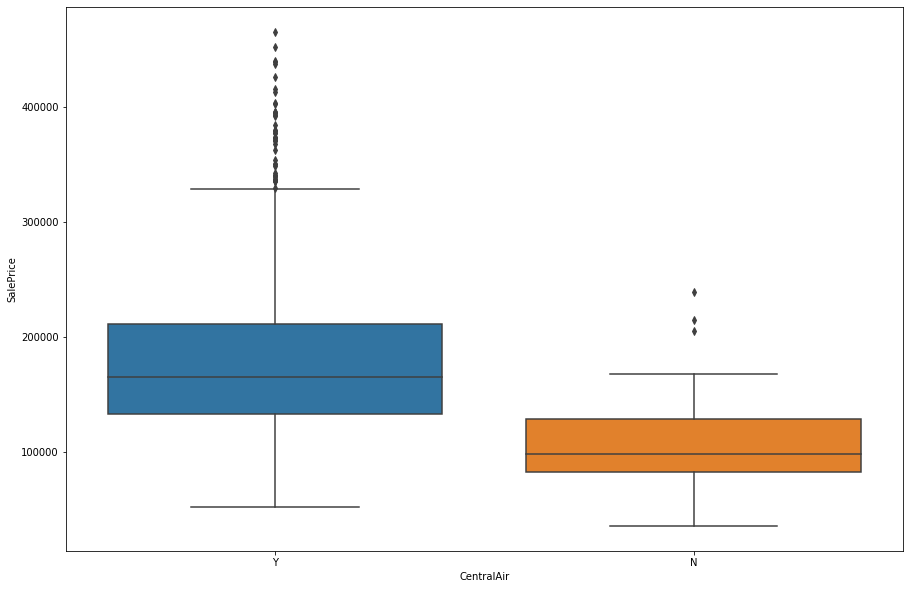

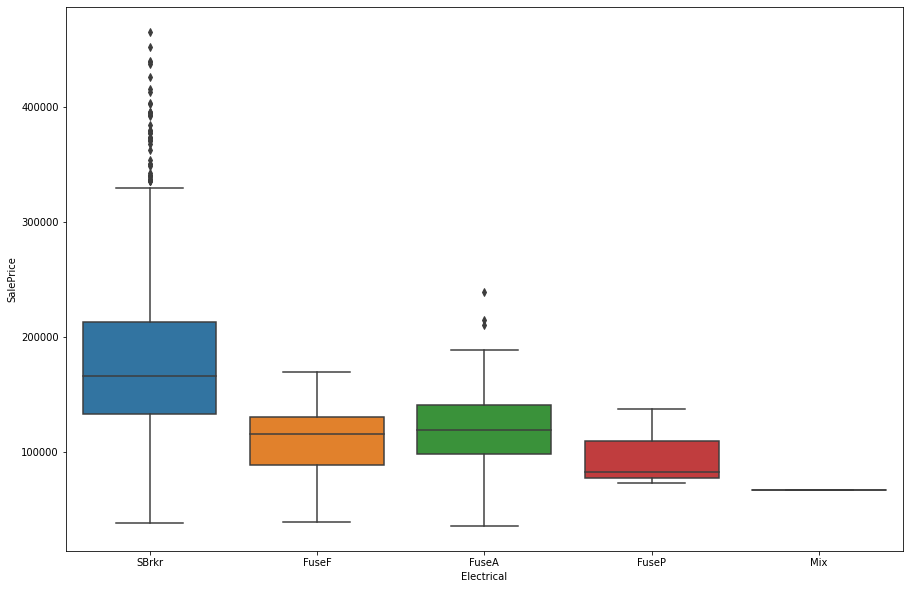

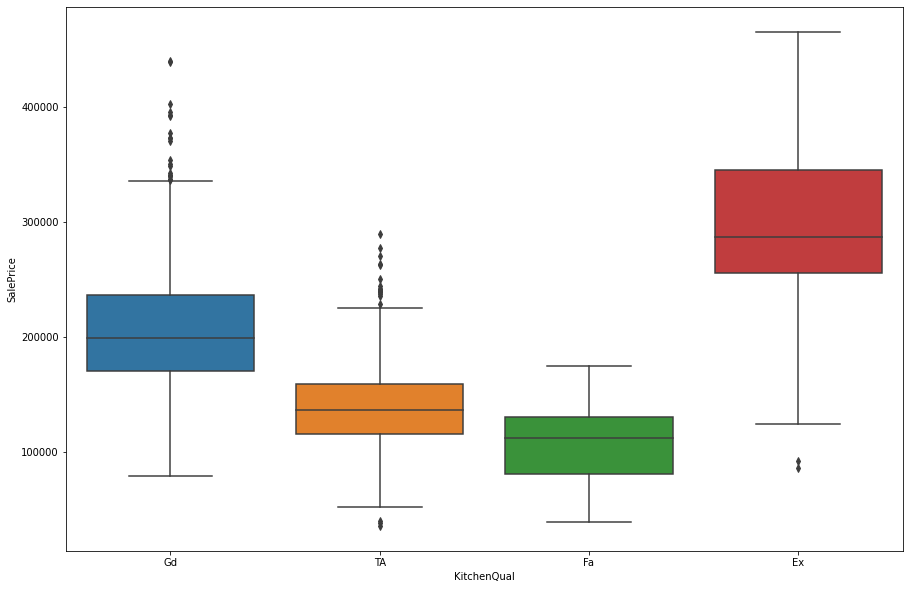

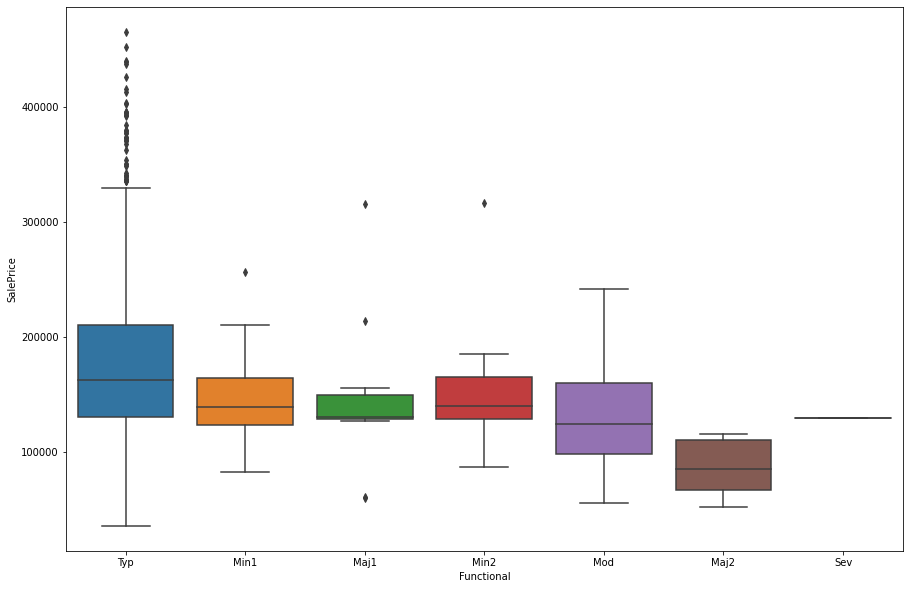

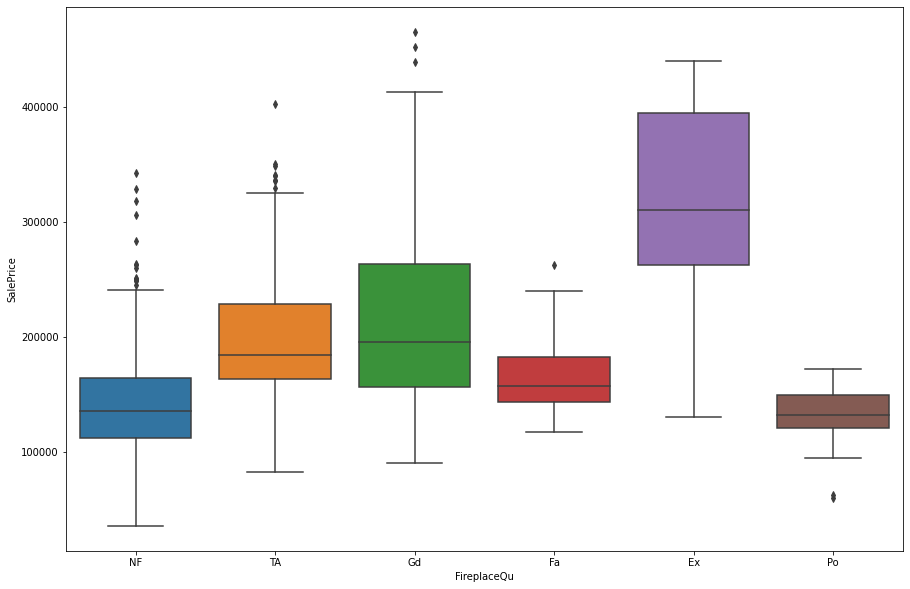

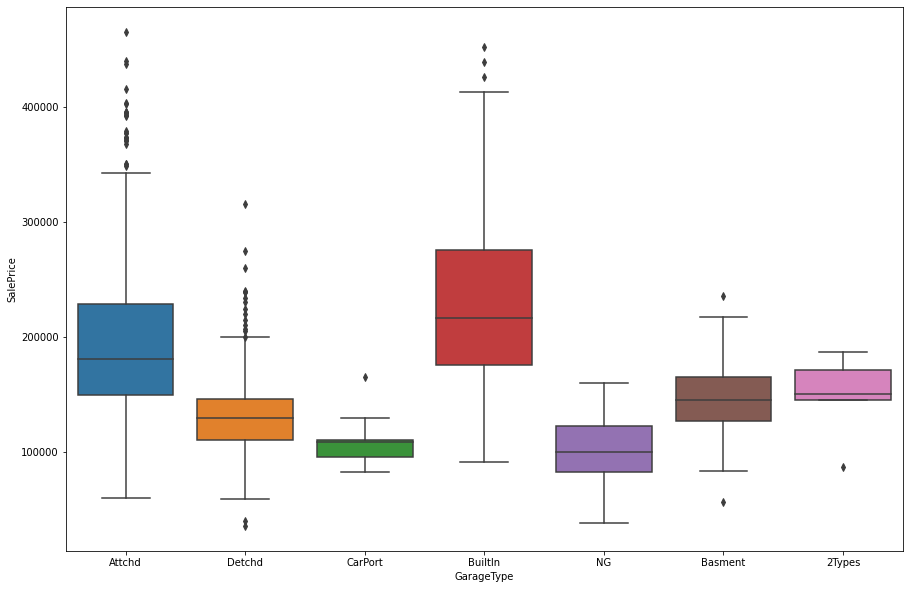

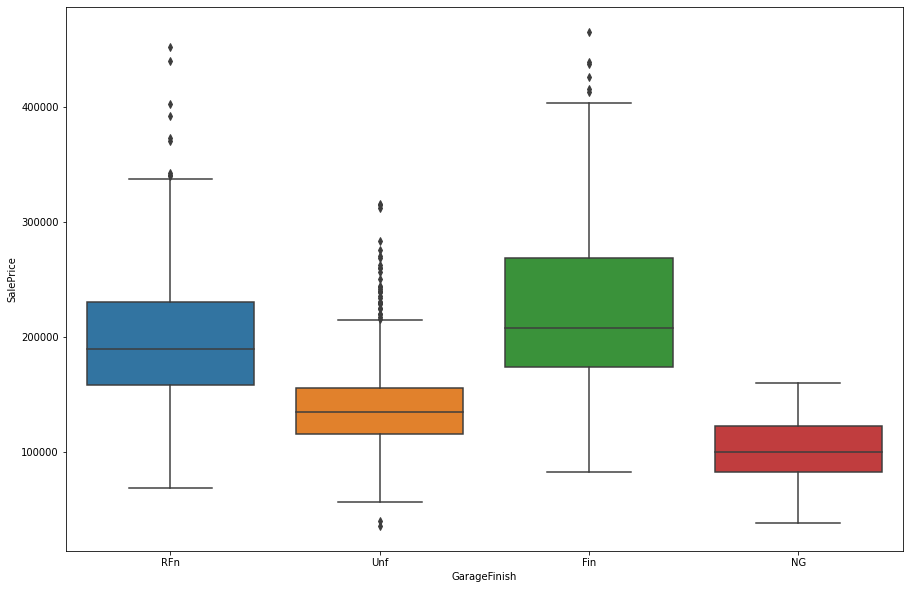

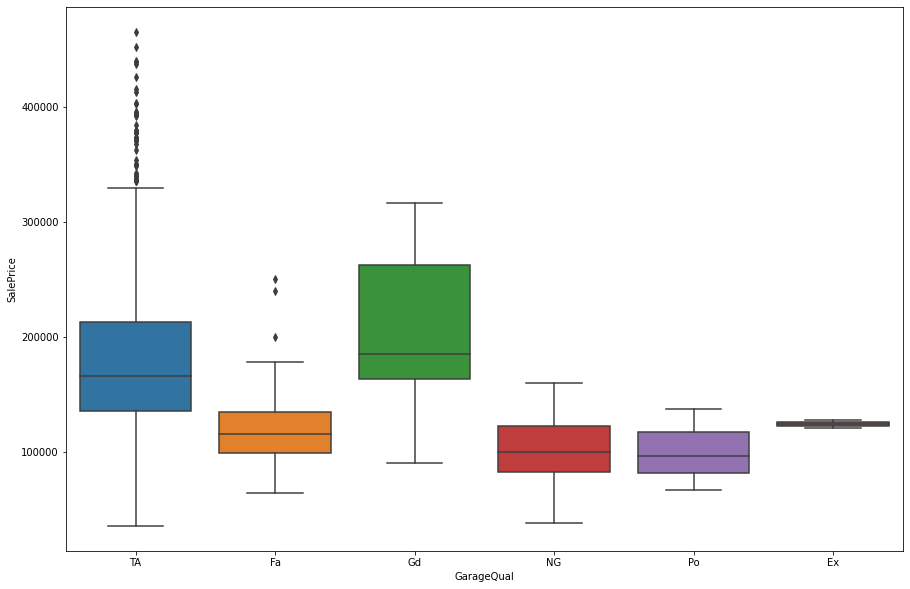

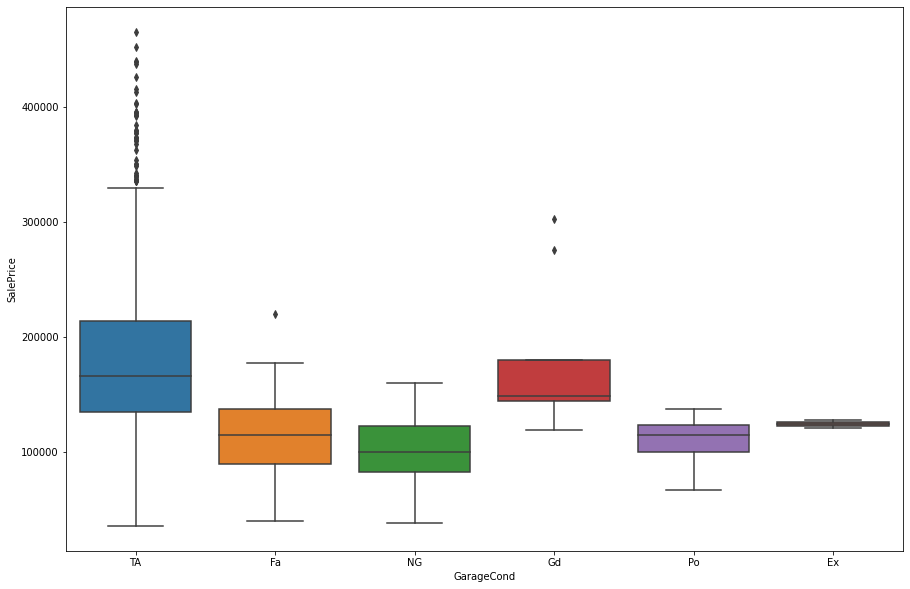

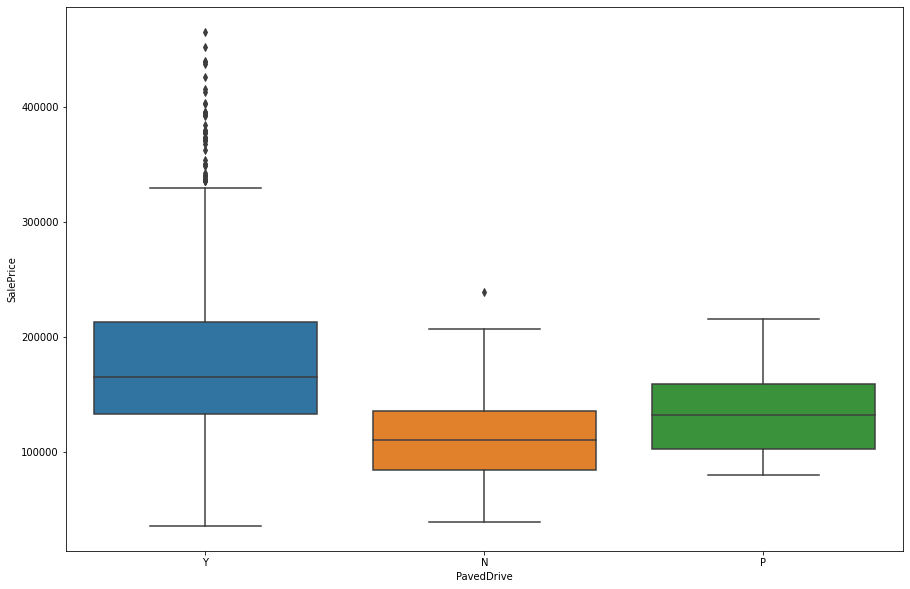

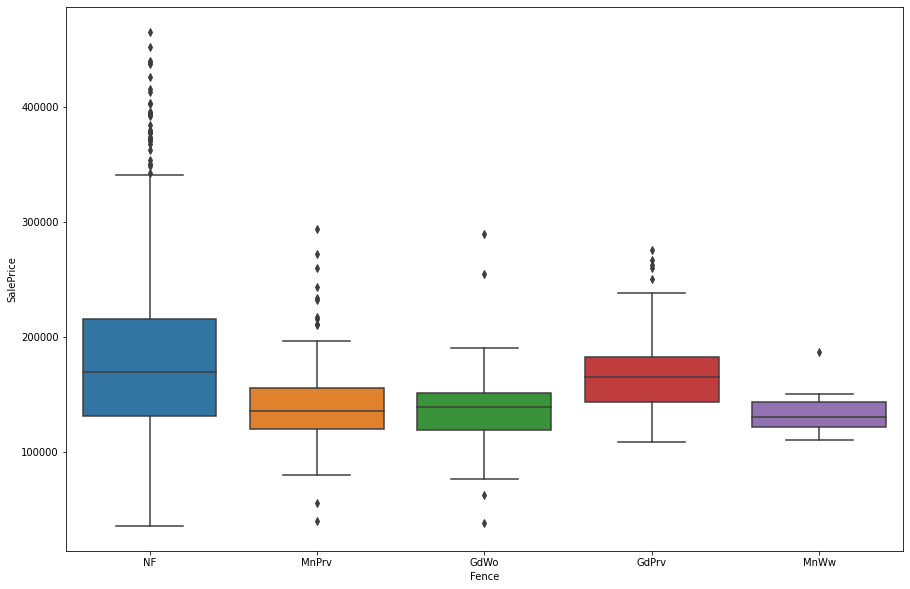

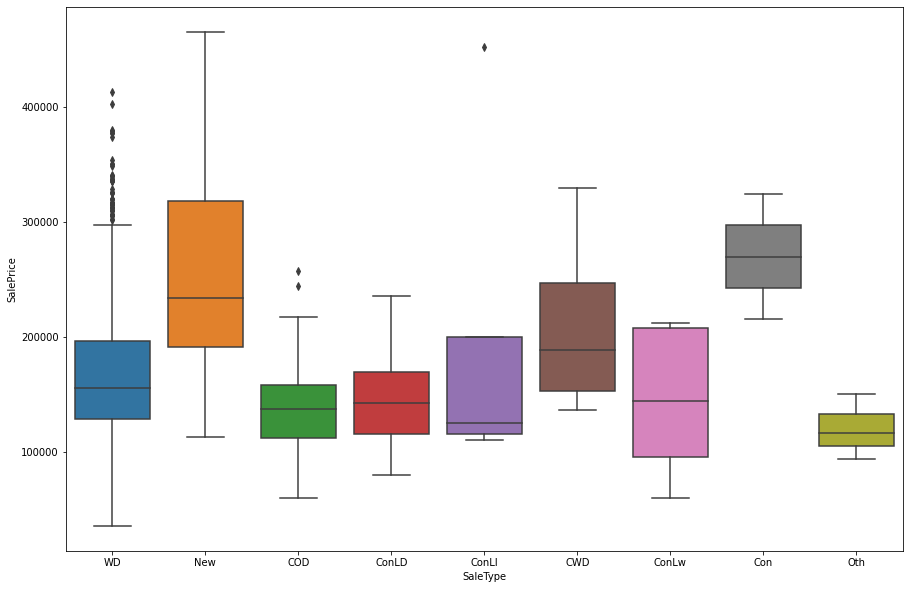

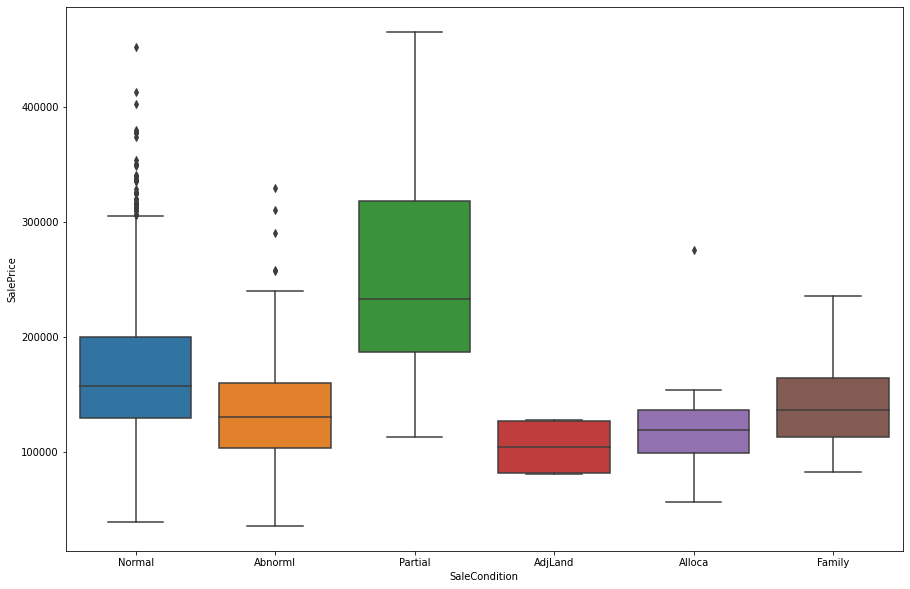

In [92]:
# Plotting all categorical variables in box plot
for col in categorical_columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(y="SalePrice",x=col, data=house)
    plt.show()


<font color='blue'>**Observation**</font> : We drop multiple outliers in this step based on our charts, <br>
**SaleCondition** : Alloca has a outlier above 200,000 <br>
**SaleType** : ConLI has a outlier above 400,000 <br>
**PavedDrive** : N has a outlier above 200,000 <br>
**Foundation** : Stone has a outlier above 200,000 <br>
**OverallCond** : 2OverallCond has a outlier above 200,000 <br>
**LotShape** : IR3 has a outlier below 100,000

In [93]:
house = house[~((house["SaleCondition"] == 'Alloca') & (house.SalePrice>200000))]
house = house[~((house["SaleType"] == 'N') & (house.SalePrice>200000)) ]
house = house[~((house["PavedDrive"] == 'Alloca') & (house.SalePrice>200000)) ]
house = house[~((house["Foundation"] == 'Stone') & (house.SalePrice>200000)) ]
house = house[~((house["OverallCond"] == '2OverallCond') & (house.SalePrice>200000)) ]
house = house[~((house["LotShape"] == 'IR3') & (house.SalePrice<100000)) ]


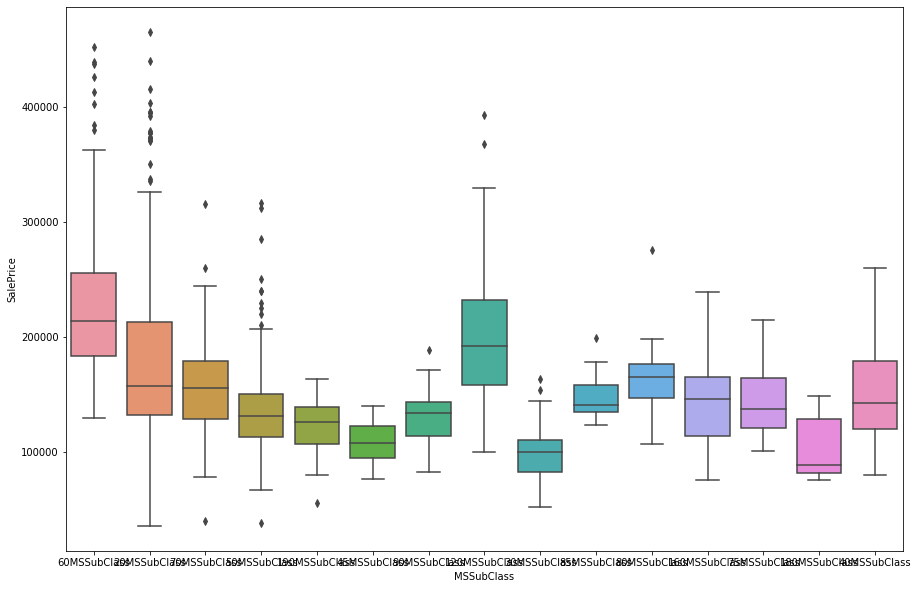

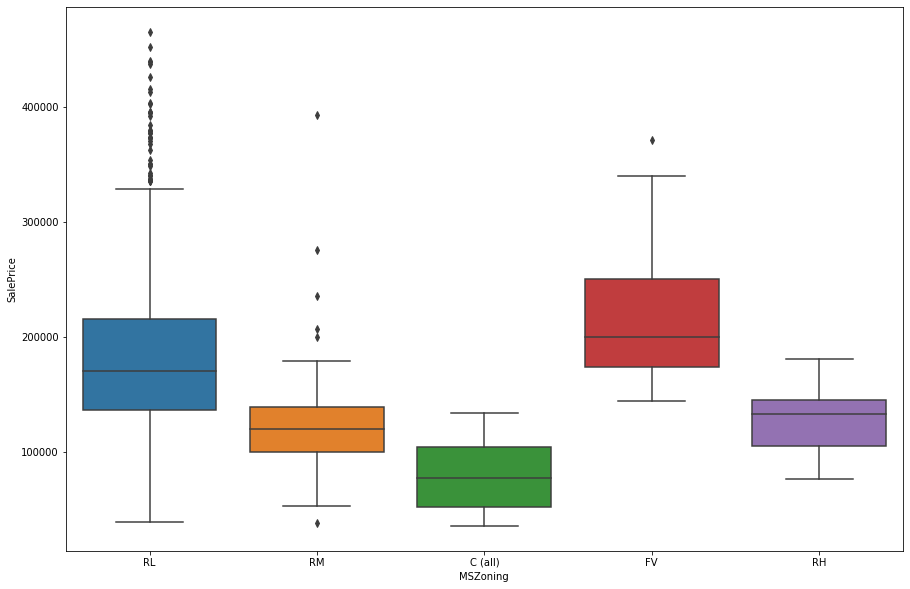

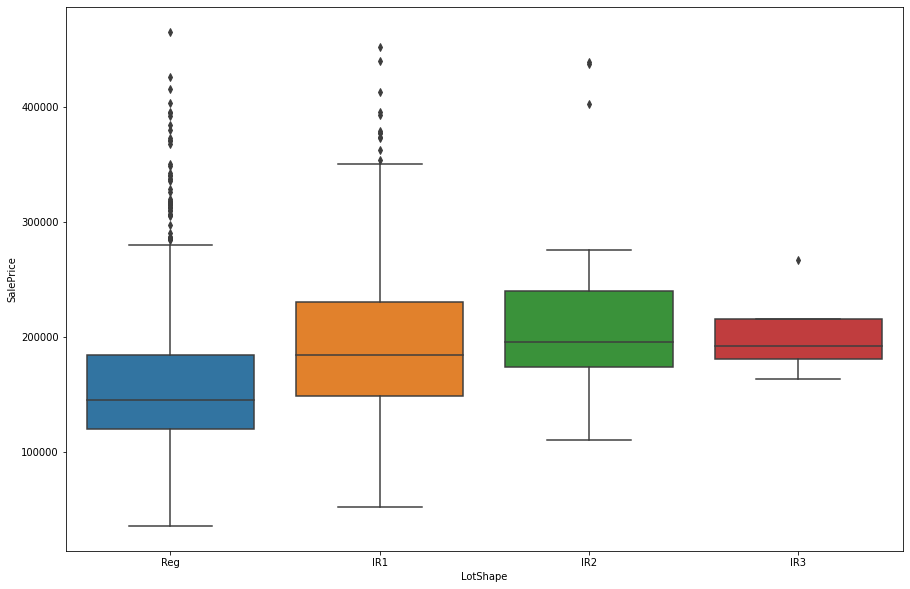

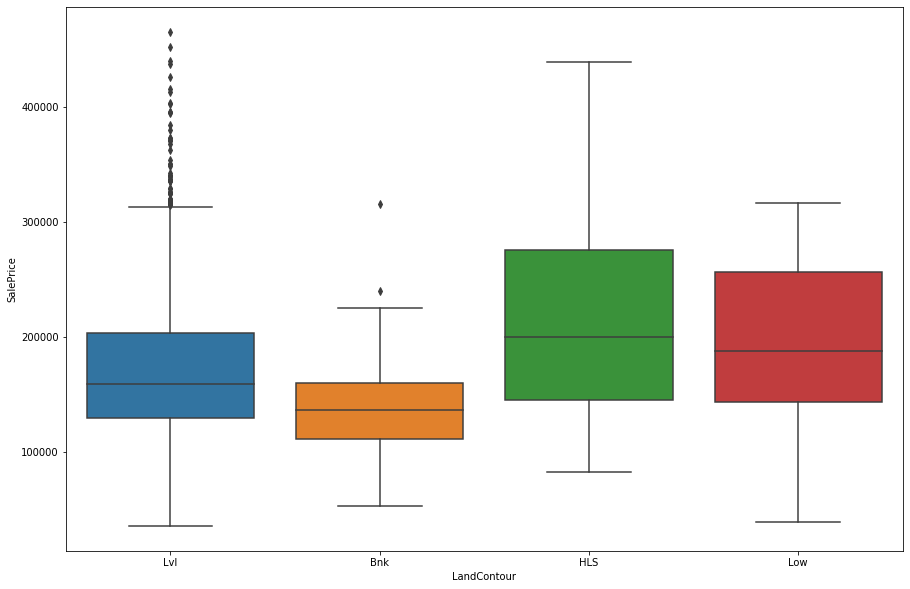

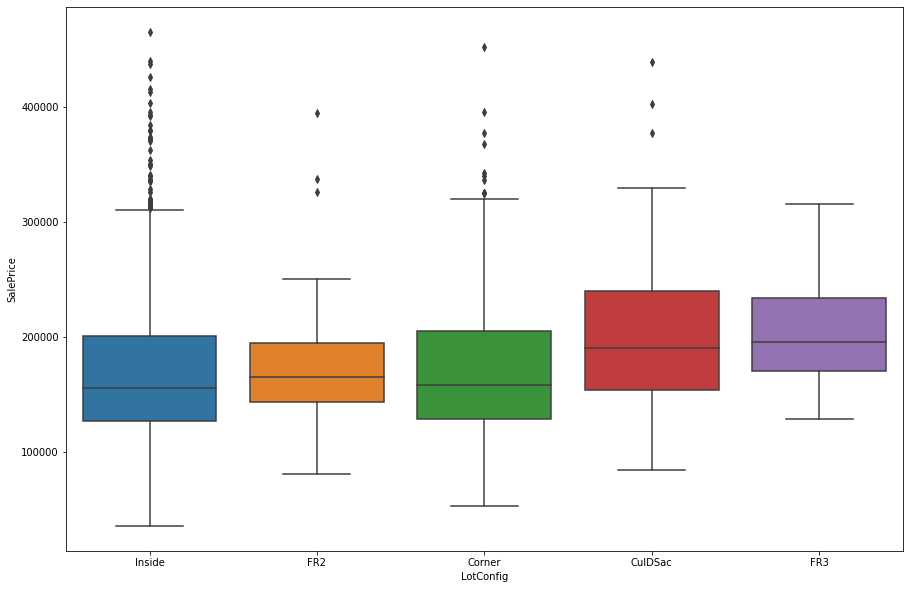

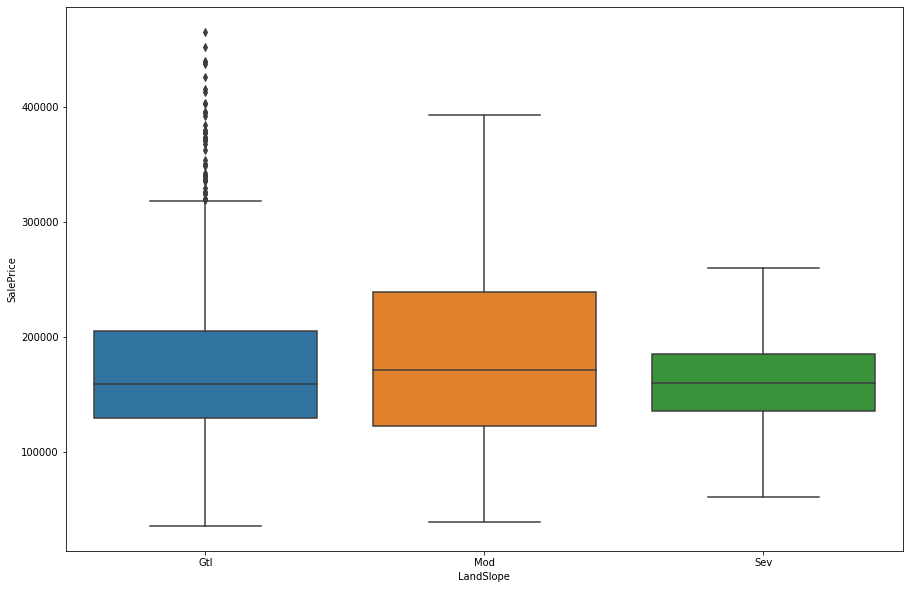

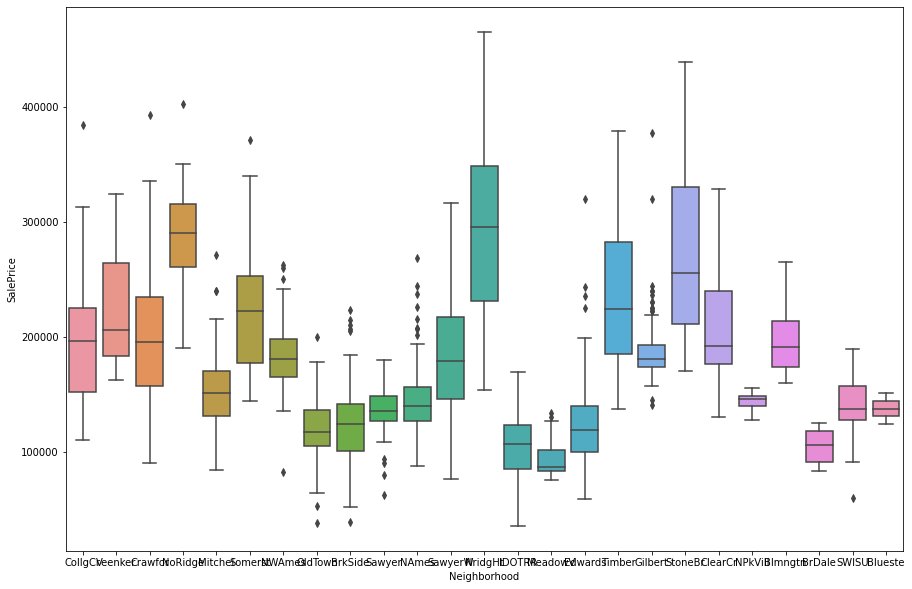

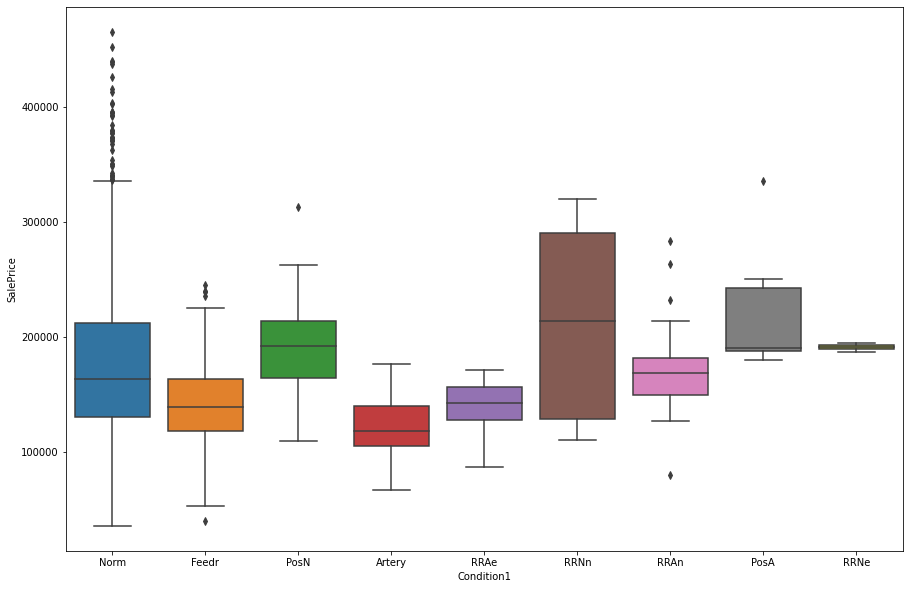

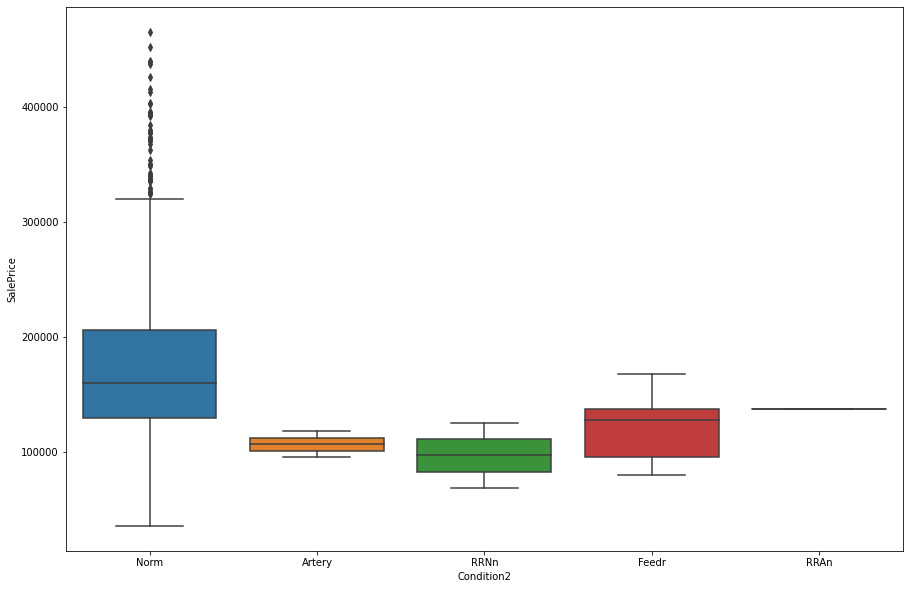

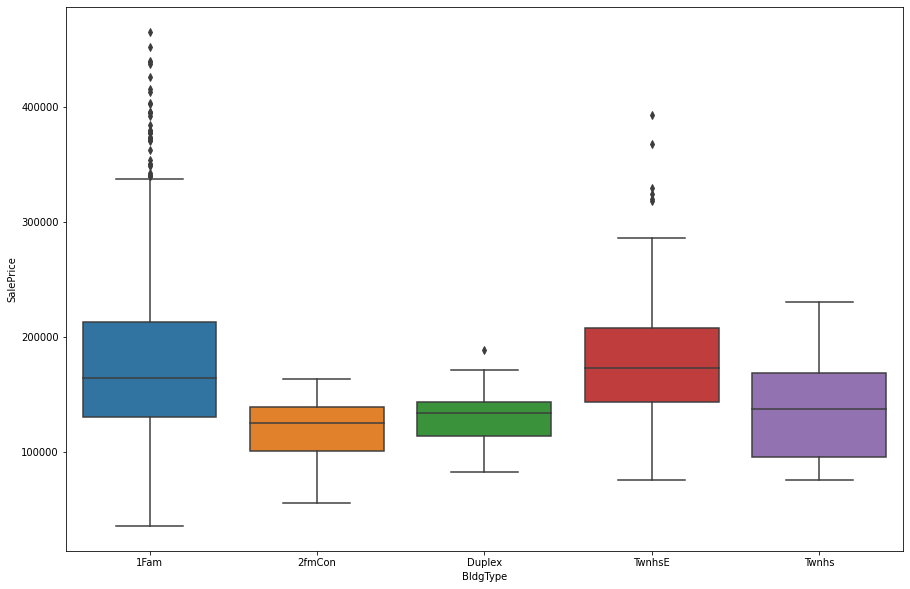

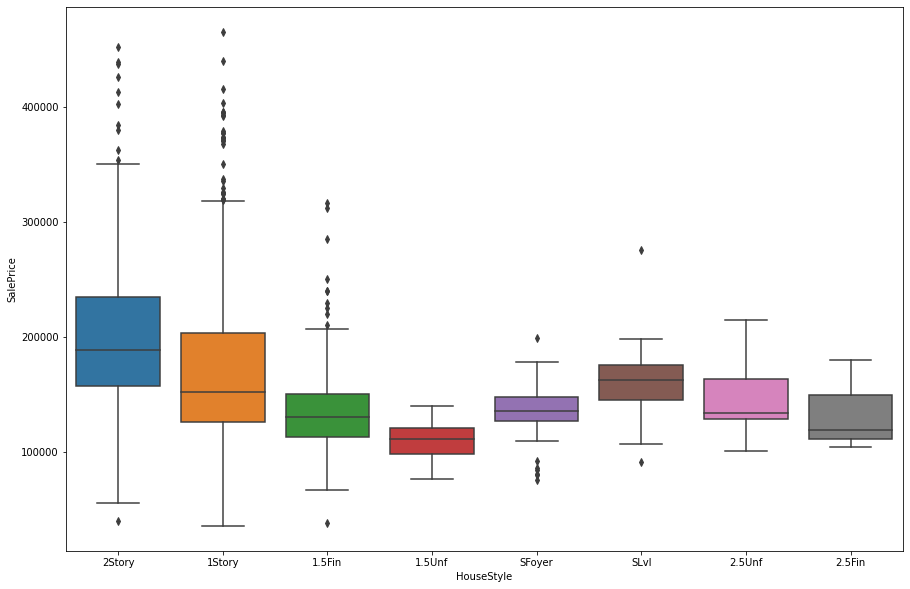

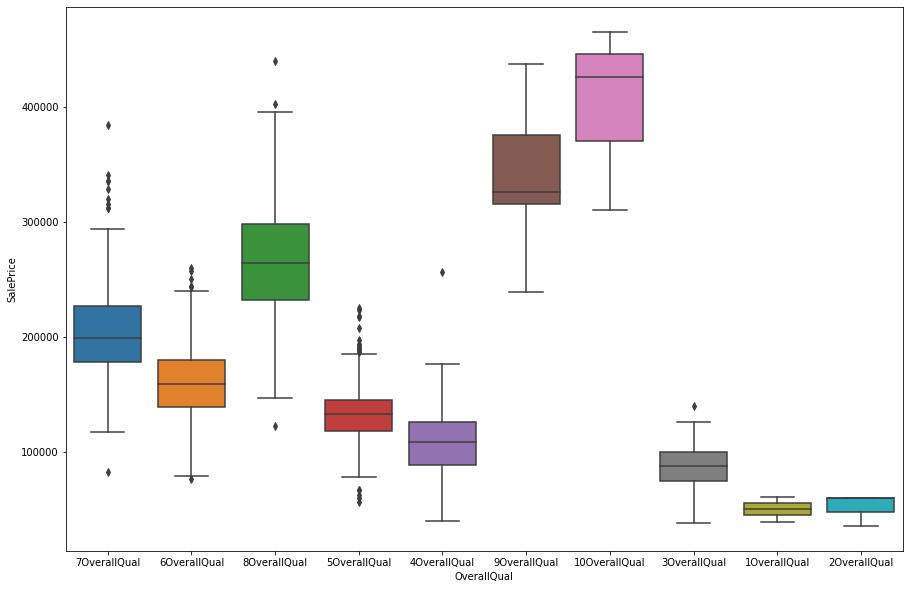

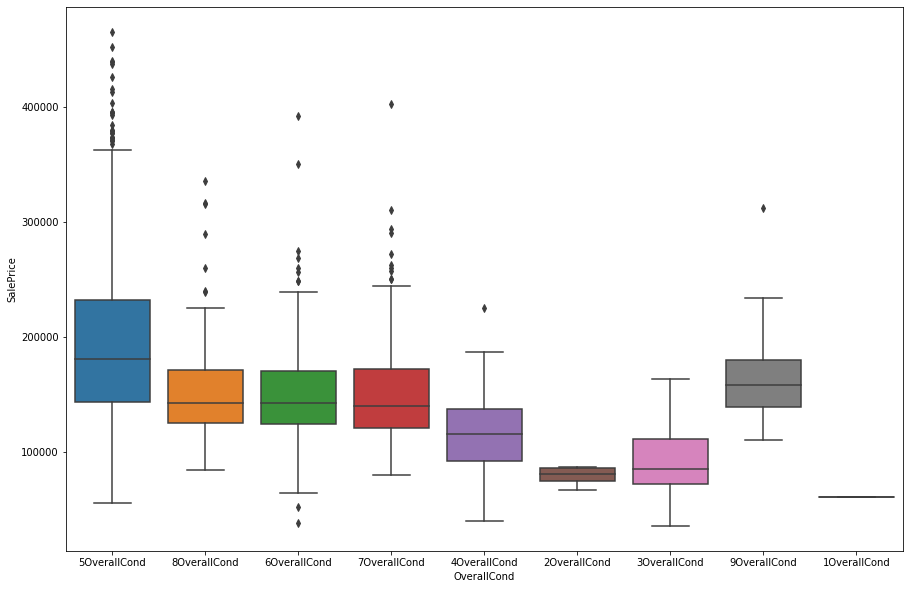

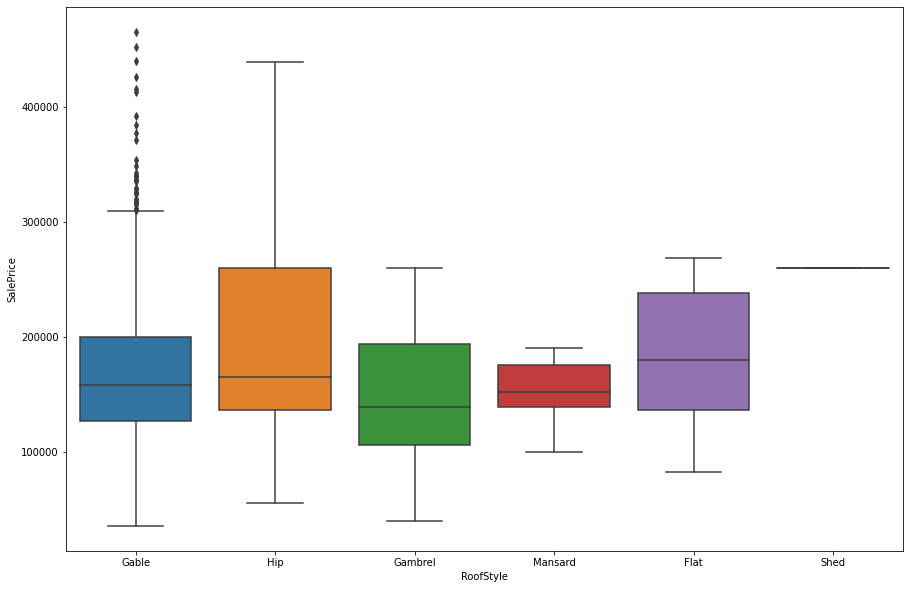

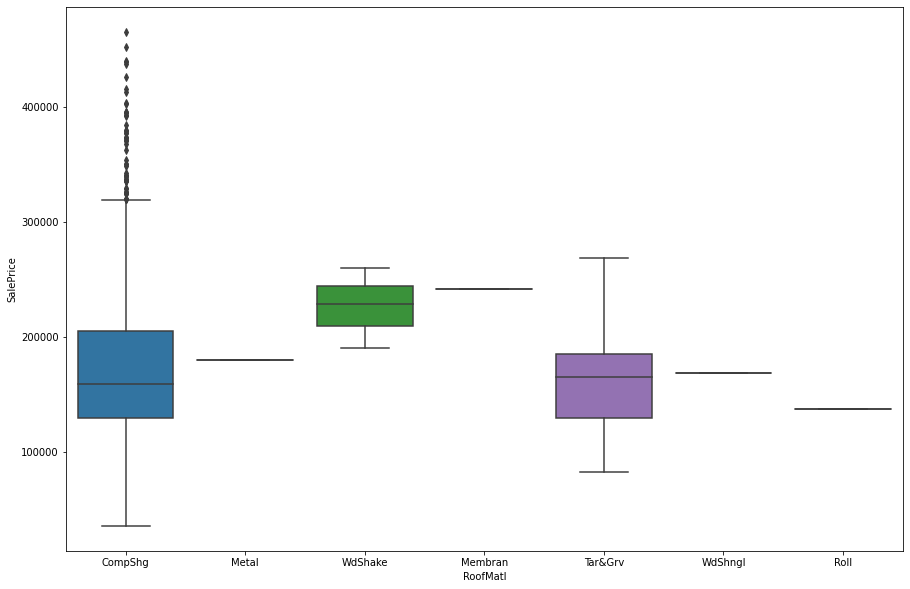

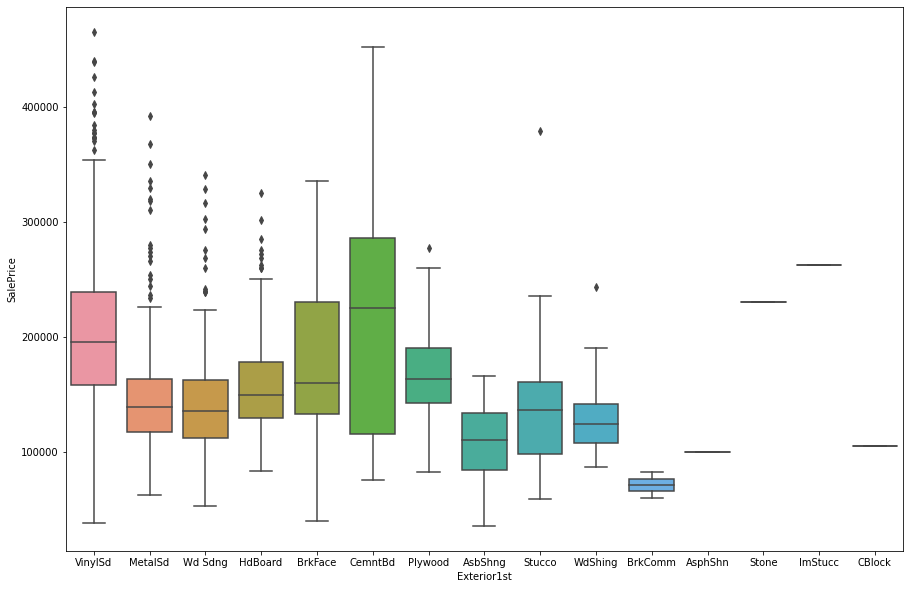

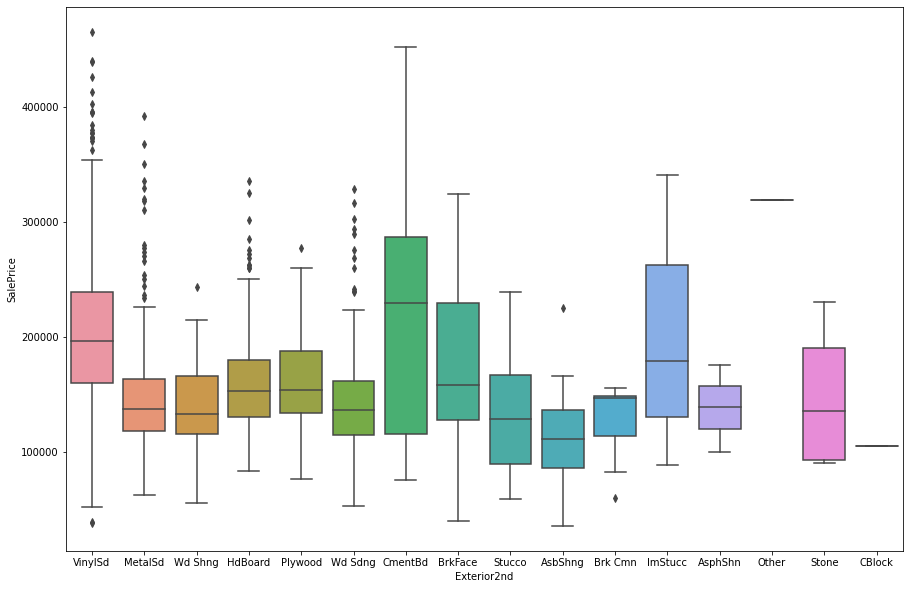

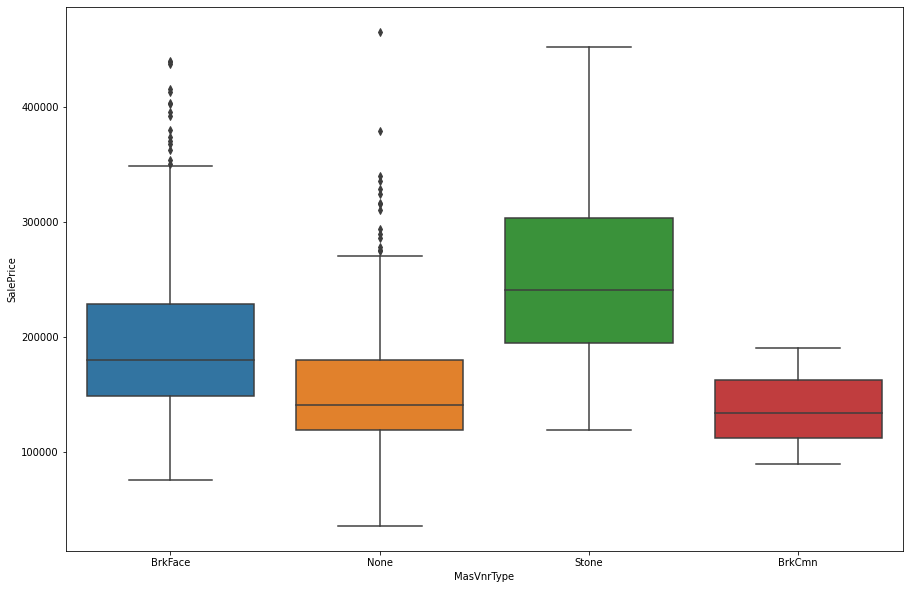

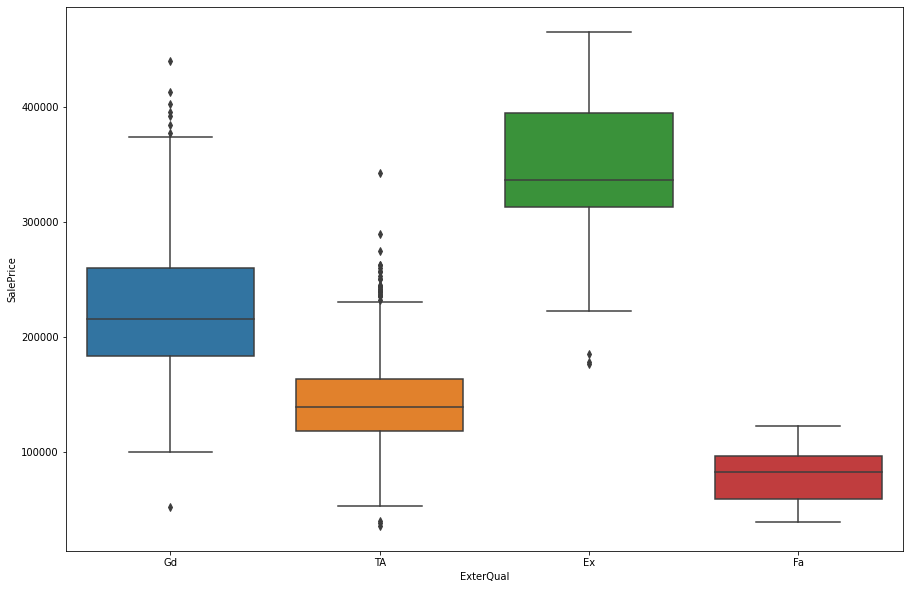

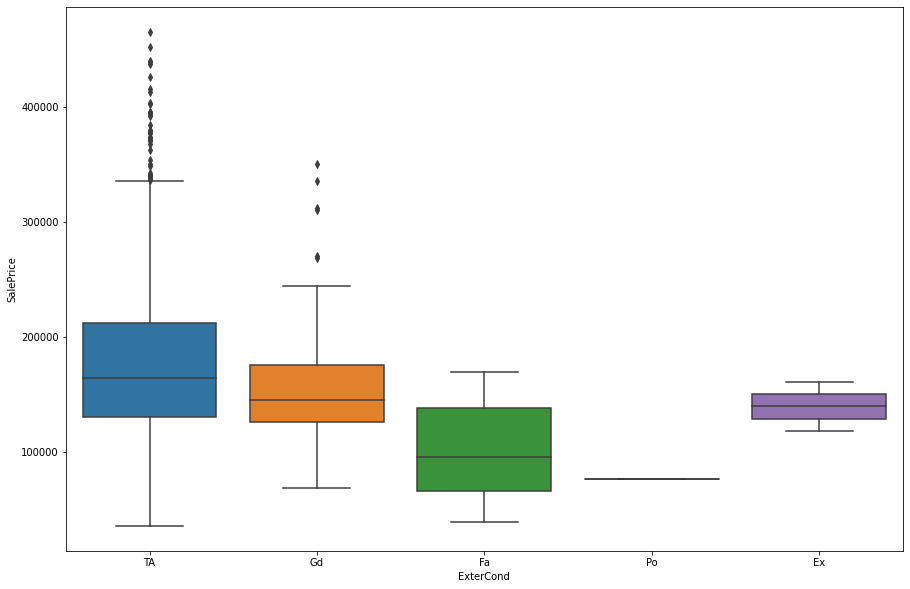

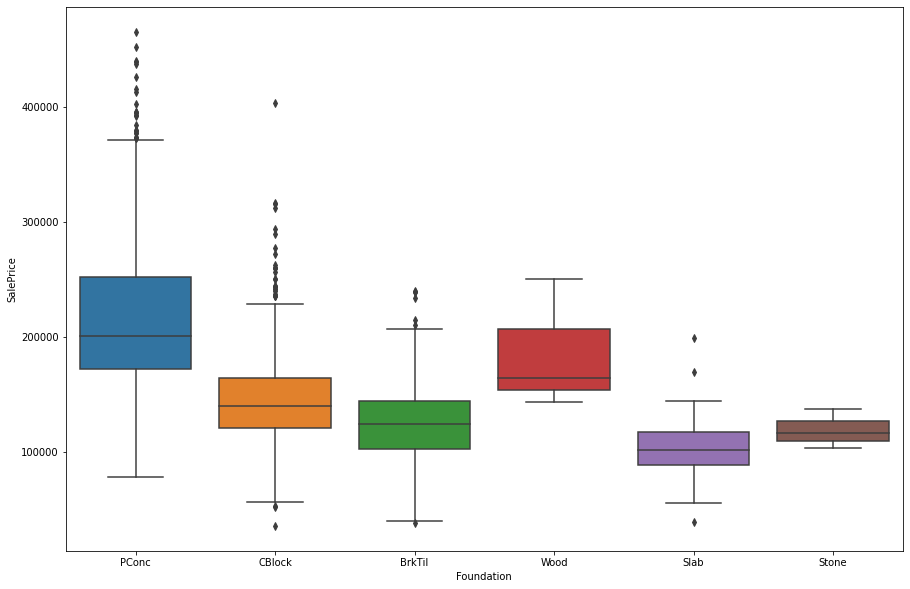

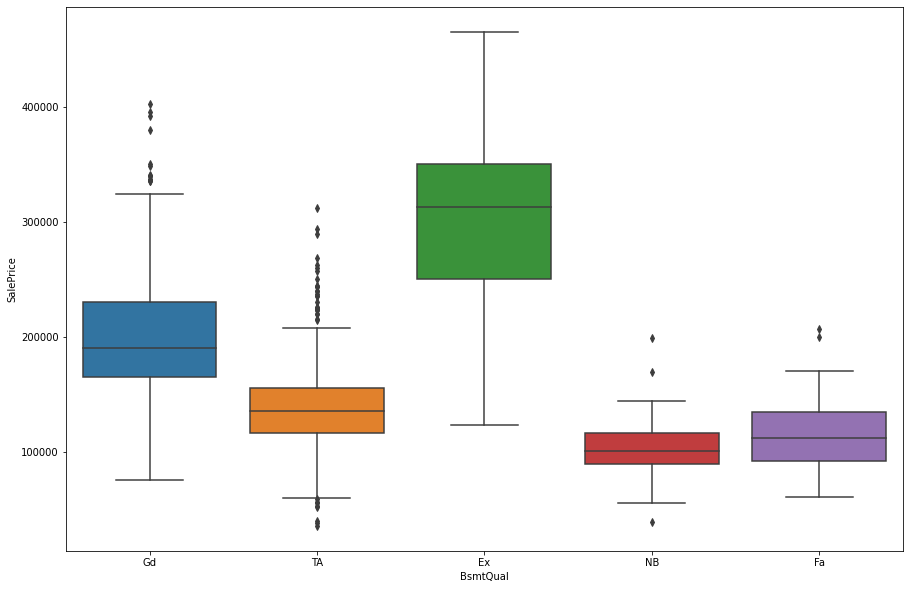

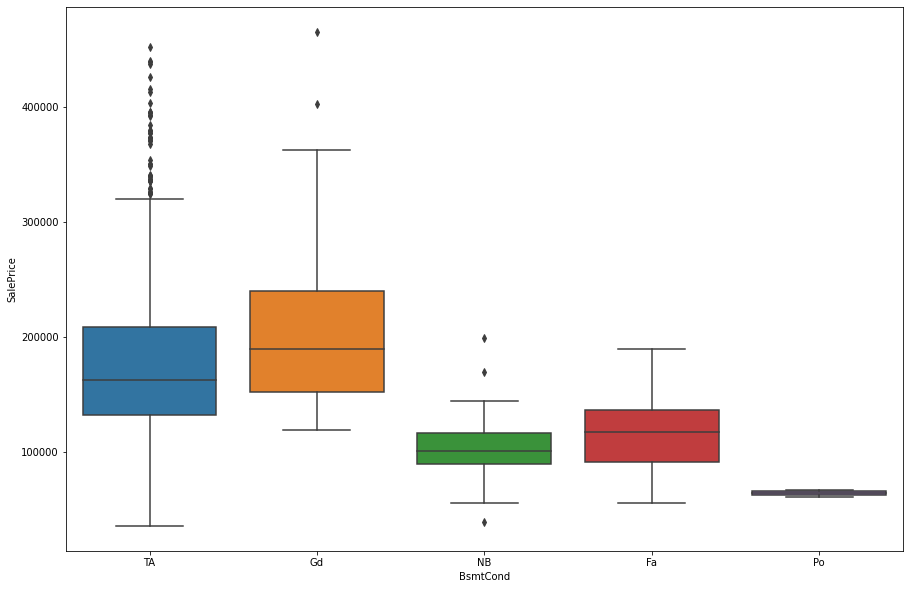

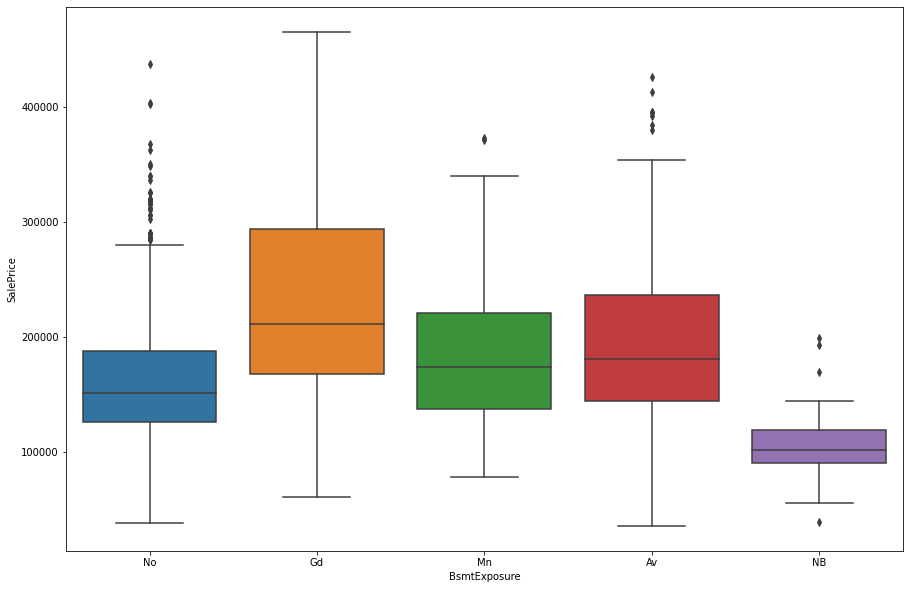

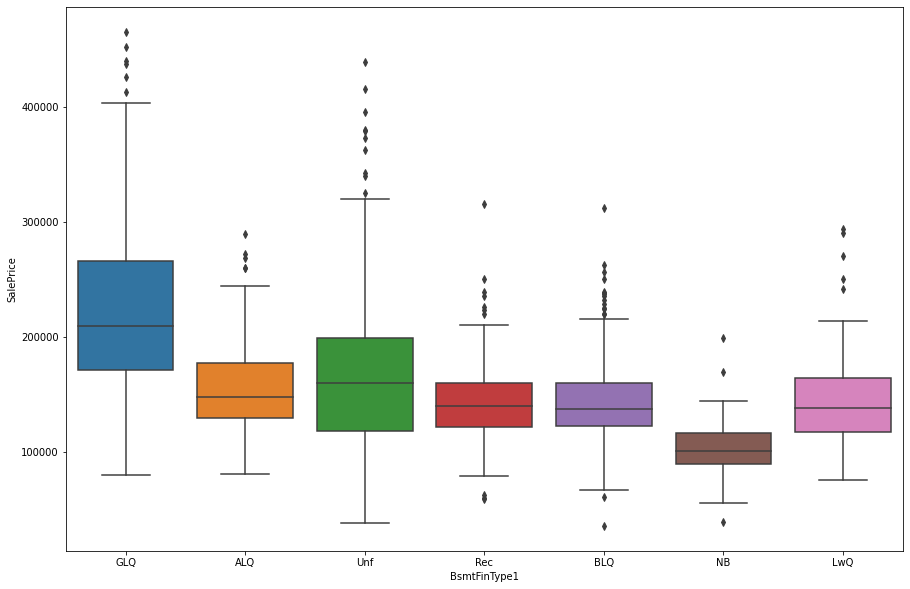

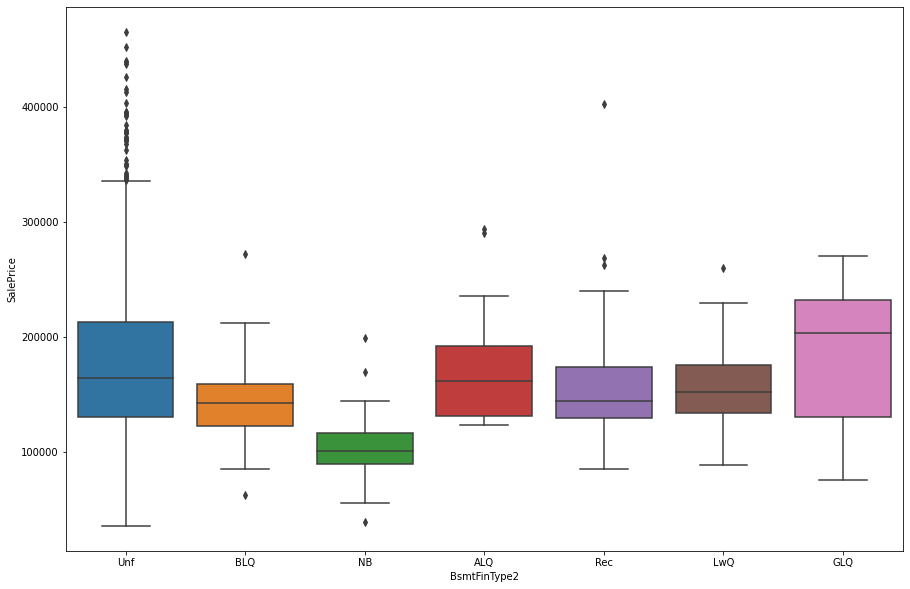

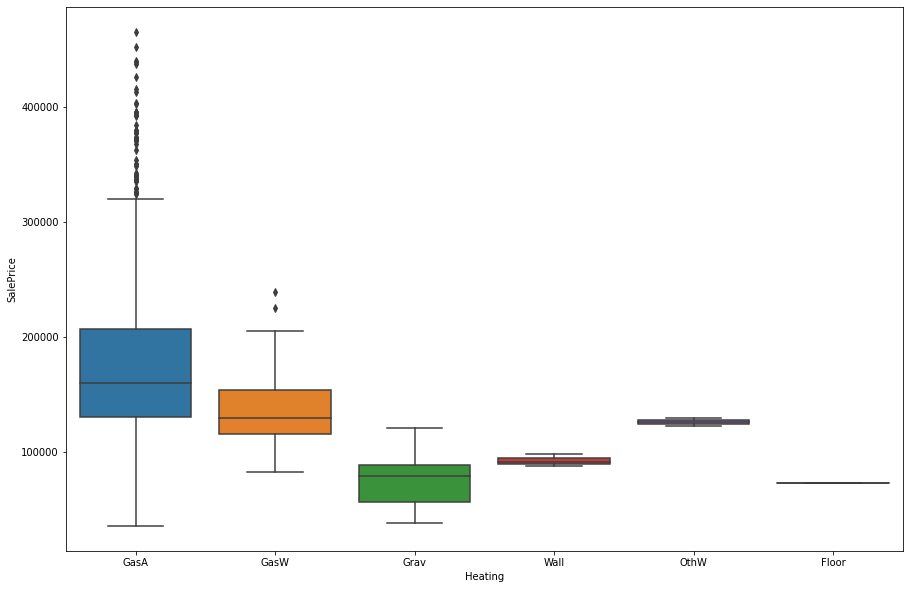

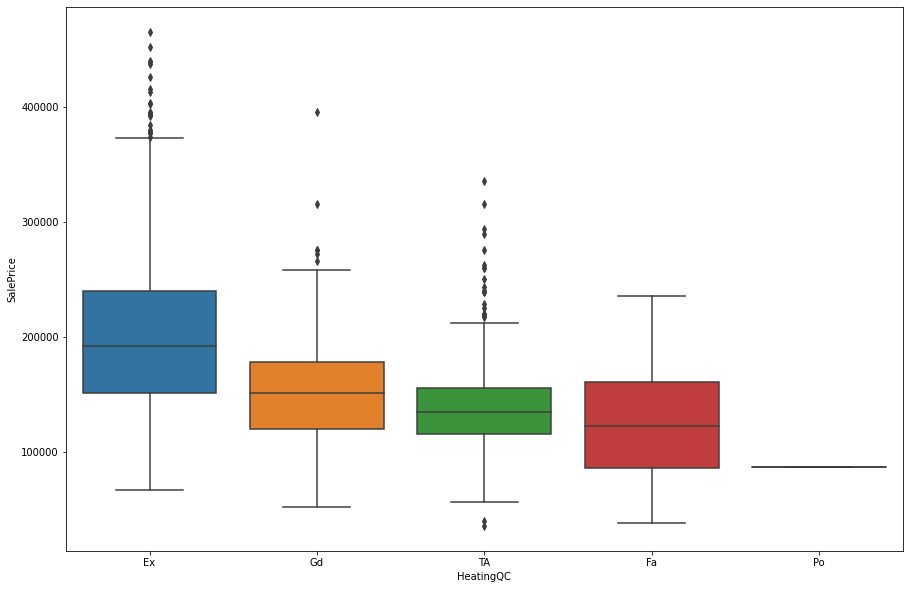

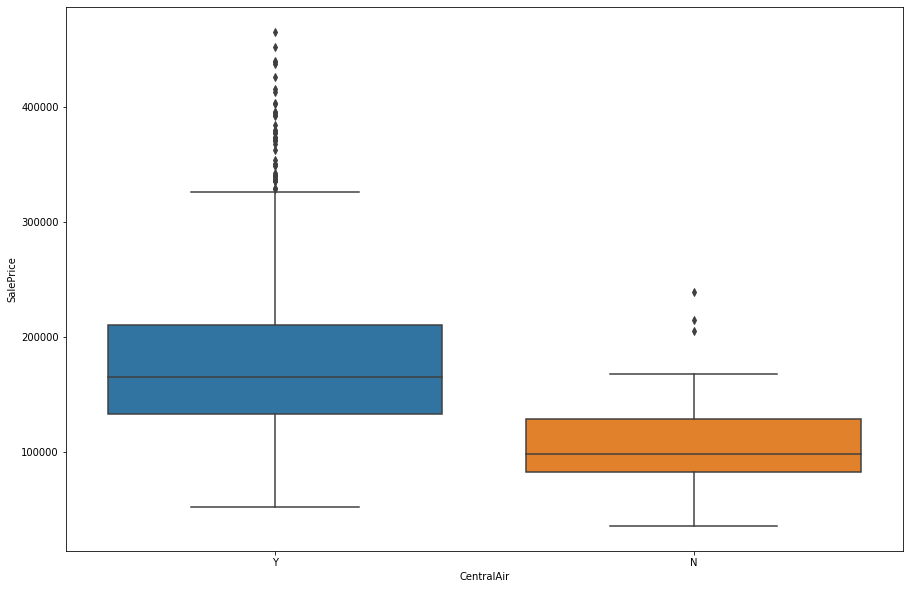

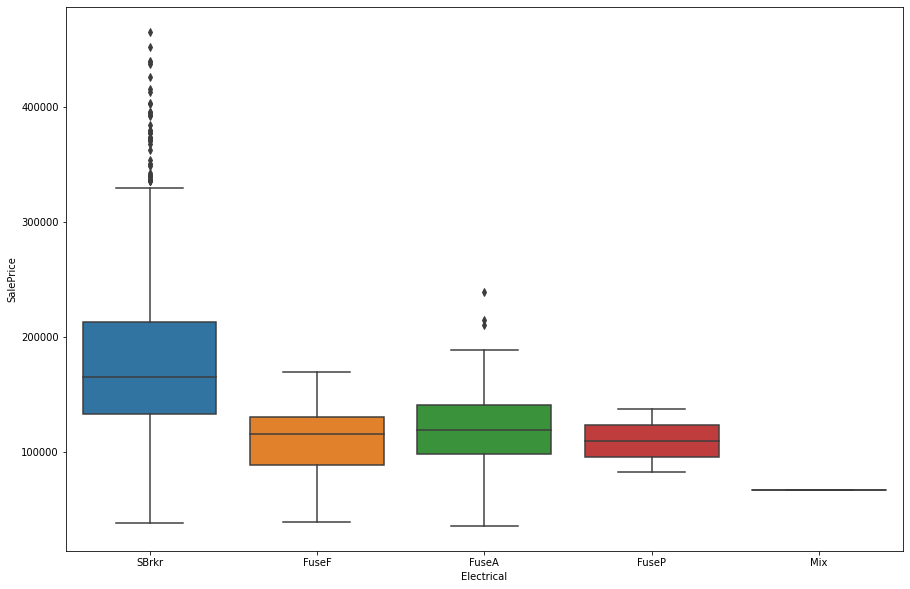

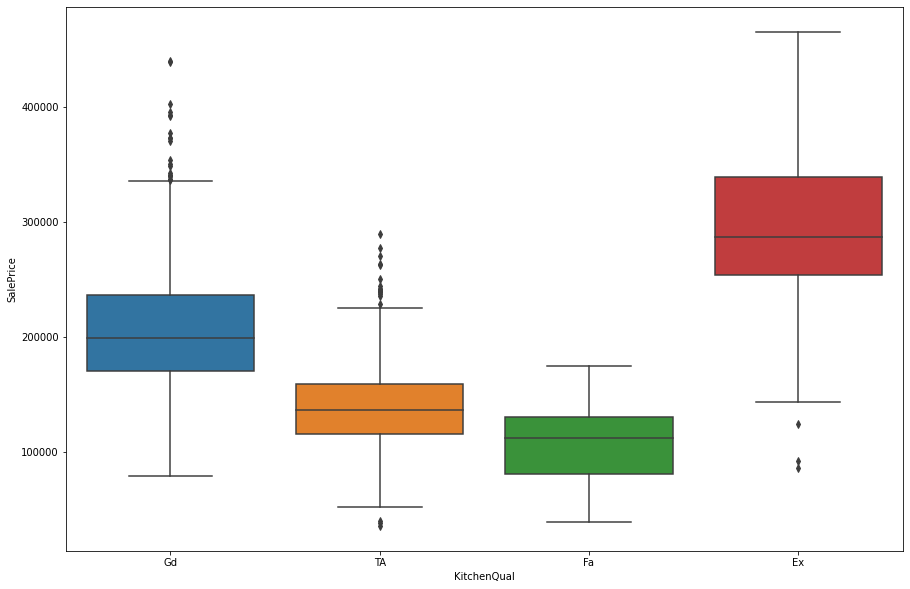

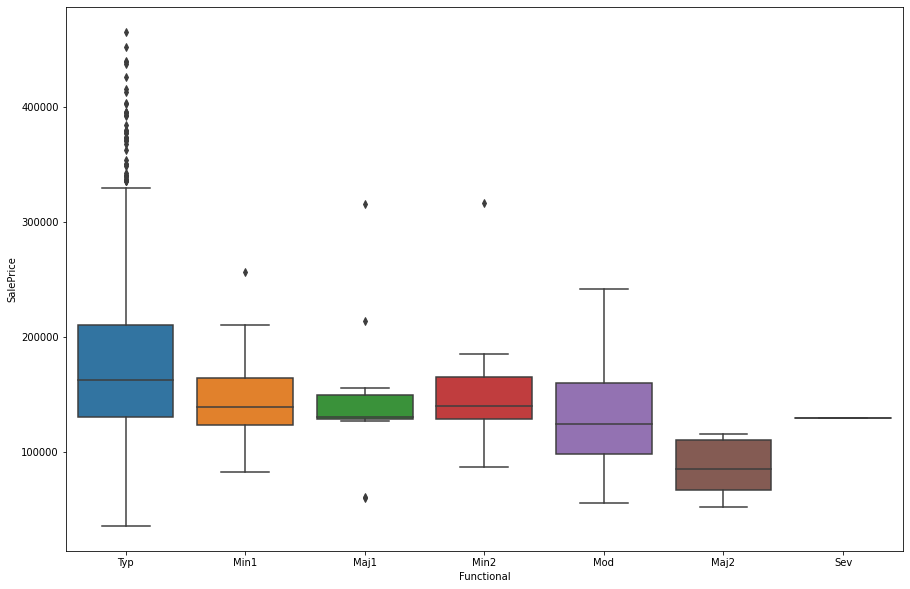

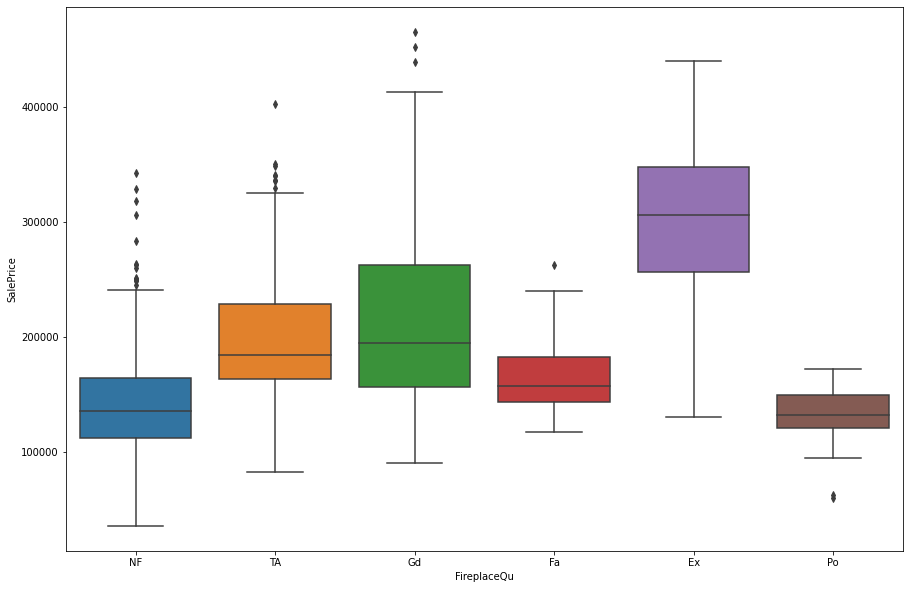

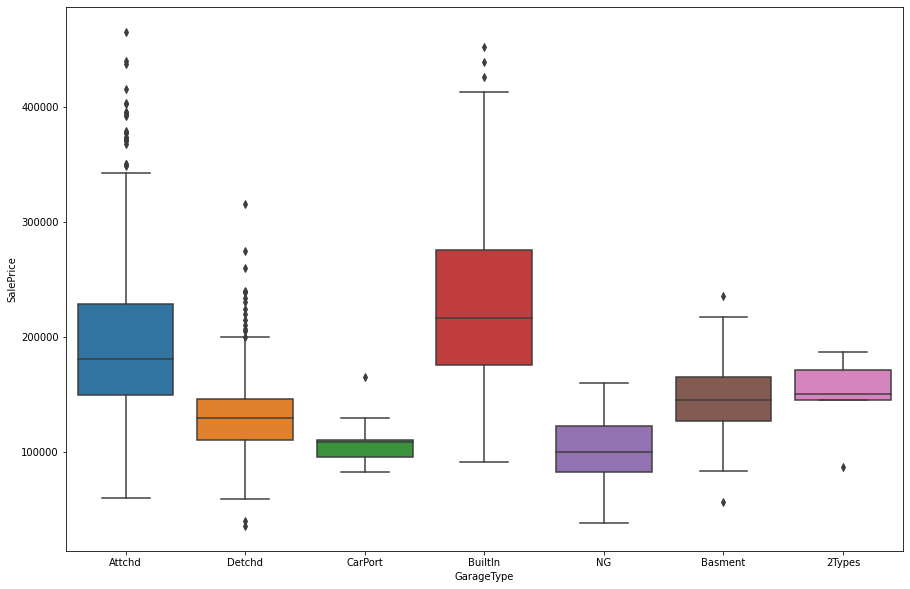

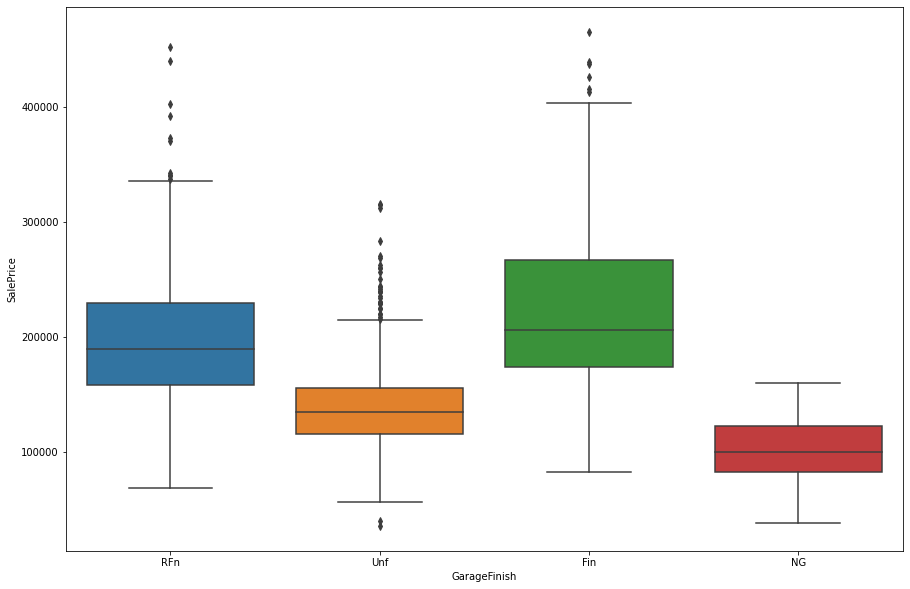

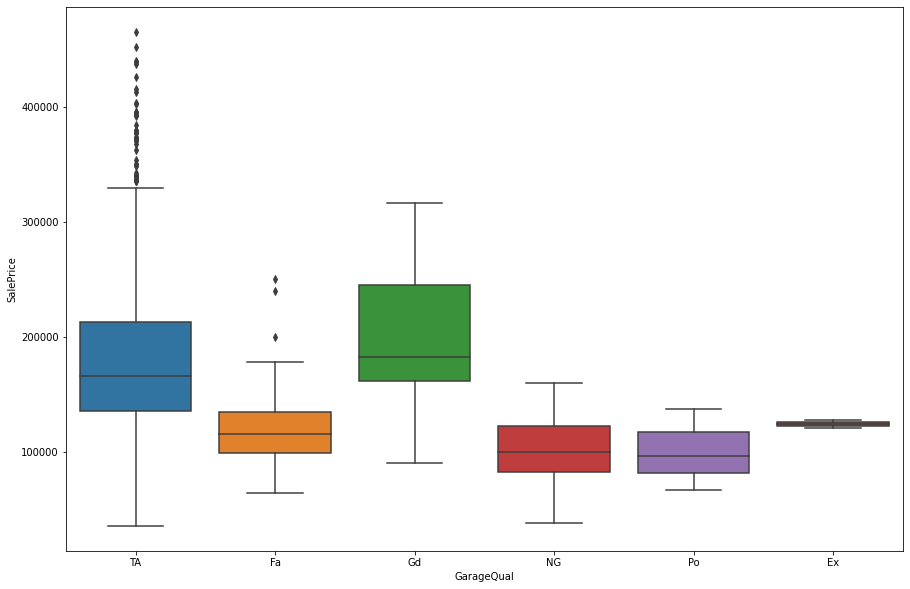

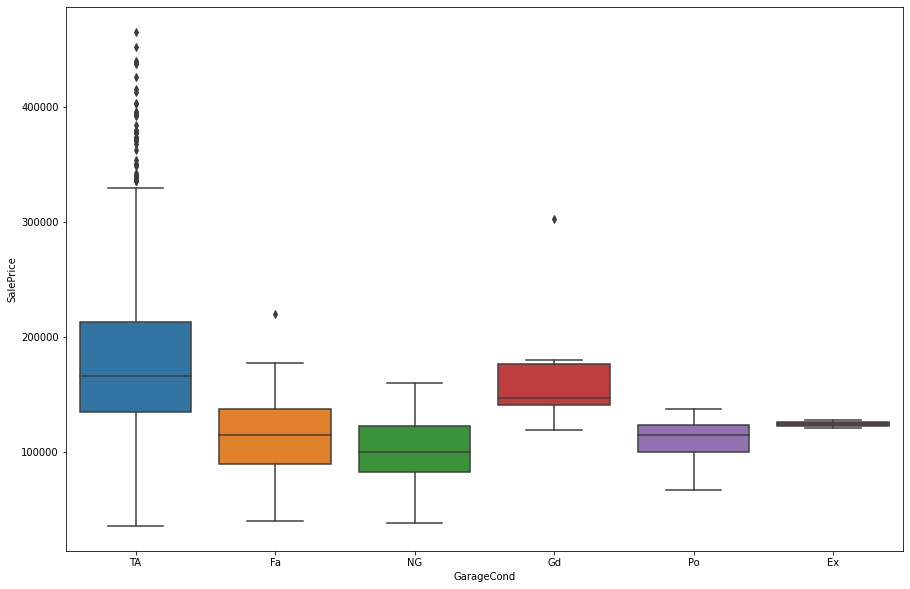

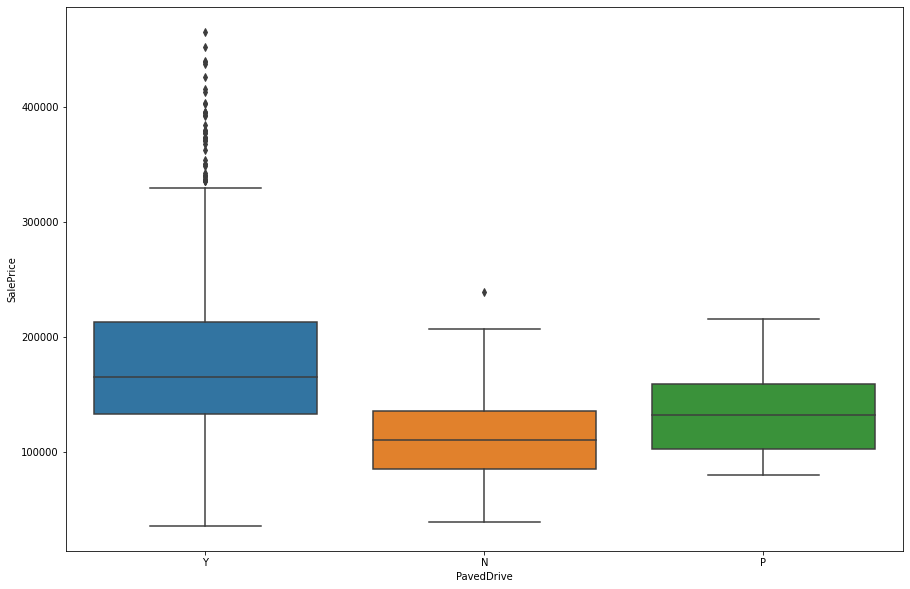

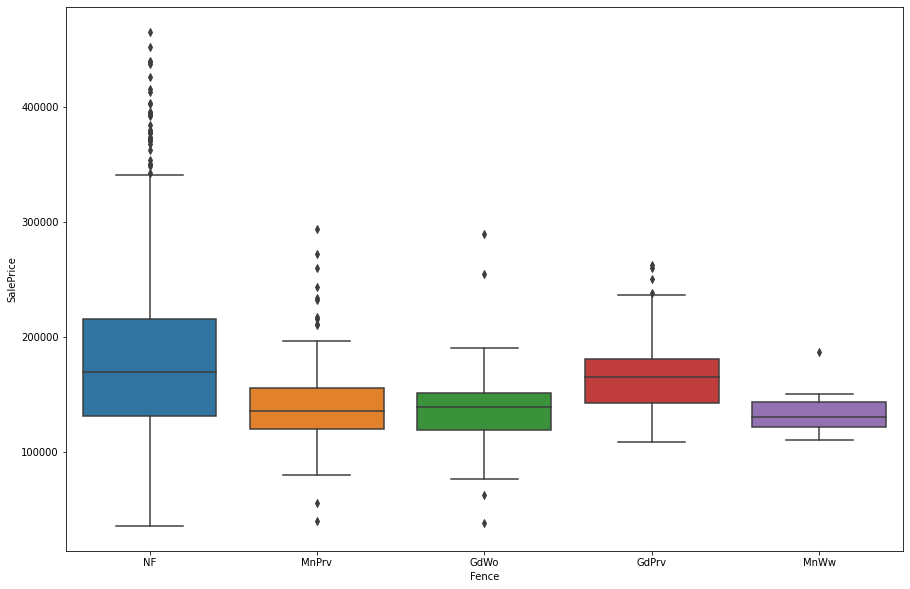

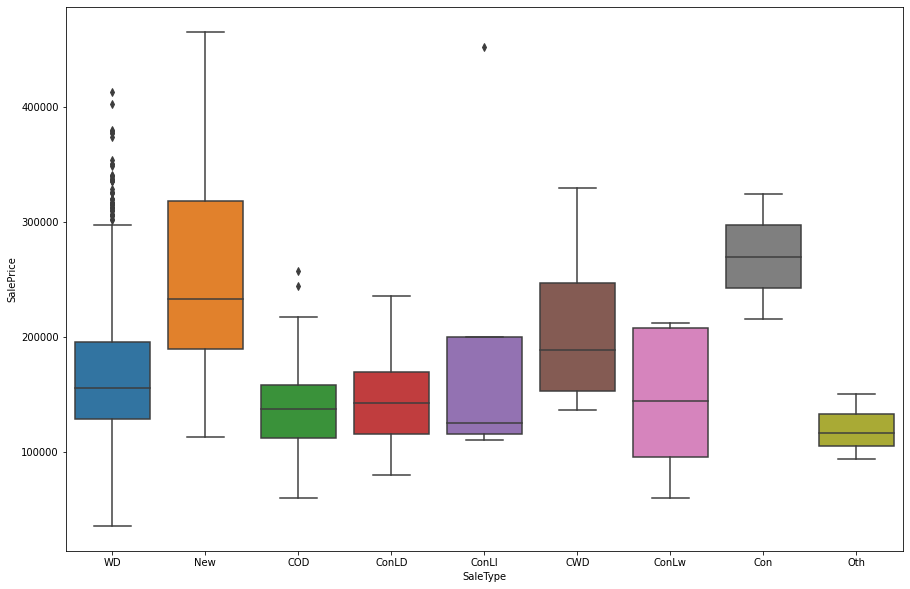

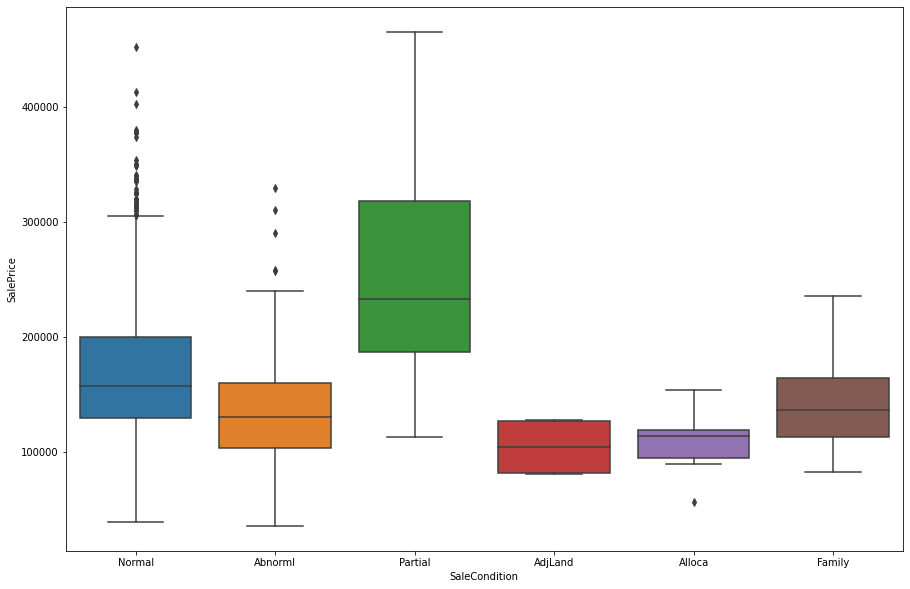

In [94]:
# Plotting all categorical variables in box plot
for col in categorical_columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(y="SalePrice",x=col, data=house)
    plt.show()

### 3.2 Encoding - Creating dummy variables

Convert categorical variables to dummy variables

In [95]:
len(categorical_columns)

41

<font color='blue'>**Observation**</font> : We have 41 variables which we need to encode to dummy variables in order to feed it to our model. The variables which needs to be encoded are as follows:

In [96]:
categorical_columns

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [97]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1376 non-null   object 
 1   MSZoning       1376 non-null   object 
 2   LotFrontage    1376 non-null   float64
 3   LotArea        1376 non-null   int64  
 4   LotShape       1376 non-null   object 
 5   LandContour    1376 non-null   object 
 6   LotConfig      1376 non-null   object 
 7   LandSlope      1376 non-null   object 
 8   Neighborhood   1376 non-null   object 
 9   Condition1     1376 non-null   object 
 10  Condition2     1376 non-null   object 
 11  BldgType       1376 non-null   object 
 12  HouseStyle     1376 non-null   object 
 13  OverallQual    1376 non-null   object 
 14  OverallCond    1376 non-null   object 
 15  YearBuilt      1376 non-null   int64  
 16  YearRemodAdd   1376 non-null   int64  
 17  RoofStyle      1376 non-null   object 
 18  RoofMatl

<font color='blue'>**Observation**</font> : We have different categorical columns with same values which will cause trouble while encoding with dummy variables hence we will append the column name along with the values to help us encode. We will not do this for 'MSSubClass', 'OverallQual' and 'OverallCond' as we have done this already

In [98]:
categorical_columns_temp = [ elem for elem in categorical_columns if elem not in ['MSSubClass', 'OverallQual' , 'OverallCond']]

In [99]:
len(categorical_columns_temp)

38

In [100]:
for col in categorical_columns_temp:
    house[col] = house[col].apply(lambda x : x.replace(x,col+'-'+x))

In [101]:
house[categorical_columns]

MSSubClass     MSZoning      LotShape      LandContour  \
0     60MSSubClass  MSZoning-RL  LotShape-Reg  LandContour-Lvl   
1     20MSSubClass  MSZoning-RL  LotShape-Reg  LandContour-Lvl   
2     60MSSubClass  MSZoning-RL  LotShape-IR1  LandContour-Lvl   
3     70MSSubClass  MSZoning-RL  LotShape-IR1  LandContour-Lvl   
4     60MSSubClass  MSZoning-RL  LotShape-IR1  LandContour-Lvl   
...            ...          ...           ...              ...   
1453  20MSSubClass  MSZoning-RL  LotShape-Reg  LandContour-Lvl   
1454  20MSSubClass  MSZoning-FV  LotShape-Reg  LandContour-Lvl   
1455  60MSSubClass  MSZoning-RL  LotShape-Reg  LandContour-Lvl   
1456  20MSSubClass  MSZoning-RL  LotShape-Reg  LandContour-Lvl   
1458  20MSSubClass  MSZoning-RL  LotShape-Reg  LandContour-Lvl   

             LotConfig      LandSlope          Neighborhood        Condition1  \
0     LotConfig-Inside  LandSlope-Gtl  Neighborhood-CollgCr   Condition1-Norm   
1        LotConfig-FR2  LandSlope-Gtl  Neighborhood-Veenker  Condition1-Feedr   
2     LotConfig-Inside  LandSlope-Gtl  Neighborhood-CollgCr   Condition1-Norm   
3     LotConfig-Corner  LandSlope-Gtl  Neighborhood-Crawfor   Condition1-Norm   
4        LotConfig-FR2  LandSlope-Gtl  Neighborhood-NoRidge   Condition1-Norm   
...                ...            ...                   ...               ...   
1453  LotConfig-Inside  LandSlope-Gtl  Neighborhood-Mitchel   Condition1-Norm   
1454  LotConfig-Inside  LandSlope-Gtl  Neighborhood-Somerst   Condition1-Norm   
1455  LotConfig-Inside  LandSlope-Gtl  Neighborhood-Gilbert   Condition1-Norm   
1456  LotConfig-Inside  LandSlope-Gtl   Neighborhood-NWAmes   Condition1-Norm   
1458  LotConfig-Inside  LandSlope-Gtl    Neighborhood-NAmes   Condition1-Norm   

           Condition2       BldgType         HouseStyle   OverallQual  \
0     Condition2-Norm  BldgType-1Fam  HouseStyle-2Story  7OverallQual   
1     Condition2-Norm  BldgType-1Fam  HouseStyle-1Story  6OverallQual   
2     Condition2-Norm  BldgType-1Fam  HouseStyle-2Story  7OverallQual   
3     Condition2-Norm  BldgType-1Fam  HouseStyle-2Story  7OverallQual   
4     Condition2-Norm  BldgType-1Fam  HouseStyle-2Story  8OverallQual   
...               ...            ...                ...           ...   
1453  Condition2-Norm  BldgType-1Fam  HouseStyle-1Story  5OverallQual   
1454  Condition2-Norm  BldgType-1Fam  HouseStyle-1Story  7OverallQual   
1455  Condition2-Norm  BldgType-1Fam  HouseStyle-2Story  6OverallQual   
1456  Condition2-Norm  BldgType-1Fam  HouseStyle-1Story  6OverallQual   
1458  Condition2-Norm  BldgType-1Fam  HouseStyle-1Story  5OverallQual   

       OverallCond        RoofStyle          RoofMatl          Exterior1st  \
0     5OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-VinylSd   
1     8OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-MetalSd   
2     5OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-VinylSd   
3     5OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-Wd Sdng   
4     5OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-VinylSd   
...            ...              ...               ...                  ...   
1453  5OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-VinylSd   
1454  5OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-VinylSd   
1455  5OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-VinylSd   
1456  6OverallCond  RoofStyle-Gable  RoofMatl-CompShg  Exterior1st-Plywood   
1458  6OverallCond    RoofStyle-Hip  RoofMatl-CompShg  Exterior1st-MetalSd   

              Exterior2nd          MasVnrType     ExterQual     ExterCond  \
0     Exterior2nd-VinylSd  MasVnrType-BrkFace  ExterQual-Gd  ExterCond-TA   
1     Exterior2nd-MetalSd     MasVnrType-None  ExterQual-TA  ExterCond-TA   
2     Exterior2nd-VinylSd  MasVnrType-BrkFace  ExterQual-Gd  ExterCond-TA   
3     Exterior2nd-Wd Shng     MasVnrType-None  ExterQual-TA  ExterCond-TA   
4     Exterior2nd-VinylSd  MasVnrType-BrkFa

In [102]:
# Creating Dummy variables
for col in categorical_columns:
    dummyCols = pd.get_dummies(house[col],drop_first=True)
    house = pd.concat([house, dummyCols], axis=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1458
Columns: 314 entries, MSSubClass to SaleCondition-Partial
dtypes: float64(3), int64(31), object(41), uint8(239)
memory usage: 1.1+ MB


In [103]:
# Dropping original variables since now they are represented in new dummy variables
house.drop(categorical_columns,axis=1,inplace=True)
house

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       2003          2003       196.0         706   
1            80.0     9600       1976          1976         0.0         978   
2            68.0    11250       2001          2002       162.0         486   
3            60.0     9550       1915          1970         0.0         216   
4            84.0    14260       2000          2000       350.0         655   
...           ...      ...        ...           ...         ...         ...   
1453         90.0    17217       2006          2006         0.0           0   
1454         62.0     7500       2004          2005         0.0         410   
1455         62.0     7917       1999          2000         0.0           0   
1456         85.0    13175       1978          1988       119.0         790   
1458         68.0     9717       1950          1996         0.0          49   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0              0        150          856       856       854             0   
1              0        284         1262      1262         0             0   
2              0        434          920       920       866             0   
3              0        540          756       961       756             0   
4              0        490         1145      1145      1053             0   
...          ...        ...          ...       ...       ...           ...   
1453           0       1140         1140      1140         0             0   
1454           0        811         1221      1221         0             0   
1455           0        953          953       953       694             0   
1456         163        589         1542      2073         0             0   
1458        1029          0         1078      1078         0             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0          1710             1             0         2         1             3   
1          1262             0             1         2         0             3   
2          1786             1             0         2         1             3   
3          1717             1             0         1         0             3   
4          2198             1             0         2         1             4   
...         ...           ...           ...       ...       ...           ...   
1453       1140             0             0         1         0             3   
1454       1221             1             0         2         0             2   
1455       1647             0             0         2         1             3   
1456       2073             1             0         2         0             3   
1458       1078             1             0         1         0             2   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0                1             8           0       2003.0           2   
1                1             6           1       1976.0           2   
2                1             6           1       2001.0           2   
3                1             7           1       1998.0           3   
4                1             9           1       2000.0           3   
...            ...           ...         ...          ...         ...   
1453             1             6           0          0.0           0   
1454             1             6           0       2004.0           2   
1455             1             7           1       1999.0           2   
1456             1             7           2       1978.0           2   
1458             1             5           0       1950.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0 

### 3.3 Create train and test sets (70:30)

In [104]:
# We specify random_state so that the train and test data set always have the same rows, respectively
house_train, house_test = train_test_split(house,train_size=0.7,random_state=100)

In [105]:
print(house_train.shape)
print(house_test.shape)

(963, 273)
(413, 273)


In [106]:
house_train[numerical_columns]

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
819          44.0     6371       2009          2010       128.0         733   
1141         69.0    10304       1976          1976        44.0         381   
1384         60.0     9060       1939          1950         0.0         204   
455          80.0     9600       1973          1973       320.0         916   
169          69.0    16669       1981          1981       653.0           0   
...           ...      ...        ...           ...         ...         ...   
849          80.0     9600       1976          1994       360.0           0   
55          100.0    10175       1964          1964       272.0         490   
370          69.0     8121       2000          2000         0.0           0   
82           78.0    10206       2007          2007       468.0          33   
839          70.0    11767       1946          1995         0.0         352   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
819            0        625         1358      1358         0             0   
1141           0        399          780      1088       780             0   
1384           0        356          560       698       560             0   
455            0        326         1242      1242         0             0   
169            0       1686         1686      1707         0             0   
...          ...        ...          ...       ...       ...           ...   
849            0        528          528      1094       761             0   
55             0        935         1425      1425         0             0   
370            0        953          953       953       711             0   
82             0       1530         1563      1563         0             0   
839            0        416          768       768       432             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
819        1358             1             0         2         0             2   
1141       1868             1             0         2         1             4   
1384       1258             0             0         1         0             2   
455        1242             0             0         1         1             3   
169        1707             0             0         2         1             2   
...         ...           ...           ...       ...       ...           ...   
849        1855             0             0         2         1             3   
55         1425             0             0         2         0             3   
370        1664             0             0         2         1             3   
82         1563             0             0         2         0             3   
839        1200             0             0         1         0             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
819              1             6           1       2010.0           2   
1141             1             9           1       1976.0           2   
1384             1             6           0       1939.0           1   
455              1             6           1       1973.0           2   
169              1             6           1       1981.0           2   
...            ...           ...         ...          ...         ...   
849              1             7           1       1976.0           2   
55               1             7           1       1964.0           2   
370              1             7           1       2000.0           2   
82               1             6           1       2007.0           3   
839              1             6           0       1946.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
819          484         192           35              0          0   
1141         484         448           96              0          0   
1384         280           0            0              0 

### 3.4 Rescalling of numeric variables

It is extremely important to rescale the variables so that they have a comparable scale<br>
We are using Min-Max scaling

In [107]:
scaler = MinMaxScaler()

In [108]:
# We will do both fit and transform operation on trainig set
house_train[numerical_columns] = scaler.fit_transform(house_train[numerical_columns])
house_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
819      0.175573  0.087024   1.000000      1.000000    0.113375    0.432193   
1141     0.366412  0.157668   0.753731      0.433333    0.038973    0.224646   
1384     0.297710  0.135323   0.477612      0.000000    0.000000    0.120283   
455      0.450382  0.145023   0.731343      0.383333    0.283437    0.540094   
169      0.366412  0.271994   0.791045      0.516667    0.578388    0.000000   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
819          0.0   0.290293     0.612539  0.543813  0.000000           0.0   
1141         0.0   0.185323     0.351827  0.400425  0.484171           0.0   
1384         0.0   0.165351     0.252594  0.193309  0.347610           0.0   
455          0.0   0.151417     0.560217  0.482209  0.000000           0.0   
169          0.0   0.783093     0.760487  0.729156  0.000000           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
819    0.403467           0.5           0.0  0.666667       0.0      0.333333   
1141   0.604413           0.5           0.0  0.666667       0.5      0.666667   
1384   0.364066           0.0           0.0  0.333333       0.0      0.333333   
455    0.357762           0.0           0.0  0.333333       0.5      0.500000   
169    0.540977           0.0           0.0  0.666667       0.5      0.333333   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
819       0.333333         0.500         0.5     1.000000    0.666667   
1141      0.333333         0.875         0.5     0.983085    0.666667   
1384      0.333333         0.500         0.0     0.964677    0.333333   
455       0.333333         0.500         0.5     0.981592    0.666667   
169       0.333333         0.500         0.5     0.985572    0.666667   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
819     0.452760    0.333333     0.102639            0.0        0.0   
1141    0.452760    0.777778     0.281525            0.0        0.0   
1384    0.261927    0.000000     0.000000            0.0        0.0   
455     0.493920    0.000000     0.000000            0.0        0.0   
169     0.478017    0.996528     0.187683            0.0        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SalePrice  \
819           0.0       0.0      0.0  0.454545    1.00   0.439129   
1141          0.0       0.0      0.0  0.818182    0.75   0.377457   
1384          0.0       0.0      0.0  0.818182    0.75   0.162185   
455           0.0       0.0      0.0  0.727273    0.25   0.326257   
169           0.0       0.0      0.0  0.000000    0.00   0.448438   

      160MSSubClass  180MSSubClass  190MSSubClass  20MSSubClass  30MSSubClass  \
819               0              0              0             0             0   
1141              0              0              0             0             0   
1384              0              0              0             0             0   
455               0              0              0             1             0   
169               0              0              0             1             0   

      40MSSubClass  45MSSubClass  50MSSubClass  60MSSubClass  70MSSubClass  \
819              0             0             0             0             0   
1141             0             0             0             1             0   
1384             0             0             1             0             0   
455              0             0             0             0             0   
169              0             0             0             0             0   

      75MSSubClass  80MSSubClass  85MSSubClass  90MSSubClass  MSZoning-FV  \
819              0             0             0             0            0   
1141             0             0             0             0            0   
1384             0             0             0             0            0   
455              0      

## 4. Building the model

Dividing into X and Y sets for the model building

In [109]:
y_train = house_train.pop('SalePrice')
X_train = house_train

### 4.1 Automatic Feature Selection using REF

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [110]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the output number of the variable equal to 20
rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 185),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 138),
 ('MasVnrArea', False, 74),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 13),
 ('BsmtUnfSF', False, 16),
 ('TotalBsmtSF', False, 2),
 ('1stFlrSF', False, 5),
 ('2ndFlrSF', False, 4),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 181),
 ('BsmtHalfBath', False, 204),
 ('FullBath', False, 148),
 ('HalfBath', False, 160),
 ('BedroomAbvGr', False, 151),
 ('KitchenAbvGr', False, 156),
 ('TotRmsAbvGrd', False, 157),
 ('Fireplaces', False, 149),
 ('GarageYrBlt', False, 112),
 ('GarageCars', False, 67),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 98),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 135),
 ('3SsnPorch', False, 97),
 ('ScreenPorch', False, 81),
 ('PoolArea', False, 59),
 ('MiscVal', False, 80),
 ('MoSold', False, 220),
 ('YrSold', False, 225),
 ('160MSSubClass', False, 209),
 ('180MSSubClass', False, 250),
 ('190MSSubClass

<font color='blue'>**Observation**</font> : We can see selected columns by RFE above where rfe.support_ variable is true with rfe ranking 

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'YearBuilt', 'BsmtFinSF1', 'GrLivArea', 'GarageArea',
       'LandSlope-Sev', '1OverallQual', '2OverallQual', '3OverallQual',
       '4OverallQual', '5OverallQual', '6OverallQual', '7OverallQual',
       '8OverallQual', '9OverallQual', '2OverallCond', 'RoofStyle-Shed',
       'Exterior1st-CemntBd', 'Exterior2nd-CmentBd', 'Heating-OthW'],
      dtype='object')

In [113]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'SaleType-ConLI', 'SaleType-ConLw', 'SaleType-New', 'SaleType-Oth',
       'SaleType-WD', 'SaleCondition-AdjLand', 'SaleCondition-Alloca',
       'SaleCondition-Family', 'SaleCondition-Normal',
       'SaleCondition-Partial'],
      dtype='object', length=252)

Now we will only use columns selected by RFE for our model and build the model

In [114]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [115]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [116]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [117]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     314.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:04:50   Log-Likelihood:                 1432.2
No. Observations:                 963   AIC:                            -2822.
Df Residuals:                     942   BIC:                            -2720.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3641    

In [118]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm,30)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     259.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:03   Log-Likelihood:                 1512.2
No. Observations:                 963   AIC:                            -2964.
Df Residuals:                     933   BIC:                            -2818.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2667    

In [119]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the output number of the variable equal to 40
rfe = RFE(lm,40)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     228.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:16   Log-Likelihood:                 1528.3
No. Observations:                 963   AIC:                            -2987.
Df Residuals:                     928   BIC:                            -2816.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2254    

<font color='blue'>**Observation**</font> : Our model with 30 features is showing 89% R-Square value which is good, Adding more 10 features just improved 0.3% which is not significant hence we will stick with 30 features <br>
<font color='blue'>**Observation**</font> : There are significant p values which we will handle

In [120]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm,30)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     259.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:29   Log-Likelihood:                 1512.2
No. Observations:                 963   AIC:                            -2964.
Df Residuals:                     933   BIC:                            -2818.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2667    

### 4.2 Fine tune with manual removal of columns

We will only drop 1 column at a time since we know that p value can changes dramatically even if we drop 1 columns

<font color='blue'>**Observation**</font> : We will drop '1stFlrSF' as it has highest p value

In [121]:
X_train_rfe = X_train_rfe.drop(['1stFlrSF'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:29   Log-Likelihood:                 1512.1
No. Observations:                 963   AIC:                            -2966.
Df Residuals:                     934   BIC:                            -2825.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2661    

<font color='blue'>**Observation**</font> : There is no drop in r-squared value, We will drop 'Heating-Wall' as it has highest p value

In [122]:
X_train_rfe = X_train_rfe.drop(['Heating-Wall'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     278.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:29   Log-Likelihood:                 1511.5
No. Observations:                 963   AIC:                            -2967.
Df Residuals:                     935   BIC:                            -2831.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2666    

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, value just dropped by 0.1%, We will drop 'Heating-OthW' as it has highest p value

In [123]:
X_train_rfe = X_train_rfe.drop(['Heating-OthW'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     289.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:29   Log-Likelihood:                 1510.7
No. Observations:                 963   AIC:                            -2967.
Df Residuals:                     936   BIC:                            -2836.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2659    

<font color='blue'>**Observation**</font> : There is no drop in r-squared value, We will drop 'Exterior1st-CemntBd' as it has highest p value

In [124]:
X_train_rfe = X_train_rfe.drop(['Exterior1st-CemntBd'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     299.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:29   Log-Likelihood:                 1508.8
No. Observations:                 963   AIC:                            -2966.
Df Residuals:                     937   BIC:                            -2839.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2633    

Now we will also check the VIF of the variable since we cannot just determine model based on p value alone

In [125]:
def check_vif(X_train_rfe,const):
    vif= pd.DataFrame()
    X = X_train_rfe.drop([const], axis=1)
    vif['features'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by = 'vif', ascending = True)
    return vif

check_vif(X_train_rfe,'const')

features    vif
19         2OverallCond   1.05
11         2OverallQual   1.07
24  Exterior2nd-CmentBd   1.13
10         1OverallQual   1.19
22         8OverallCond   1.20
..                  ...    ...
1             YearBuilt  22.74
3           TotalBsmtSF  51.46
5             GrLivArea  58.56
7          90MSSubClass    inf
9       BldgType-Duplex    inf

[26 rows x 2 columns]

<font color='blue'>**Observation**</font> : We can see that we have high vif values. So we will drop columns one by one and check the model again.

<font color='blue'>**Observation**</font> : We can see that BldgType-Duplex has high vif values. So we will drop columns and check the model again.

In [126]:
X_train_rfe = X_train_rfe.drop(['BldgType-Duplex'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     299.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:29   Log-Likelihood:                 1508.8
No. Observations:                 963   AIC:                            -2966.
Df Residuals:                     937   BIC:                            -2839.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2633    

In [127]:
pd.set_option('display.max_rows', 30)

In [128]:
check_vif(X_train_rfe,'const')

features    vif
18         2OverallCond   1.05
10         2OverallQual   1.07
23  Exterior2nd-CmentBd   1.13
9          1OverallQual   1.19
21         8OverallCond   1.20
19         3OverallCond   1.20
22       RoofStyle-Shed   1.22
7          90MSSubClass   1.29
11         3OverallQual   1.29
8         LandSlope-Sev   1.31
20         7OverallCond   1.35
17         9OverallQual   2.27
24      BsmtFinType2-NB   2.36
12         4OverallQual   2.73
2            BsmtFinSF1   2.74
0               LotArea   5.32
16         8OverallQual   6.71
13         5OverallQual   7.67
14         6OverallQual   9.34
4              2ndFlrSF  11.18
15         7OverallQual  11.31
6            GarageArea  11.42
1             YearBuilt  22.74
3           TotalBsmtSF  51.46
5             GrLivArea  58.56

<font color='blue'>**Observation**</font> :  There is no drop in r-squared value, We can see that GrLivArea has high vif values. So we will drop columns and check the model again.

In [129]:
X_train_rfe = X_train_rfe.drop(['GrLivArea'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     285.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:30   Log-Likelihood:                 1469.7
No. Observations:                 963   AIC:                            -2889.
Df Residuals:                     938   BIC:                            -2768.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2806    

features    vif
17         2OverallCond   1.05
9          2OverallQual   1.06
22  Exterior2nd-CmentBd   1.13
8          1OverallQual   1.17
20         8OverallCond   1.19
18         3OverallCond   1.20
21       RoofStyle-Shed   1.22
6          90MSSubClass   1.28
10         3OverallQual   1.29
7         LandSlope-Sev   1.31
19         7OverallCond   1.35
23      BsmtFinType2-NB   1.78
16         9OverallQual   2.26
4              2ndFlrSF   2.64
11         4OverallQual   2.73
2            BsmtFinSF1   2.74
0               LotArea   5.14
15         8OverallQual   6.64
12         5OverallQual   7.65
13         6OverallQual   9.28
5            GarageArea  11.10
14         7OverallQual  11.19
1             YearBuilt  21.50
3           TotalBsmtSF  23.67

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, we lost 1% r-square value, We will drop 'TotalBsmtSF' as it has highest VIF

In [130]:
X_train_rfe = X_train_rfe.drop(['TotalBsmtSF'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     214.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:30   Log-Likelihood:                 1333.9
No. Observations:                 963   AIC:                            -2620.
Df Residuals:                     939   BIC:                            -2503.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4637    

features    vif
16         2OverallCond   1.05
8          2OverallQual   1.06
21  Exterior2nd-CmentBd   1.12
7          1OverallQual   1.16
17         3OverallCond   1.18
19         8OverallCond   1.19
9          3OverallQual   1.21
20       RoofStyle-Shed   1.22
5          90MSSubClass   1.23
6         LandSlope-Sev   1.31
22      BsmtFinType2-NB   1.35
18         7OverallCond   1.35
15         9OverallQual   1.82
3              2ndFlrSF   1.96
10         4OverallQual   2.26
2            BsmtFinSF1   2.60
0               LotArea   4.71
14         8OverallQual   4.98
11         5OverallQual   5.95
12         6OverallQual   7.23
13         7OverallQual   8.56
4            GarageArea  10.35
1             YearBuilt  21.20

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, we lost 3.9% r-square value, We will drop 'YearBuilt' as it has highest VIF

In [131]:
X_train_rfe = X_train_rfe.drop(['YearBuilt'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     197.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:30   Log-Likelihood:                 1281.7
No. Observations:                 963   AIC:                            -2517.
Df Residuals:                     940   BIC:                            -2405.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5589    

features   vif
15         2OverallCond  1.04
7          2OverallQual  1.05
20  Exterior2nd-CmentBd  1.09
18         8OverallCond  1.11
8          3OverallQual  1.15
6          1OverallQual  1.15
16         3OverallCond  1.18
19       RoofStyle-Shed  1.21
4          90MSSubClass  1.22
17         7OverallCond  1.28
5         LandSlope-Sev  1.31
21      BsmtFinType2-NB  1.35
14         9OverallQual  1.42
9          4OverallQual  1.56
2              2ndFlrSF  1.92
1            BsmtFinSF1  2.56
13         8OverallQual  2.83
10         5OverallQual  3.17
11         6OverallQual  3.46
12         7OverallQual  3.85
0               LotArea  4.70
3            GarageArea  9.61

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, we lost 1.8% r-square value, We will drop 'BsmtFinType2-NB' as it has highest p value

In [132]:
X_train_rfe = X_train_rfe.drop(['BsmtFinType2-NB'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:30   Log-Likelihood:                 1281.7
No. Observations:                 963   AIC:                            -2519.
Df Residuals:                     941   BIC:                            -2412.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5588    

features   vif
15         2OverallCond  1.04
7          2OverallQual  1.05
6          1OverallQual  1.08
20  Exterior2nd-CmentBd  1.09
4          90MSSubClass  1.09
18         8OverallCond  1.11
8          3OverallQual  1.12
16         3OverallCond  1.18
19       RoofStyle-Shed  1.21
17         7OverallCond  1.28
5         LandSlope-Sev  1.31
14         9OverallQual  1.42
9          4OverallQual  1.52
2              2ndFlrSF  1.91
1            BsmtFinSF1  2.50
13         8OverallQual  2.83
10         5OverallQual  3.17
11         6OverallQual  3.46
12         7OverallQual  3.85
0               LotArea  4.69
3            GarageArea  9.60

<font color='blue'>**Observation**</font> : There is no drop in r-squared value, We will drop '8OverallCond' as it has highest p value

In [133]:
X_train_rfe = X_train_rfe.drop(['8OverallCond'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:30   Log-Likelihood:                 1281.6
No. Observations:                 963   AIC:                            -2521.
Df Residuals:                     942   BIC:                            -2419.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5592    

features   vif
15         2OverallCond  1.04
7          2OverallQual  1.05
4          90MSSubClass  1.08
6          1OverallQual  1.08
19  Exterior2nd-CmentBd  1.09
8          3OverallQual  1.12
16         3OverallCond  1.18
18       RoofStyle-Shed  1.21
17         7OverallCond  1.25
5         LandSlope-Sev  1.30
14         9OverallQual  1.42
9          4OverallQual  1.51
2              2ndFlrSF  1.91
1            BsmtFinSF1  2.50
13         8OverallQual  2.81
10         5OverallQual  3.03
11         6OverallQual  3.36
12         7OverallQual  3.81
0               LotArea  4.68
3            GarageArea  9.57

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, We will drop 'RoofStyle-Shed' as it has highest p value

In [134]:
X_train_rfe = X_train_rfe.drop(['RoofStyle-Shed'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     228.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:30   Log-Likelihood:                 1280.8
No. Observations:                 963   AIC:                            -2522.
Df Residuals:                     943   BIC:                            -2424.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5590    

features   vif
15         2OverallCond  1.04
7          2OverallQual  1.05
4          90MSSubClass  1.08
6          1OverallQual  1.08
18  Exterior2nd-CmentBd  1.09
5         LandSlope-Sev  1.09
8          3OverallQual  1.12
16         3OverallCond  1.18
17         7OverallCond  1.25
14         9OverallQual  1.42
9          4OverallQual  1.51
2              2ndFlrSF  1.91
1            BsmtFinSF1  2.49
13         8OverallQual  2.81
10         5OverallQual  3.03
11         6OverallQual  3.36
12         7OverallQual  3.81
0               LotArea  4.68
3            GarageArea  9.57

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, We will drop 'RoofStyle-Shed' as it has highest p value

In [135]:
X_train_rfe = X_train_rfe.drop(['90MSSubClass'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     241.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:05:30   Log-Likelihood:                 1280.5
No. Observations:                 963   AIC:                            -2523.
Df Residuals:                     944   BIC:                            -2431.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5592    

features   vif
14         2OverallCond  1.03
6          2OverallQual  1.05
5          1OverallQual  1.08
17  Exterior2nd-CmentBd  1.09
4         LandSlope-Sev  1.09
7          3OverallQual  1.11
15         3OverallCond  1.18
16         7OverallCond  1.24
13         9OverallQual  1.42
8          4OverallQual  1.48
2              2ndFlrSF  1.91
1            BsmtFinSF1  2.49
12         8OverallQual  2.81
9          5OverallQual  2.99
10         6OverallQual  3.36
11         7OverallQual  3.81
0               LotArea  4.68
3            GarageArea  9.54

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, we lost 0.1% r-square value, We will drop 'GarageArea' as it has highest VIF

In [136]:
X_train_rfe = X_train_rfe.drop(['GarageArea'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     218.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.37e-312
Time:                        19:05:31   Log-Likelihood:                 1218.3
No. Observations:                 963   AIC:                            -2401.
Df Residuals:                     945   BIC:                            -2313.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6627    

features   vif
13         2OverallCond  1.03
5          2OverallQual  1.05
4          1OverallQual  1.08
6          3OverallQual  1.08
16  Exterior2nd-CmentBd  1.09
3         LandSlope-Sev  1.09
14         3OverallCond  1.17
12         9OverallQual  1.21
15         7OverallCond  1.22
7          4OverallQual  1.31
11         8OverallQual  1.69
2              2ndFlrSF  1.91
8          5OverallQual  2.18
10         7OverallQual  2.21
9          6OverallQual  2.22
1            BsmtFinSF1  2.41
0               LotArea  4.39

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, we lost 2.4% r-square value, We will drop '7OverallCond' as it has highest p value

In [137]:
X_train_rfe = X_train_rfe.drop(['7OverallCond'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     231.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.55e-313
Time:                        19:05:31   Log-Likelihood:                 1217.7
No. Observations:                 963   AIC:                            -2401.
Df Residuals:                     946   BIC:                            -2319.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6627    

features   vif
13         2OverallCond  1.03
5          2OverallQual  1.05
4          1OverallQual  1.08
6          3OverallQual  1.08
3         LandSlope-Sev  1.09
15  Exterior2nd-CmentBd  1.09
14         3OverallCond  1.17
12         9OverallQual  1.21
7          4OverallQual  1.29
11         8OverallQual  1.69
2              2ndFlrSF  1.90
8          5OverallQual  2.05
9          6OverallQual  2.16
10         7OverallQual  2.20
1            BsmtFinSF1  2.40
0               LotArea  4.38

<font color='blue'>**Observation**</font> : There is no drop in r-squared value, We will drop '2OverallCond' as it has highest p value

In [138]:
X_train_rfe = X_train_rfe.drop(['2OverallCond'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
check_vif(X_train_rfe,'const')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     246.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.44e-314
Time:                        19:05:31   Log-Likelihood:                 1216.8
No. Observations:                 963   AIC:                            -2402.
Df Residuals:                     947   BIC:                            -2324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6623    

features   vif
5          2OverallQual  1.05
6          3OverallQual  1.06
4          1OverallQual  1.08
3         LandSlope-Sev  1.09
14  Exterior2nd-CmentBd  1.09
13         3OverallCond  1.17
12         9OverallQual  1.21
7          4OverallQual  1.28
11         8OverallQual  1.69
2              2ndFlrSF  1.90
8          5OverallQual  2.05
9          6OverallQual  2.16
10         7OverallQual  2.20
1            BsmtFinSF1  2.40
0               LotArea  4.38

<font color='blue'>**Observation**</font> : There is no significant drop in r-squared value, we lost 0.1% r-square value. Also our VIF and p value are under control now. 

<font color='blue'>**Observation**</font> : We can consider this as stable model and now we will proced with residual analysis of the model

## 5. Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [139]:
# Predicting training data to calculate error
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

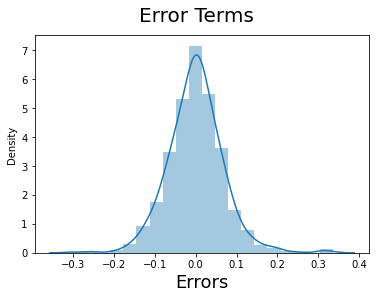

In [140]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<font color='blue'>**Observation**</font> : We can clearly see error terms are nicely distributed around zero

Text(0, 0.5, 'y_train_pred')

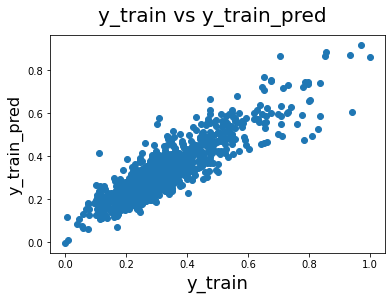

In [141]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                                # X-label
plt.ylabel('y_train_pred', fontsize=16)                           # Y-labe

<font color='blue'>**Observation**</font> : We can see our model is mostly predicting correctly

In [142]:
#create function to calculate metrices such as R2, RSS, MSE and RMSE

def calculate_metrices(actual, pred):
    #R2
    r2 = r2_score(actual, pred)
    print('R2 : ',r2)
    #Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
    rss = np.sum(np.square(actual - pred))
    print('RSS : ',rss)
    mse = mean_squared_error(actual, pred)
    print('MSE : ',mse)
    # Root Mean Squared Error
    rmse = mse**0.5
    print('RMSE : ',rmse)
    
    return r2,rss,mse,rmse

In [143]:
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Training Set")
r2_train,rss_train,mse_train,rmse_train = calculate_metrices(y_train, y_train_pred)

Training Set
R2 :  0.7962186583898612
RSS :  4.504449157101491
MSE :  0.004677517297093968
RMSE :  0.0683923774780053


## 6. Making Predictions Using the Final Model of Liner Regression

#### Applying the scaling on the test sets

In [144]:
# Observe that we are not using fit and transform. Instead we are using only transform
house_test[numerical_columns] = scaler.transform(house_test[numerical_columns])
house_test.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1122     0.366412  0.132917   0.604478      0.100000    0.000000    0.000000   
393      0.366412  0.106333   0.492537      0.000000    0.000000    0.156840   
341      0.297710  0.123469   0.559701      0.000000    0.000000    0.000000   
273      0.450382  0.145023   0.619403      0.633333    0.162090    0.365566   
1058     0.572519  0.175701   0.992537      0.966667    0.136404    0.551887   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1122    0.000000   0.312123     0.303112  0.332448  0.000000           0.0   
393     0.000000   0.242452     0.355435  0.241105  0.000000           0.0   
341     0.000000   0.334882     0.325214  0.269251  0.000000           0.0   
273     0.550133   0.000000     0.559314  0.689326  0.000000           0.0   
1058    0.000000   0.078031     0.497970  0.422730  0.654252           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1122   0.246651           0.0           0.0  0.333333       0.0      0.500000   
393    0.178881           0.0           0.0  0.333333       0.0      0.333333   
341    0.199764           0.0           0.0  0.333333       0.0      0.333333   
273    0.511426           0.5           0.0  0.666667       0.0      0.500000   
1058   0.728920           0.5           0.0  0.666667       0.5      0.500000   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
1122      0.333333         0.375         0.0     0.973134    0.333333   
393       0.333333         0.250         1.0     0.000000    0.000000   
341       0.333333         0.250         0.0     0.970149    0.333333   
273       0.333333         0.500         0.5     0.974129    0.333333   
1058      0.333333         1.000         0.5     0.999005    1.000000   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1122    0.269411    0.111111      0.00000       0.000000        0.0   
393     0.000000    0.000000      0.00000       0.000000        0.0   
341     0.275023    0.434028      0.00000       0.072727        0.0   
273     0.316183    0.501736      0.00000       0.000000        0.0   
1058    0.782039    0.000000      0.29912       0.000000        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SalePrice  \
1122      0.40404       0.0      0.0  0.818182    0.75   0.178476   
393       0.00000       0.0      0.0  0.272727    0.00   0.150548   
341       0.00000       0.0      0.0  0.727273    0.75   0.108658   
273       0.00000       0.0      0.0  0.272727    0.75   0.241312   
1058      0.00000       0.0      0.0  0.545455    0.75   0.697456   

      160MSSubClass  180MSSubClass  190MSSubClass  20MSSubClass  30MSSubClass  \
1122              0              0              0             1             0   
393               0              0              0             0             1   
341               0              0              0             1             0   
273               0              0              0             1             0   
1058              0              0              0             0             0   

      40MSSubClass  45MSSubClass  50MSSubClass  60MSSubClass  70MSSubClass  \
1122             0             0             0             0             0   
393              0             0             0             0             0   
341              0             0             0             0             0   
273              0             0             0             0             0   
1058             0             0             0             1             0   

      75MSSubClass  80MSSubClass  85MSSubClass  90MSSubClass  MSZoning-FV  \
1122             0             0             0             0            0   
393              0             0             0             0            0   
341              0             0             0             0            0   
273              0      

#### Dividing into X_test and y_test

In [145]:
y_test = house_test.pop('SalePrice')
X_test = house_test

In [146]:
# Now let's use our model to make predictions.
X = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.columns

Index(['const', 'LotArea', 'BsmtFinSF1', '2ndFlrSF', 'LandSlope-Sev',
       '1OverallQual', '2OverallQual', '3OverallQual', '4OverallQual',
       '5OverallQual', '6OverallQual', '7OverallQual', '8OverallQual',
       '9OverallQual', '3OverallCond', 'Exterior2nd-CmentBd'],
      dtype='object')

In [147]:
y_test_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

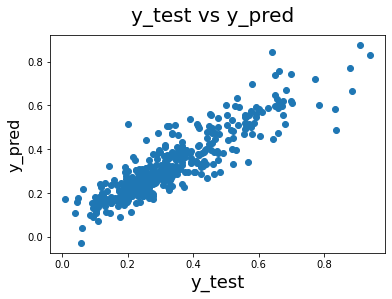

In [148]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-labe

In [149]:
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Testing Set")
r2_test,rss_test,mse_test,rmse_test = calculate_metrices(y_test, y_test_pred)

Testing Set
R2 :  0.795215741582388
RSS :  2.22834407201886
MSE :  0.0053955062276485714
RMSE :  0.0734541096716077


<font color='blue'>**Observation**</font> : We can see that our model does a decent job on both test and train data set and it does not over or underfit but has lower R2 value, earlier it was having high multicolinerity which we got out by dropping features which resulted in loss of R2. Lets see if we can improve our R2 value with regularization

In [150]:
# Create a metric table for later evaluation
linear_metric=[]
linear_metric.append(r2_train)
linear_metric.append(r2_test)
linear_metric.append(r2_train-r2_test)
linear_metric.append(rss_train)
linear_metric.append(rss_test)
linear_metric.append(mse_train)
linear_metric.append(mse_test)
linear_metric.append(rmse_train)
linear_metric.append(rmse_test)

## 7. Regularization

We will try to model with Ridge and Lasso regression to check if we get any better result and we will choose the best one among three models which we will build

### 7.1 Ridge Regression

In [151]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#### 7.1.1 Cross Validation

In [152]:
# cross validation
folds = KFold(n_splits = 25, shuffle = True, random_state = 100)

ridge = Ridge()

ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

ridge_model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 25 folds for each of 28 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    8.6s finished


GridSearchCV(cv=KFold(n_splits=25, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [153]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 3.0}


In [154]:
# define function to plot cv results
def plotNegativeMeanSquare(model_cv):
    model_cv_results = pd.DataFrame(model_cv.cv_results_)

    plt.figure(figsize=(15,5))
    model_cv_results['param_alpha'] = model_cv_results['param_alpha'].astype('float32')

    # plotting
    plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'])
    plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'])
    plt.xlabel('Alpha')
    plt.ylabel('Negative Mean Absolute Error')

    plt.title('Negative Mean Absolute Error and alpha')
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()
    
    return model_cv_results

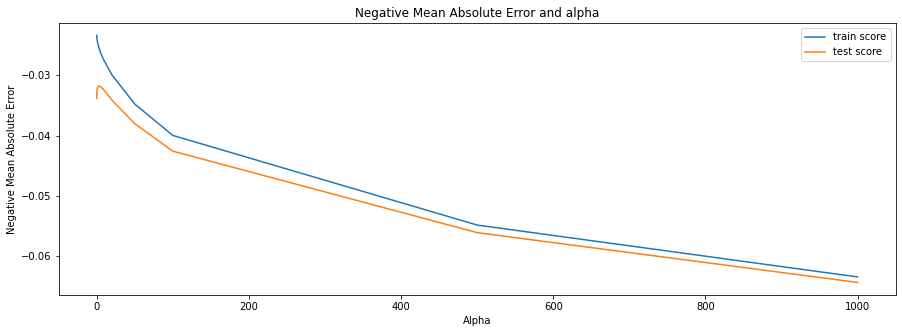

In [155]:
# plotting ridge_model_cv results
ridge_model_cv_result = plotNegativeMeanSquare(ridge_model_cv)

In [156]:
ridge_model_cv_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

param_alpha  mean_train_score  mean_test_score  rank_test_score
15          3.0         -0.025489        -0.031783                1
14          2.0         -0.025024        -0.031802                2
16          4.0         -0.025883        -0.031851                3
17          5.0         -0.026233        -0.031928                4
18          6.0         -0.026548        -0.032026                5

In [157]:
print(ridge_model_cv.best_estimator_)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


#### 7.1.2 Fitting the Model on Training Set

In [158]:
ridge_model = Ridge(alpha=ridge_model_cv.best_estimator_.alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### 7.1.3 Predicting using the Model on training set

In [159]:
y_train_pred = ridge_model.predict(X_train)

In [160]:
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Training Set")
r2_train,rss_train,mse_train,rmse_train = calculate_metrices(y_train, y_train_pred)

Training Set
R2 :  0.9405624882341205
RSS :  1.3138261219529905
MSE :  0.0013643054225887753
RMSE :  0.03693650528391628


#### 7.1.3 Checking the assumptions

Text(0, 0.5, 'Error')

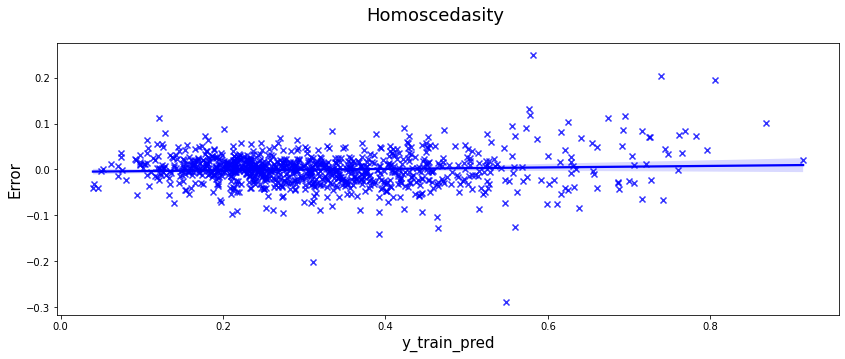

In [161]:
# Plot for Homoscedasity
fig = plt.figure(figsize=(14,5))
sns.regplot(x=y_train_pred, y=y_train-y_train_pred,  color="blue", marker='x')
fig.suptitle('Homoscedasity', fontsize=18)
plt.xlabel('y_train_pred', fontsize=15)   
plt.ylabel('Error', fontsize=15)

Text(0.5, 0, 'Errors')

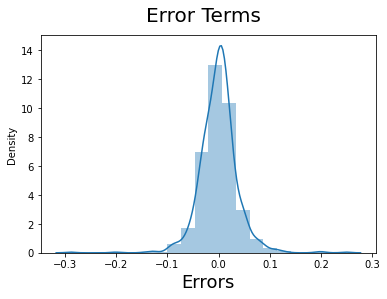

In [162]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train-y_train_pred, bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

<font color='blue'>**Observation**</font> : Both error terms and prediction looks fairly distributed around zero and no patter is observed we can continute with test data for prediction

#### 7.1.4 Predicting using the Model on test set

In [163]:
y_test_pred = ridge_model.predict(X_test)

In [164]:
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Testing Set")
r2_test,rss_test,mse_test,rmse_test = calculate_metrices(y_test, y_test_pred)

Testing Set
R2 :  0.9222608247383727
RSS :  0.8459128240444098
MSE :  0.0020482150703254477
RMSE :  0.04525721014739472


<font color='blue'>**Observation**</font> : We can observe that there is no significant drop in R2 score between Train and Test set in our model, difference is just about 2%, we can colclude that our model is stable

In [165]:
# Create a metric table for later evaluation
ridge_metric=[]
ridge_metric.append(r2_train)
ridge_metric.append(r2_test)
ridge_metric.append(r2_train-r2_test)
ridge_metric.append(rss_train)
ridge_metric.append(rss_test)
ridge_metric.append(mse_train)
ridge_metric.append(mse_test)
ridge_metric.append(rmse_train)
ridge_metric.append(rmse_test)

Lets go ahead and now build the model using Lasso Regression

### 7.2 Lasso Regression

In [166]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#### 7.2.1 Cross Validation

In [167]:
# cross validation
folds = KFold(n_splits = 25, shuffle = True, random_state = 100)

lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

lasso_model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 25 folds for each of 28 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    6.6s finished


GridSearchCV(cv=KFold(n_splits=25, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [168]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


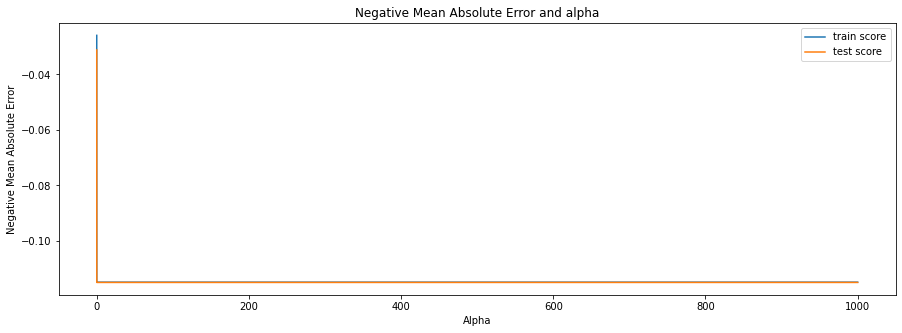

In [169]:
# plotting ridge_model_cv results
lasso_model_cv_result = plotNegativeMeanSquare(lasso_model_cv)

In [170]:
lasso_model_cv_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

param_alpha  mean_train_score  mean_test_score  rank_test_score
0        0.0001         -0.025880        -0.031148                1
1        0.0010         -0.034697        -0.037239                2
2        0.0100         -0.067808        -0.068723                3
25     100.0000         -0.114942        -0.115042                4
24      50.0000         -0.114942        -0.115042                4

In [171]:
print(lasso_model_cv.best_estimator_)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


#### 7.2.2 Fitting the Model on Training Set

In [172]:
lasso_model = Lasso(alpha=lasso_model_cv.best_estimator_.alpha)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### 7.2.3 Predicting using the Model on training set

In [173]:
y_train_pred = lasso_model.predict(X_train)

In [174]:
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Training Set")
r2_train,rss_train,mse_train,rmse_train = calculate_metrices(y_train, y_train_pred)

Training Set
R2 :  0.9385963317088479
RSS :  1.357286686266757
MSE :  0.0014094358112842751
RMSE :  0.03754245345318118


#### 7.2.3 Checking the assumptions

Text(0, 0.5, 'Error')

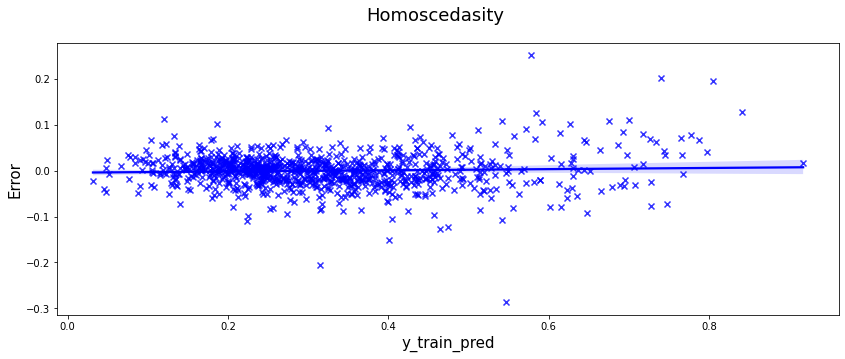

In [175]:
# Plot for Homoscedasity
fig = plt.figure(figsize=(14,5))
sns.regplot(x=y_train_pred, y=y_train-y_train_pred,  color="blue", marker='x')
fig.suptitle('Homoscedasity', fontsize=18)
plt.xlabel('y_train_pred', fontsize=15)   
plt.ylabel('Error', fontsize=15)

Text(0.5, 0, 'Errors')

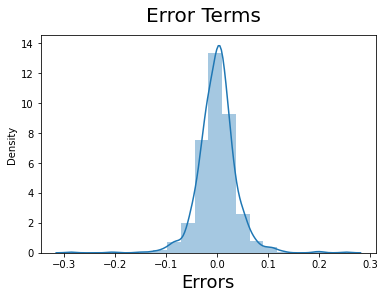

In [176]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train-y_train_pred, bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

<font color='blue'>**Observation**</font> : Both error terms and prediction looks fairly distributed around zero and no patter is observed we can continute with test data for prediction

#### 7.2.4 Predicting using the Model on test set

In [177]:
y_test_pred = lasso_model.predict(X_test)

In [178]:
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Testing Set")
r2_test,rss_test,mse_test,rmse_test = calculate_metrices(y_test, y_test_pred)

Testing Set
R2 :  0.9211054691851466
RSS :  0.8584847361532757
MSE :  0.0020786555354800865
RMSE :  0.045592274953988494


<font color='blue'>**Observation**</font> : We can observe that there is no significant drop in R2 score between Train and Test set in our model, difference is just about 1%, we can colclude that our model is stable

In [179]:
# Create a metric table for later evaluation
lasso_metric=[]
lasso_metric.append(r2_train)
lasso_metric.append(r2_test)
lasso_metric.append(r2_train-r2_test)
lasso_metric.append(rss_train)
lasso_metric.append(rss_test)
lasso_metric.append(mse_train)
lasso_metric.append(mse_test)
lasso_metric.append(rmse_train)
lasso_metric.append(rmse_test)

## 8. Model Evaluation

In [180]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','Diffrence in R2 test and train','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression with RFE': linear_metric }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression with RFE'] )
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
metric

Metric  Linear Regression with RFE  \
0                R2 Score (Train)                    0.796219   
1                 R2 Score (Test)                    0.795216   
2  Diffrence in R2 test and train                    0.001003   
3                     RSS (Train)                    4.504449   
4                      RSS (Test)                    2.228344   
5                     MSE (Train)                    0.004678   
6                      MSE (Test)                    0.005396   
7                    RMSE (Train)                    0.068392   
8                     RMSE (Test)                    0.073454   

   Ridge Regression  Lasso Regression  
0          0.940562          0.938596  
1          0.922261          0.921105  
2          0.018302          0.017491  
3          1.313826          1.357287  
4          0.845913          0.858485  
5          0.001364          0.001409  
6          0.002048          0.002079  
7          0.036937          0.037542  
8          0.045257          0.045592

<font color='blue'>**Observation**</font> : We will compare all values of all three models and choose the best one <br>
- Ridge R2 value is higher than linear regression and lasso regression for both test and train data
- Difference in R2 for test and train is the least for the lasso regression but it is just 0.1% different from ridge regression. Here the best performer is Linear regression with almost no difference in test and train data
- RSS for the train and test is the least for the ridge regression model however not much different than lasso
- MSE for the train and test is the least for the ridge regression model however not much different than lasso
- RMSE for the train and test is the least for the ridge regression model however not much different than lasso

In [181]:
ridge_model.coef_

array([ 0.01436545,  0.07479014,  0.05957207,  0.02209314,  0.02335044,
        0.0657601 ,  0.01828787,  0.0151175 ,  0.07428396,  0.08325252,
        0.06437339, -0.00119685,  0.10237908,  0.00823689, -0.00955   ,
        0.03316132,  0.0181773 , -0.00683466, -0.01105528,  0.02243464,
        0.01938816, -0.00275166,  0.02996951,  0.03778786,  0.02212242,
        0.02141586,  0.00951229,  0.01480113,  0.02622121,  0.01406667,
        0.01008968, -0.0001849 , -0.00154625,  0.00175065, -0.00513919,
       -0.00982169,  0.01383228,  0.00594482,  0.01801337,  0.00981209,
        0.00289581,  0.01858816,  0.01986524,  0.01393216, -0.00172742,
       -0.00909264, -0.01313274,  0.03051662,  0.01304853,  0.01595936,
       -0.00074174,  0.01040622,  0.00075652,  0.00307881,  0.00885174,
       -0.02067791, -0.00168627,  0.0176223 , -0.00863842, -0.0098857 ,
        0.00072786, -0.00856522, -0.03404979,  0.0014652 ,  0.01240822,
        0.00779373, -0.00308285, -0.01344601,  0.03581162, -0.03

In [182]:
lasso_model.coef_

array([ 0.00000000e+00,  1.20001146e-01,  1.09246288e-01,  1.92419987e-02,
        1.72055178e-02,  5.63570940e-02,  1.20602284e-02, -0.00000000e+00,
        9.49718422e-02,  0.00000000e+00,  1.11221387e-02, -6.97993556e-03,
        2.60194350e-01,  5.74614013e-03, -0.00000000e+00,  1.09597630e-02,
        7.51536637e-03, -5.50919525e-03, -6.41466876e-03,  0.00000000e+00,
        1.33235854e-02, -0.00000000e+00,  2.77629097e-02,  3.04573509e-02,
        2.08629922e-02,  1.76579784e-02,  8.54371256e-03,  0.00000000e+00,
        2.32523255e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.60275597e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.21977092e-03,
       -0.00000000e+00,  5.98242620e-04,  8.87259699e-03,  0.00000000e+00,
        0.00000000e+00, -4.91785571e-03, -3.29754070e-02,  3.31173855e-02,
        8.58416316e-03,  1.32711250e-02, -1.16353275e-03,  2.53573939e-03,
       -0.00000000e+00,  

We will print the beta coefficient of top 10 the features of ridge regression and corresponding lasso beta coefficients

In [183]:
betas = pd.DataFrame(index=X_train.columns)
pd.set_option('display.max_rows', None)
betas['Ridge'] = ridge_model.coef_
betas['Lasso'] = lasso_model.coef_
betas.sort_values(by=['Ridge'],ascending=False).head(10)

Ridge     Lasso
GrLivArea             0.102379  0.260194
1stFlrSF              0.083253  0.000000
LotArea               0.074790  0.120001
TotalBsmtSF           0.074284  0.094972
BsmtFinSF1            0.065760  0.056357
2ndFlrSF              0.064373  0.011122
YearBuilt             0.059572  0.109246
Neighborhood-StoneBr  0.057387  0.065945
Neighborhood-NridgHt  0.046188  0.053160
9OverallQual          0.043062  0.046728

## 9. Conclusion

We will conclude that the best model for our prediction is **Lasso regression** model with alpha as **0.0001**, even though all the metric are in favour of Ridge model. But we should take this with pinch of salt, that if we need simpler model with lesser parameters to consider then we should go with Lasso as it tends to reduce the number of features by making their coefficient to zero. Which will avoid overfitting and error in unknown data set.

In [184]:
lasso_zero_betas = filter(lambda x: x == 0, lasso_model.coef_)
print("Lasso Zero Value Betas : ",len(list(lasso_zero_betas)))

Lasso Zero Value Betas :  126


In [185]:
ridge_zero_betas = filter(lambda x: x == 0, ridge_model.coef_)
print("Ridge Zero Value Betas : ",len(list(ridge_zero_betas)))

Ridge Zero Value Betas :  8


## Code for Questions

**Q-1** : What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Ans** : Optimal value of alpha for Ridge and Lasso regression are as follows (Printed through code) : 

In [186]:
print('Alpha for Ridge Regression : ', ridge_model_cv.best_estimator_.alpha)
print('Alpha for Lasso Regression : ', lasso_model_cv.best_estimator_.alpha)

Alpha for Ridge Regression :  3.0
Alpha for Lasso Regression :  0.0001


We will double the value of alpha for both ridge and lasso and check the result

In [187]:
lasso_model_double = Lasso(alpha=lasso_model_cv.best_estimator_.alpha*2)
lasso_model_double.fit(X_train, y_train)
y_train_pred_double = lasso_model_double.predict(X_train)
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Training Set")
r2_train,rss_train,mse_train,rmse_train = calculate_metrices(y_train, y_train_pred_double)

# Create a metric table for later evaluation
lasso_metric_double=[]
lasso_metric_double.append(r2_train)
lasso_metric_double.append("NaN")
lasso_metric_double.append("NaN")
lasso_metric_double.append(rss_train)
lasso_metric_double.append("NaN")
lasso_metric_double.append(mse_train)
lasso_metric_double.append("NaN")
lasso_metric_double.append(rmse_train)
lasso_metric_double.append("NaN")



Training Set
R2 :  0.9318674904125939
RSS :  1.5060231862117224
MSE :  0.001563887005411965
RMSE :  0.03954601124528193


In [188]:
ridge_model_double = Ridge(alpha=ridge_model_cv.best_estimator_.alpha*2)
ridge_model_double.fit(X_train, y_train)
y_train_pred_double = ridge_model_double.predict(X_train)
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Training Set")
r2_train,rss_train,mse_train,rmse_train = calculate_metrices(y_train, y_train_pred_double)
# Create a metric table for later evaluation
ridge_metric_double=[]
ridge_metric_double.append(r2_train)
ridge_metric_double.append("NaN")
ridge_metric_double.append("NaN")
ridge_metric_double.append(rss_train)
ridge_metric_double.append("NaN")
ridge_metric_double.append(mse_train)
ridge_metric_double.append("NaN")
ridge_metric_double.append(rmse_train)
ridge_metric_double.append("NaN")


lr_table_double = {'Metric': ['R2 Score (Train)','R2 Score (Test)','Diffrence in R2 test and train','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
        'Ridge Regression - Double': ridge_metric_double }

rg_metric_double = pd.DataFrame(lr_table_double ,columns = ['Metric', 'Ridge Regression - Double'] )
ls_metric_double = pd.Series(lasso_metric_double, name = 'Lasso Regression - Double')

rg_metric = pd.Series(ridge_metric ,name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

metric_double = pd.concat([rg_metric_double,rg_metric, ls_metric_double, ls_metric], axis = 1)
metric_double


Training Set
R2 :  0.935623967864804
RSS :  1.4229887849285547
MSE :  0.001477662289645436
RMSE :  0.03844037317255695


Metric Ridge Regression - Double  Ridge Regression  \
0                R2 Score (Train)                  0.935624          0.940562   
1                 R2 Score (Test)                       NaN          0.922261   
2  Diffrence in R2 test and train                       NaN          0.018302   
3                     RSS (Train)                  1.422989          1.313826   
4                      RSS (Test)                       NaN          0.845913   
5                     MSE (Train)                  0.001478          0.001364   
6                      MSE (Test)                       NaN          0.002048   
7                    RMSE (Train)                   0.03844          0.036937   
8                     RMSE (Test)                       NaN          0.045257   

  Lasso Regression - Double  Lasso Regression  
0                  0.931867          0.938596  
1                       NaN          0.921105  
2                       NaN          0.017491  
3                  1.506023          1.357287  
4                       NaN          0.858485  
5                  0.001564          0.001409  
6                       NaN          0.002079  
7                  0.039546          0.037542  
8                       NaN          0.045592

In [189]:
betas = pd.DataFrame(index=X_train.columns)
pd.set_option('display.max_rows', None)
betas['Ridge - Doubled'] = ridge_model_double.coef_
betas['Ridge'] = ridge_model.coef_
betas['Lasso - Doubled'] = lasso_model_double.coef_
betas['Lasso'] = lasso_model.coef_
betas.sort_values(by=['Lasso - Doubled'],ascending=False).head(10)

Ridge - Doubled     Ridge  Lasso - Doubled     Lasso
GrLivArea                    0.088662  0.102379         0.263735  0.260194
TotalBsmtSF                  0.067986  0.074284         0.093509  0.094972
LotArea                      0.053131  0.074790         0.089112  0.120001
YearBuilt                    0.041315  0.059572         0.088701  0.109246
9OverallQual                 0.047535  0.043062         0.064770  0.046728
BsmtFinSF1                   0.061221  0.065760         0.056669  0.056357
Neighborhood-StoneBr         0.048380  0.057387         0.056485  0.065945
Neighborhood-NridgHt         0.045599  0.046188         0.053770  0.053160
SaleType-New                 0.031712  0.039041         0.049490  0.044763
Neighborhood-Crawfor         0.034543  0.035812         0.045671  0.045551

<font color='blue'>**Observation**</font> : We can see that if we double the alpha, r2 score got weaker and increase in RSS and MSE values is observed.<br>
<font color='blue'>**Observation**</font> : Coefficients also has reduced a bit compared to the previous alpha values. This is happening because of the higher penalty being being imposed.

In [190]:
betas.sort_values(by=['Lasso'],ascending=False).head(10)

Ridge - Doubled     Ridge  Lasso - Doubled     Lasso
GrLivArea                    0.088662  0.102379         0.263735  0.260194
LotArea                      0.053131  0.074790         0.089112  0.120001
YearBuilt                    0.041315  0.059572         0.088701  0.109246
TotalBsmtSF                  0.067986  0.074284         0.093509  0.094972
Neighborhood-StoneBr         0.048380  0.057387         0.056485  0.065945
BsmtFinSF1                   0.061221  0.065760         0.056669  0.056357
Neighborhood-NridgHt         0.045599  0.046188         0.053770  0.053160
9OverallQual                 0.047535  0.043062         0.064770  0.046728
Neighborhood-Crawfor         0.034543  0.035812         0.045671  0.045551
SaleType-New                 0.031712  0.039041         0.049490  0.044763

<font color='blue'>**Observation**</font> : We can see that all top 10 features remained intact in list but there is change in the influence on the predictions. 'LotArea' was dropped one places from 2rd to 3th, 'YearBuilt' gained 1 places, 'TotalBsmtSF' moved up 2 position, 'Neighborhood-StoneBr' moved up 2 position, 'Neighborhood-NridgHt' gained 1 position, '9OverallQual' dropped 2 positions and so on.

<font color='blue'>**Conclusion**</font> : We can say that increasing the alpha results in increase in penalising the coefficient. The most important predictors are 'GrLivArea', 'LotArea', 'YearBuilt', 'TotalBsmtSF',
       'Neighborhood-StoneBr', 'BsmtFinSF1', 'Neighborhood-NridgHt',
       '9OverallQual', 'Neighborhood-Crawfor' and 'SaleType-New'

**Q-2** : You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Ans** : As explained in our coding conclusion that the best model for our prediction is **Lasso regression** model with alpha as **0.0001**, even though all the metric are in favour of Ridge model. But we should take this with pinch of salt, that if we need simpler model with lesser parameters to consider then we should go with Lasso as it tends to reduce the number of features by making their coefficient to zero. Which will avoid overfitting and error in unknown data set.

In [191]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','Diffrence in R2 test and train','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression with RFE': linear_metric }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression with RFE'] )
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
metric

Metric  Linear Regression with RFE  \
0                R2 Score (Train)                    0.796219   
1                 R2 Score (Test)                    0.795216   
2  Diffrence in R2 test and train                    0.001003   
3                     RSS (Train)                    4.504449   
4                      RSS (Test)                    2.228344   
5                     MSE (Train)                    0.004678   
6                      MSE (Test)                    0.005396   
7                    RMSE (Train)                    0.068392   
8                     RMSE (Test)                    0.073454   

   Ridge Regression  Lasso Regression  
0          0.940562          0.938596  
1          0.922261          0.921105  
2          0.018302          0.017491  
3          1.313826          1.357287  
4          0.845913          0.858485  
5          0.001364          0.001409  
6          0.002048          0.002079  
7          0.036937          0.037542  
8          0.045257          0.045592

<font color='blue'>**Observation**</font> : We will compare all values of all three models<br>
- Ridge R2 value is higher than linear regression and lasso regression for both test and train data
- Difference in R2 for test and train is the least for the lasso regression but it is just 0.1% different from ridge regression. Here the best performer is Linear regression with almost no difference in test and train data
- RSS for the train and test is the least for the ridge regression model however not much different than lasso
- MSE for the train and test is the least for the ridge regression model however not much different than lasso
- RMSE for the train and test is the least for the ridge regression model however not much different than lasso

In [192]:
lasso_zero_betas = filter(lambda x: x == 0, lasso_model.coef_)
print("Lasso Zero Value Betas : ",len(list(lasso_zero_betas)))
ridge_zero_betas = filter(lambda x: x == 0, ridge_model.coef_)
print("Ridge Zero Value Betas : ",len(list(ridge_zero_betas)))

Lasso Zero Value Betas :  126
Ridge Zero Value Betas :  8


**Q-3** : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**Ans** : We will check current top 5 variables and drop them from our data set and build the model again with same alpha value for Lasso regression and Ridge regression

In [193]:
Lasso_best_columns = pd.DataFrame(betas.sort_values(by=['Lasso'],ascending=False)['Lasso'].head(5))
Lasso_best_columns

Lasso
GrLivArea             0.260194
LotArea               0.120001
YearBuilt             0.109246
TotalBsmtSF           0.094972
Neighborhood-StoneBr  0.065945

In [194]:
Lasso_best_columns.index

Index(['GrLivArea', 'LotArea', 'YearBuilt', 'TotalBsmtSF',
       'Neighborhood-StoneBr'],
      dtype='object')

In [195]:
# Dropping the columns
X_train.drop(['GrLivArea', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'Neighborhood-StoneBr'],axis=1,inplace=True)

In [196]:
# Building the model again with new data set for Lasso Regression
lasso_model_new = Lasso(alpha=lasso_model_cv.best_estimator_.alpha)
lasso_model_new.fit(X_train, y_train)
y_train_pred_new = lasso_model_new.predict(X_train)
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Training Set")
r2_train,rss_train,mse_train,rmse_train = calculate_metrices(y_train, y_train_pred_new)


Training Set
R2 :  0.9319744521777542
RSS :  1.5036588685116254
MSE :  0.0015614318468448862
RMSE :  0.039514957254752105


In [197]:
betas_new = pd.DataFrame(index=X_train.columns)
betas_new['Lasso - New'] = lasso_model_new.coef_
betas_new.sort_values(by=['Lasso - New'],ascending=False).head(5)

Lasso - New
1stFlrSF         0.211862
2ndFlrSF         0.158900
BsmtFinSF1       0.118434
BsmtUnfSF        0.068014
9OverallQual     0.058390

In [198]:
betas_new.sort_values(by=['Lasso - New'],ascending=False).head(5).index

Index(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', '9OverallQual'], dtype='object')

<font color='blue'>**Observation**</font> : The new top features for Lasso Regression are : **'1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF' and '9OverallQual'**

In [199]:
# Building the model again with new data set for Ridge Regression
ridge_model_new = Ridge(alpha=ridge_model_cv.best_estimator_.alpha)
ridge_model_new.fit(X_train, y_train)
y_train_pred_new = ridge_model_new.predict(X_train)
# Calculate metrices such as R2, RSS, MSE and RMSE
print("Training Set")
r2_train,rss_train,mse_train,rmse_train = calculate_metrices(y_train, y_train_pred_new)

Training Set
R2 :  0.9337642918155742
RSS :  1.464095670113662
MSE :  0.0015203485670962223
RMSE :  0.03899164740167081


In [200]:
betas_new = pd.DataFrame(index=X_train.columns)
betas_new['Ridge - New'] = ridge_model_new.coef_
betas_new.sort_values(by=['Ridge - New'],ascending=False).head(5)

Ridge - New
1stFlrSF         0.148740
BsmtFinSF1       0.098119
2ndFlrSF         0.093084
BsmtUnfSF        0.056865
9OverallQual     0.050714

In [201]:
betas_new.sort_values(by=['Ridge - New'],ascending=False).head(5).index

Index(['1stFlrSF', 'BsmtFinSF1', '2ndFlrSF', 'BsmtUnfSF', '9OverallQual'], dtype='object')

<font color='blue'>**Observation**</font> : The new top features for Ridge Regression are : **'1stFlrSF', 'BsmtFinSF1', '2ndFlrSF', 'BsmtUnfSF' and '9OverallQual'**